# MENSTRUAL CYCLE PREDICTIVE MODEL

Menstruation, or period, is normal vaginal bleeding that occurs as part of a woman's monthly cycle. Every month, a woman’s body prepares for pregnancy. If no pregnancy occurs, the uterus, or womb, sheds its lining. The menstrual blood is partly blood and partly tissue from inside the uterus. Regular periods are a sign that a woman’s body is working normally. A woman should have regular periods unless she is pregnant, breastfeeding, postmenopausal, hormonal imbalance, or have a medical condition that causes her periods to stop. Irregular, painful, or heavy periods may be signs of a serious health problem. Irregular periods also can make it harder to get pregnant.

Below are four of the most common types of abnormal menstrual periods: -
1. Menorrhagia & Polymenorrhagia (Prolonged, Heavy Bleeding)
2. Dysmenorrhea (Excess Pain During Period)
3. Amenorrhea (Absent Periods)
4. Hypomenorrhea (Extra Light Periods)

Ovulation –
    Ovulation refers to the release of an egg during menstruation in females. Part of the ovary called the ovarian follicle discharges an egg. The egg is also known as an ovum, oocyte, or female gamete. It is only released on reaching maturity. 
1. There's a 42% (max) chance of conception on the day before ovulation, the most fertile day of your cycle.
2. 10% of women have PCOS, a condition that is associated with irregular and infrequent ovulation, making natural conception trickier.
3. Ovulation day can be find using the surge in Luteinizing Hormone (LH): -
    a. A LH surge means that you will probably ovulate within the next 12 to 24 hours.
    b. When taken correctly, ovulation tests are approximately 99% accurate in detecting the LH surge that precedes ovulation. However, these tests cannot confirm whether ovulation actually occurs a day or two later.

**Problem Statement:**
Estimate the menstruation cycle at an early stage and be ready before the process begins.
   1. Predict the chances of next menstrual cycle.
   2. Predict the Estimated Ovulation Cycle.


ABSTRACT:
     
     This analysis details variation in menstrual cycle characteristics that are not widely known yet have significant implications for health and well-being. Clinically, women who wish to plan a pregnancy  need to have intercourse on their fertile days. In order to identify the fertile period, it is important to track different parameters such as cycle length and to keep watch on various hormones like Luteinizing hormones, Estrogen.


Methodology:
    
    Data is collected securely in accordance with an agreed methodology. Once collected the data needs to be ‘cleaned’ to prepare it for processing. Based on patterns and features, models arecreated to answer questions set during the scoping phase. Machine learning AI models is to be trained and evaluated using historical data.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sma
import scipy.stats as stats
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_column', None) #to display maximum possible columns

In [3]:
df=pd.read_spss('FedCycleData071012__2_.sav')
df.head()

ClientID  CycleNumber    Group CycleWithPeakorNot ReproductiveCategory  \
0  nfp8122          1.0  Monitor               Peak     Regular (25-35d)   
1  nfp8122          2.0  Monitor               Peak     Regular (25-35d)   
2  nfp8122          3.0  Monitor               Peak     Regular (25-35d)   
3  nfp8122          4.0  Monitor               Peak     Regular (25-35d)   
4  nfp8122          5.0  Monitor               Peak     Regular (25-35d)   

   LengthofCycle  MeanCycleLength  EstimatedDayofOvulation  \
0           29.0            27.33                     17.0   
1           27.0              NaN                     15.0   
2           29.0              NaN                     15.0   
3           27.0              NaN                     15.0   
4           28.0              NaN                     16.0   

   LengthofLutealPhase  FirstDayofHigh  TotalNumberofHighDays  \
0                 12.0            12.0                    5.0   
1                 12.0            13.0                    2.0   
2                 14.0             NaN                    1.0   
3                 12.0            13.0                    2.0   
4                 12.0            12.0                    4.0   

   TotalHighPostPeak  TotalNumberofPeakDays  TotalDaysofFertility  \
0                0.0                    2.0                   9.0   
1                0.0                    2.0                   6.0   
2                0.0                    2.0                   5.0   
3                0.0                    2.0                   6.0   
4                0.0                    2.0                   8.0   

   TotalFertilityFormula  LengthofMenses  MeanMensesLength MensesScoreDayOne  \
0                   15.0             5.0              4.49             Heavy   
1                   13.0             5.0               NaN             Heavy   
2                   13.0             5.0               NaN             Heavy   
3                   13.0             5.0               NaN             Heavy   
4                   14.0             5.0               NaN             Heavy   

  MensesScoreDayTwo MensesScoreDayThree MensesScoreDayFour MensesScoreDayFive  \
0             Heavy            Moderate              Light              Light   
1             Heavy            Moderate              Light              Light   
2             Heavy            Moderate              Light              Light   
3             Heavy               Heavy           Moderate              Light   
4             Heavy            Moderate           Moderate              Light   

  MensesScoreDaySix MensesScoreDaySeven MensesScoreDayEight  \
0               NaN                 NaN                 NaN   
1               NaN                 NaN                 NaN   
2               NaN                 NaN                 NaN   
3               NaN                 NaN                 NaN   
4               NaN                 NaN                 NaN   

  MensesScoreDayNine MensesScoreDayTen MensesScoreDay11 MensesScoreDay12  \
0                NaN               NaN              NaN              NaN   
1                NaN               NaN              NaN              NaN   
2                NaN               NaN              NaN              NaN   
3                NaN               NaN              NaN              NaN   
4                NaN               NaN              NaN              NaN   

  MensesScoreDay13 MensesScoreDay14 MensesScoreDay15  TotalMensesScore  \
0              NaN              NaN              NaN              10.0   
1              NaN              NaN              NaN              10.0   
2              NaN              NaN              NaN              10.0   
3              NaN              NaN              NaN              12.0   
4              NaN              NaN              NaN              11.0   

   MeanBleedingIntensity  NumberofDaysofIntercourse  \
0                   9.04                        5.0   
1      

In [4]:
#df.to_csv('MenstrualCycleData.csv')  

* saved the .sav file to .csv file*

In [5]:
df1=df.copy() #hard copy for dataset

In [6]:
df.shape

(1665, 80)

In [7]:
df_missing=pd.DataFrame((df.isnull().sum()*100/df.shape[0]).sort_values(ascending=False), 
                        columns=['MissingPct'])
df_missing['MissingCount']=df.isnull().sum().sort_values(ascending=False)
df_missing[:60]

MissingPct  MissingCount
MensesScoreDay15             99.939940          1664
MensesScoreDay14             99.939940          1664
MensesScoreDay13             99.939940          1664
MensesScoreDay12             99.939940          1664
MensesScoreDay11             99.879880          1663
MensesScoreDayTen            99.639640          1659
Wedding                      99.399399          1655
MensesScoreDayNine           98.438438          1639
Prevmethod                   98.198198          1635
Methoddate                   98.078078          1633
Girls                        97.417417          1622
Boys                         97.177177          1618
MensesScoreDayEight          95.915916          1597
LivingkidsM                  95.195195          1585
IntercourseDuringUnusBleed   95.075075          1583
PhasesBleeding               93.633634          1559
MeanBleedingIntensity        93.393393          1555
Yearsmarried                 92.132132          1534
BMI                          92.132132          1534
Height                       92.012012          1532
Weight                       91.951952          1531
SchoolyearsM                 91.951952          1531
Schoolyears                  91.891892          1530
IncomeM                      91.651652          1526
Abortions                    91.651652          1526
Miscarriages                 91.651652          1526
MedvitsM                     91.651652          1526
NextpregM                    91.531532          1524
OccupationM                  91.531532          1524
MeanMensesLength             91.531532          1524
Ethnicity                    91.531532          1524
MeanCycleLength              91.531532          1524
Timeattemptpreg              91.471471          1523
AgeM                         91.471471          1523
Maristatus                   91.471471          1523
MaristatusM                  91.471471          1523
Age                          91.471471          1523
Religion                     91.471471          1523
Breastfeeding                91.471471          1523
EthnicityM                   91.471471          1523
Reprocate                    91.471471          1523
Numberpreg                   91.471471          1523
Livingkids                   91.471471          1523
SpousesameM                  91.471471          1523
Spousesame                   91.471471          1523
ReligionM                    91.471471          1523
Medvits                      91.471471          1523
Nextpreg                     91.471471          1523
Whychart                     91.471471          1523
Method                       91.471471          1523
MensesScoreDaySeven          86.546547          1441
MensesScoreDaySix            63.783784          1062
MensesScoreDayFive           26.066066           434
FirstDayofHigh               15.495495           258
LengthofLutealPhase           9.069069           151
EstimatedDayofOvulation       9.009009           150
MensesScoreDayFour            5.225225            87
TotalDaysofFertility          1.861862            31
MensesScoreDayThree           1.501502            25
UnusualBleeding               1.201201            20

<AxesSubplot:>

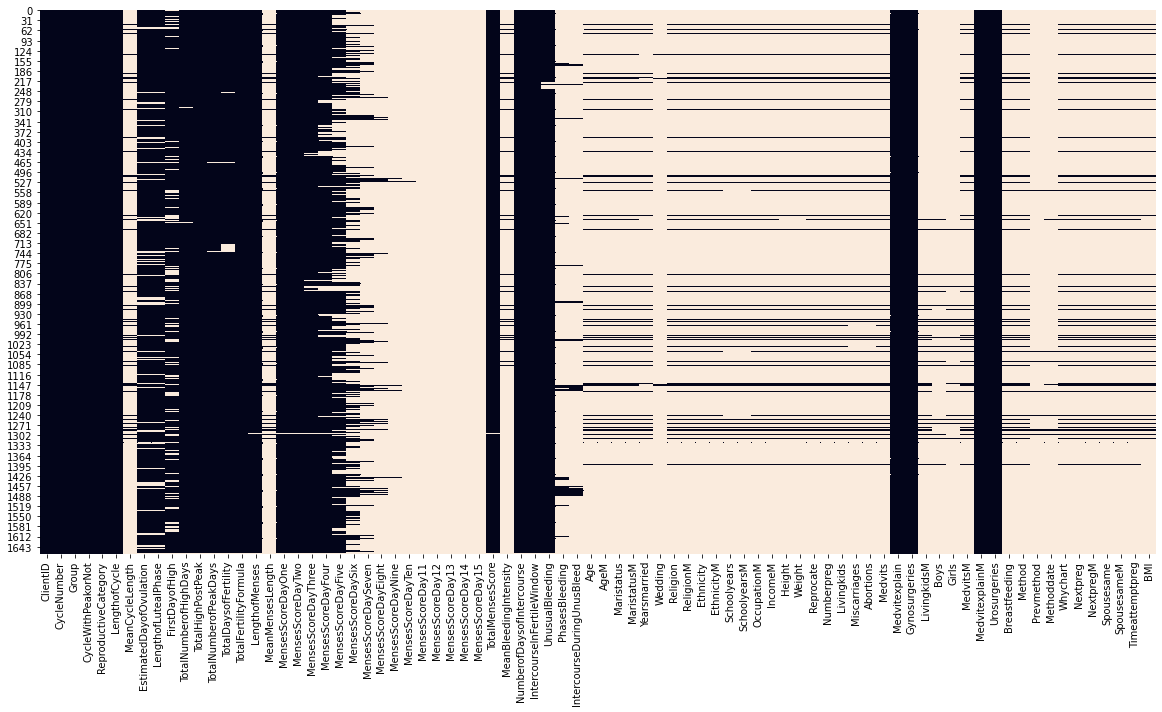

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(), cbar=False)

In [9]:
[df[i].value_counts(dropna=False) for i in df.columns]

[nfp8122    45
 nfp8323    33
 nfp8328    33
 nfp8289    32
 nfp8066    31
            ..
 nfp8247     1
 nfp8049     1
 nfp8236     1
 nfp8144     1
 nfp8200     1
 Name: ClientID, Length: 159, dtype: int64,
 1.0     163
 2.0     152
 3.0     137
 4.0     127
 5.0     119
 6.0     112
 7.0     107
 8.0     104
 9.0     100
 10.0     99
 11.0     94
 12.0     86
 13.0     55
 14.0     28
 15.0     23
 16.0     19
 17.0     13
 18.0     12
 19.0     11
 20.0     11
 22.0      9
 21.0      9
 23.0      8
 25.0      7
 26.0      7
 27.0      7
 24.0      7
 28.0      5
 29.0      5
 30.0      5
 31.0      5
 32.0      4
 33.0      3
 44.0      1
 39.0      1
 43.0      1
 42.0      1
 41.0      1
 40.0      1
 34.0      1
 38.0      1
 37.0      1
 36.0      1
 35.0      1
 45.0      1
 Name: CycleNumber, dtype: int64,
 Monitor    1028
 Mucus       637
 Name: Group, dtype: int64,
 Peak       1519
 No Peak     146
 Name: CycleWithPeakorNot, dtype: int64,
 Regular (25-35d)    1609
 Long (>3

* Last 24 clients have missing data from Age columns onwards

In [10]:
df.iloc[1409: ,39: ]

Age  AgeM Maristatus MaristatusM  Yearsmarried  Wedding Religion  \
1409  NaN   NaN        NaN         NaN           NaN      NaN      NaN   
1410  NaN   NaN        NaN         NaN           NaN      NaN      NaN   
1411  NaN   NaN        NaN         NaN           NaN      NaN      NaN   
1412  NaN   NaN        NaN         NaN           NaN      NaN      NaN   
1413  NaN   NaN        NaN         NaN           NaN      NaN      NaN   
...   ...   ...        ...         ...           ...      ...      ...   
1660  NaN   NaN        NaN         NaN           NaN      NaN      NaN   
1661  NaN   NaN        NaN         NaN           NaN      NaN      NaN   
1662  NaN   NaN        NaN         NaN           NaN      NaN      NaN   
1663  NaN   NaN        NaN         NaN           NaN      NaN      NaN   
1664  NaN   NaN        NaN         NaN           NaN      NaN      NaN   

     ReligionM Ethnicity EthnicityM Schoolyears SchoolyearsM OccupationM  \
1409       NaN       NaN        NaN         NaN          NaN         NaN   
1410       NaN       NaN        NaN         NaN          NaN         NaN   
1411       NaN       NaN        NaN         NaN          NaN         NaN   
1412       NaN       NaN        NaN         NaN          NaN         NaN   
1413       NaN       NaN        NaN         NaN          NaN         NaN   
...        ...       ...        ...         ...          ...         ...   
1660       NaN       NaN        NaN         NaN          NaN         NaN   
1661       NaN       NaN        NaN         NaN          NaN         NaN   
1662       NaN       NaN        NaN         NaN          NaN         NaN   
1663       NaN       NaN        NaN         NaN          NaN         NaN   
1664       NaN       NaN        NaN         NaN          NaN         NaN   

     IncomeM  Height  Weight Reprocate  Numberpreg  Livingkids  Miscarriages  \
1409     NaN     NaN     NaN       NaN         NaN         NaN           NaN   
1410     NaN     NaN     NaN       NaN         NaN         NaN           NaN   
1411     NaN     NaN     NaN       NaN         NaN         NaN           NaN   
1412     NaN     NaN     NaN       NaN         NaN         NaN           NaN   
1413     NaN     NaN     NaN       NaN         NaN         NaN           NaN   
...      ...     ...     ...       ...         ...         ...           ...   
1660     NaN     NaN     NaN       NaN         NaN         NaN           NaN   
1661     NaN     NaN     NaN       NaN         NaN         NaN           NaN   
1662     NaN     NaN     NaN       NaN         NaN         NaN           NaN   
1663     NaN     NaN     NaN       NaN         NaN         NaN           NaN   
1664     NaN     NaN     NaN       NaN         NaN         NaN           NaN   

      Abortions Medvits Medvitexplain Gynosurgeries  LivingkidsM  Boys  Girls  \
1409        NaN     NaN                                      NaN   NaN    NaN   
1410        NaN     NaN                                      NaN   NaN    NaN   
1411        NaN     NaN                                      NaN   NaN    NaN   
1412        NaN     NaN                                      NaN   NaN    NaN   
1413        NaN     NaN                                      NaN   NaN    NaN   
...         ...     ...           ...           ...          ...   ...    ...   
1660        NaN     NaN                                      NaN   NaN    NaN   
1661        NaN     NaN                                      NaN   NaN    NaN   
1662        NaN     NaN                                      NaN   NaN    NaN   
1663        NaN     NaN                                      NaN   NaN    NaN   
1664        NaN     NaN                                      NaN   NaN    NaN   

     MedvitsM MedvitexplainM Urosurgeries Breastfeeding Method Prevmethod  \
1409      NaN                                       NaN    NaN        NaN   
1410      NaN                                       NaN    NaN        NaN   
1411      NaN                          

In [11]:
df.drop(range(1409,1665),axis=0, inplace=True)

### MensesScoreDay

In [12]:
for i in df.columns:
    if i.startswith('MensesScoreDay'):
        #print(i)
        print(df[i].cat)
        print(pd.Categorical(df[i]).categories)
        df[i].cat.add_categories('No Bleeding', inplace=True)
        df[i].fillna('No Bleeding', inplace=True)

Index(['Heavy', 'Light', 'Moderate'], dtype='object')
Index(['Heavy', 'Light', 'Moderate'], dtype='object')
Index(['Heavy', 'Light', 'Moderate'], dtype='object')
Index(['Heavy', 'Light', 'Moderate'], dtype='object')
Index(['Heavy', 'Light', 'Moderate'], dtype='object')
Index(['Heavy', 'Light', 'Moderate'], dtype='object')
Index(['Heavy', 'Light', 'Moderate'], dtype='object')
Index(['Light', 'Moderate'], dtype='object')
Index(['Light', 'Moderate'], dtype='object')
Index(['Light'], dtype='object')
Index(['Light', 'Moderate'], dtype='object')
Index(['Moderate'], dtype='object')
Index(['Moderate'], dtype='object')
Index(['Light'], dtype='object')
Index(['Light'], dtype='object')


### IntercourseDuringUnusBleed | UnusualBleeding

In [13]:
df.IntercourseDuringUnusBleed.value_counts(dropna=False)

NaN    1349
0.0      57
no        2
yes       1
Name: IntercourseDuringUnusBleed, dtype: int64

**Creating cross table with unusal bleeding vs IntercourseDuringUnusBleed for count values**

In [14]:
pd.crosstab(index=df.IntercourseDuringUnusBleed.cat.add_categories(['NAN']).fillna('NAN'), 
            columns= df.UnusualBleeding.cat.add_categories(['NAN']).fillna('NAN') , dropna=False, margins=True )

UnusualBleeding               No  Yes  NAN   All
IntercourseDuringUnusBleed                      
0.0                            4   53    0    57
no                             2    0    0     2
yes                            0    1    0     1
NAN                         1319   11   19  1349
All                         1325   65   19  1409

* Where there is no UnusualBleeding, IntercourseDuringUnusBleed is 'Not Applicable'
* Where there is Yes UnusualBleeding and IntercourseDuringUnusBleed is null there fill na with 'No'
* Where there UnusualBleeding, IntercourseDuringUnusBleed is null, there fill na for UnusualBleeding with 'No' and 
* Fill na for IntercourseDuringUnusBleed with 'Not Applicable'

In [15]:
df.IntercourseDuringUnusBleed.cat.add_categories(['Not Applicable'], inplace=True)
df.IntercourseDuringUnusBleed.cat.categories

Index([0.0, 'no', 'yes', 'Not Applicable'], dtype='object')

In [16]:
for i in range(df.shape[0]):
    if ((pd.isna(df.IntercourseDuringUnusBleed[i])==True)& (df.UnusualBleeding[i]=='No'))==True:
        df.IntercourseDuringUnusBleed[i]='Not Applicable'
    elif ((pd.isna(df.IntercourseDuringUnusBleed[i])==True)& (df.UnusualBleeding[i]=='Yes'))==True:
        df.IntercourseDuringUnusBleed[i]='no'
    elif ((pd.isna(df.IntercourseDuringUnusBleed[i])==True)& (pd.isna(df.UnusualBleeding[i])==True))==True:
        df.IntercourseDuringUnusBleed[i]='Not Applicable'

df.IntercourseDuringUnusBleed.isnull().sum()        

0

In [17]:
df.IntercourseDuringUnusBleed.replace(0.0,'no', inplace=True)

In [18]:
df.IntercourseDuringUnusBleed.cat.categories

Index([0.0, 'no', 'yes', 'Not Applicable'], dtype='object')

In [19]:
df.UnusualBleeding.fillna('No', inplace=True)

In [20]:
pd.crosstab(index=df.IntercourseDuringUnusBleed, 
            columns= df.UnusualBleeding , dropna=False, margins=True )

UnusualBleeding               No  Yes     All
IntercourseDuringUnusBleed                   
0.0                            0    0     NaN
no                             6   64    70.0
yes                            0    1     1.0
Not Applicable              1338    0  1338.0
All                         1344   65  1409.0

### Method | Prevmethod (Client Data)

**Definition:Current method of family planning, If you are no which was the most recent method you used?**

In [21]:
pd.crosstab(index=df.Method.cat.add_categories(['NAN']).fillna('NAN'), 
            columns= df.Prevmethod.cat.add_categories(['NAN']).fillna('NAN') , dropna=False, margins=True )

Prevmethod     Abstinence  Barrier  Breastfeeding  IUD  NFP  None  Pill  \
Method                                                                    
Abstinence              1        0              0    0    0     2     0   
Barrier                 0        0              0    0    0     0     1   
Breastfeeding           0        0              0    0    0     1     0   
NFP                     0        0              1    1    7     7     1   
None                    0        2              0    0    1     0     2   
Other                   0        0              0    0    0     0     0   
Withdrawal              0        0              0    0    0     1     0   
NAN                     0        0              0    0    0     0     0   
All                     1        2              1    1    8    11     4   

Prevmethod     Withdrawl   NAN   All  
Method                                
Abstinence             0     5     8  
Barrier                0     4     5  
Breastfeeding          0     1     2  
NFP                    0    92   109  
None                   1     2     8  
Other                  0     1     1  
Withdrawal             1     7     9  
NAN                    0  1267  1267  
All                    2  1379  1409

### PhasesBleeding

In [22]:
pd.crosstab(index=df.UnusualBleeding, 
            columns= df.PhasesBleeding.cat.add_categories(['NAN']).fillna('NAN') , dropna=False, margins=True )

PhasesBleeding   0.0  Fertile Window  Postpkow  Prepkofw   NAN   All
UnusualBleeding                                                     
No                 5               2         0         0  1337  1344
Yes                0              35        21         8     1    65
All                5              37        21         8  1338  1409

In [23]:
df.PhasesBleeding.cat.add_categories(['No Bleeding'], inplace=True)
df.PhasesBleeding.cat.categories

Index([0.0, 'Fertile Window', 'Postpkow', 'Prepkofw', 'No Bleeding'], dtype='object')

In [24]:
df.PhasesBleeding.fillna('No Bleeding', inplace=True)
df.PhasesBleeding.isnull().sum()

0

In [25]:
df.PhasesBleeding.replace(0.0, 'No Bleeding',inplace=True)

In [26]:
pd.crosstab(index=df.UnusualBleeding, 
            columns= df.PhasesBleeding , dropna=False, margins=True )

PhasesBleeding   0.0  Fertile Window  Postpkow  Prepkofw  No Bleeding   All
UnusualBleeding                                                            
No                 0               2         0         0         1342  1344
Yes                0              35        21         8            1    65
All                0              37        21         8         1343  1409

In [27]:
df.PhasesBleeding.cat.remove_categories(0.0, inplace=True)
df.PhasesBleeding.cat.categories

Index(['Fertile Window', 'Postpkow', 'Prepkofw', 'No Bleeding'], dtype='object')

### MeanCycleLength

In [28]:
df.MeanCycleLength=df.groupby('ClientID').MeanCycleLength.ffill()

* Filled column mean cycle length null values using ffill, 
* Because its a mean of all the cycle lengths for the particular client

In [29]:
df.MeanCycleLength.isnull().sum()

44

In [30]:
df.ClientID[df.MeanCycleLength.isnull()].unique()

array(['nfp8150', 'nfp8240', 'nfp8292', 'nfp8293'], dtype=object)

In [31]:
for i in df.ClientID[df.MeanCycleLength.isnull()].unique():
    print(i)
    print(df.LengthofCycle[df.ClientID==i].mean())
    print(df.MeanCycleLength[df.ClientID==i])
    df.MeanCycleLength[df.ClientID==i]=df.LengthofCycle[df.ClientID==i].mean()
    print(df.MeanCycleLength[df.ClientID==i])
df.MeanCycleLength.isnull().sum()

nfp8150
30.583333333333332
647   NaN
648   NaN
649   NaN
650   NaN
651   NaN
652   NaN
653   NaN
654   NaN
655   NaN
656   NaN
657   NaN
658   NaN
Name: MeanCycleLength, dtype: float64
647    30.583333
648    30.583333
649    30.583333
650    30.583333
651    30.583333
652    30.583333
653    30.583333
654    30.583333
655    30.583333
656    30.583333
657    30.583333
658    30.583333
Name: MeanCycleLength, dtype: float64
nfp8240
26.3125
1115   NaN
1116   NaN
1117   NaN
1118   NaN
1119   NaN
1120   NaN
1121   NaN
1122   NaN
1123   NaN
1124   NaN
1125   NaN
1126   NaN
1127   NaN
1128   NaN
1129   NaN
1130   NaN
Name: MeanCycleLength, dtype: float64
1115    26.3125
1116    26.3125
1117    26.3125
1118    26.3125
1119    26.3125
1120    26.3125
1121    26.3125
1122    26.3125
1123    26.3125
1124    26.3125
1125    26.3125
1126    26.3125
1127    26.3125
1128    26.3125
1129    26.3125
1130    26.3125
Name: MeanCycleLength, dtype: float64
nfp8292
28.53846153846154
1393   NaN
1394   NaN
1

0

* For some client Ids MeanCycleLength is missing, 
* It is imputed using calculating mean of all the cycle lengths client-wise

In [32]:
df1.MeanCycleLength.isnull().sum()   #drop

1524

In [33]:
df1.MeanCycleLength=df1.groupby('ClientID').MeanCycleLength.ffill()     #drop
print(df1.MeanCycleLength.isnull().sum())
df1.groupby('ClientID').MeanCycleLength.fillna(df1.LengthofCycle.mean())

256


0       27.33
1       27.33
2       27.33
3       27.33
4       27.33
        ...  
1660    29.63
1661    29.63
1662    29.63
1663    29.63
1664    29.63
Name: MeanCycleLength, Length: 1665, dtype: float64

In [34]:
df1.ClientID[df1.ClientID=='nfp8150'] #drop

647    nfp8150
648    nfp8150
649    nfp8150
650    nfp8150
651    nfp8150
652    nfp8150
653    nfp8150
654    nfp8150
655    nfp8150
656    nfp8150
657    nfp8150
658    nfp8150
Name: ClientID, dtype: object

In [35]:
df1.groupby('ClientID').MeanCycleLength.fillna(df1.LengthofCycle.mean())[df1.groupby('ClientID').MeanCycleLength.fillna(df1.LengthofCycle.mean()).index==647]
#drop

647    29.299099
Name: MeanCycleLength, dtype: float64

In [36]:
df.MeanCycleLength[df.ClientID=='nfp8150'] #drop

647    30.583333
648    30.583333
649    30.583333
650    30.583333
651    30.583333
652    30.583333
653    30.583333
654    30.583333
655    30.583333
656    30.583333
657    30.583333
658    30.583333
Name: MeanCycleLength, dtype: float64

### MeanMensesLength

In [37]:
df.MeanMensesLength=df.groupby('ClientID').MeanMensesLength.ffill()
df.MeanMensesLength.isnull().sum()

45

In [38]:
df[['ClientID','LengthofMenses']][df.MeanMensesLength.isnull()] # checking if there are any null vlaues for LengthofMenses

ClientID  LengthofMenses
210   nfp8049             5.0
1029  nfp8218             9.0
1030  nfp8218             9.0
1037  nfp8223             5.0
1038  nfp8223             5.0
1039  nfp8223             5.0
1040  nfp8223             6.0
1041  nfp8223             5.0
1042  nfp8223             5.0
1043  nfp8223             5.0
1044  nfp8223             5.0
1045  nfp8223             5.0
1046  nfp8223             5.0
1115  nfp8240             5.0
1116  nfp8240             5.0
1117  nfp8240             4.0
1118  nfp8240             4.0
1119  nfp8240             4.0
1120  nfp8240             4.0
1121  nfp8240             4.0
1122  nfp8240             4.0
1123  nfp8240             3.0
1124  nfp8240             3.0
1125  nfp8240             4.0
1126  nfp8240             4.0
1127  nfp8240             3.0
1128  nfp8240             4.0
1129  nfp8240             4.0
1130  nfp8240             4.0
1393  nfp8292             6.0
1394  nfp8292             6.0
1395  nfp8292             6.0
1396  nfp8292             6.0
1397  nfp8292             4.0
1398  nfp8292             5.0
1399  nfp8292             6.0
1400  nfp8292             6.0
1401  nfp8292             5.0
1402  nfp8292             5.0
1403  nfp8292             7.0
1404  nfp8292             6.0
1405  nfp8292             6.0
1406  nfp8293             6.0
1407  nfp8293             5.0
1408  nfp8293             5.0

* There are still 45 clients after ffill, for those clients 
* Impute the MeanMensesLength by computing mean of LengthOfMenses client wise

In [39]:
for i in df.ClientID[df.MeanMensesLength.isnull()].unique():
    print(i)
    print(df.LengthofMenses[df.ClientID==i].mean())
    print(df.MeanMensesLength[df.ClientID==i])
    df.MeanMensesLength[df.ClientID==i]=df.LengthofMenses[df.ClientID==i].mean()
    print(df.MeanMensesLength[df.ClientID==i])
df.MeanMensesLength.isnull().sum()

nfp8049
5.0
210   NaN
Name: MeanMensesLength, dtype: float64
210    5.0
Name: MeanMensesLength, dtype: float64
nfp8218
9.0
1029   NaN
1030   NaN
Name: MeanMensesLength, dtype: float64
1029    9.0
1030    9.0
Name: MeanMensesLength, dtype: float64
nfp8223
5.1
1037   NaN
1038   NaN
1039   NaN
1040   NaN
1041   NaN
1042   NaN
1043   NaN
1044   NaN
1045   NaN
1046   NaN
Name: MeanMensesLength, dtype: float64
1037    5.1
1038    5.1
1039    5.1
1040    5.1
1041    5.1
1042    5.1
1043    5.1
1044    5.1
1045    5.1
1046    5.1
Name: MeanMensesLength, dtype: float64
nfp8240
3.9375
1115   NaN
1116   NaN
1117   NaN
1118   NaN
1119   NaN
1120   NaN
1121   NaN
1122   NaN
1123   NaN
1124   NaN
1125   NaN
1126   NaN
1127   NaN
1128   NaN
1129   NaN
1130   NaN
Name: MeanMensesLength, dtype: float64
1115    3.9375
1116    3.9375
1117    3.9375
1118    3.9375
1119    3.9375
1120    3.9375
1121    3.9375
1122    3.9375
1123    3.9375
1124    3.9375
1125    3.9375
1126    3.9375
1127    3.9375
1128    

0

### LengthofMenses

In [40]:
df.LengthofMenses.isnull().sum()

3

In [41]:
df[['ClientID','LengthofMenses','MeanMensesLength']][df.LengthofMenses.isnull()]

ClientID  LengthofMenses  MeanMensesLength
1107  nfp8237             NaN              5.84
1298  nfp8276             NaN              5.73
1340  nfp8282             NaN              5.64

In [42]:
df.shape

(1409, 80)

In [43]:
# for these cycles, no data for bleeding is provided, so we are dropping those rows
df[df.MensesScoreDayOne=='No Bleeding']

ClientID  CycleNumber    Group CycleWithPeakorNot ReproductiveCategory  \
1107  nfp8237         18.0  Monitor               Peak     Regular (25-35d)   
1298  nfp8276         10.0  Monitor               Peak     Regular (25-35d)   
1340  nfp8282         14.0  Monitor            No Peak     Regular (25-35d)   

      LengthofCycle  MeanCycleLength  EstimatedDayofOvulation  \
1107           25.0            25.85                     16.0   
1298           27.0            26.58                     17.0   
1340           29.0            32.07                      NaN   

      LengthofLutealPhase  FirstDayofHigh  TotalNumberofHighDays  \
1107                  9.0            16.0                    4.0   
1298                 10.0            11.0                    6.0   
1340                  NaN            14.0                   14.0   

      TotalHighPostPeak  TotalNumberofPeakDays  TotalDaysofFertility  \
1107                0.0                    2.0                   8.0   
1298                0.0                    2.0                  10.0   
1340                0.0                    0.0                  14.0   

      TotalFertilityFormula  LengthofMenses  MeanMensesLength  \
1107                   12.0             NaN              5.84   
1298                   15.0             NaN              5.73   
1340                   18.0             NaN              5.64   

     MensesScoreDayOne MensesScoreDayTwo MensesScoreDayThree  \
1107       No Bleeding       No Bleeding         No Bleeding   
1298       No Bleeding       No Bleeding         No Bleeding   
1340       No Bleeding       No Bleeding         No Bleeding   

     MensesScoreDayFour MensesScoreDayFive MensesScoreDaySix  \
1107        No Bleeding        No Bleeding       No Bleeding   
1298        No Bleeding        No Bleeding       No Bleeding   
1340        No Bleeding        No Bleeding       No Bleeding   

     MensesScoreDaySeven MensesScoreDayEight MensesScoreDayNine  \
1107         No Bleeding         No Bleeding        No Bleeding   
1298         No Bleeding         No Bleeding        No Bleeding   
1340         No Bleeding         No Bleeding        No Bleeding   

     MensesScoreDayTen MensesScoreDay11 MensesScoreDay12 MensesScoreDay13  \
1107       No Bleeding      No Bleeding      No Bleeding      No Bleeding   
1298       No Bleeding      No Bleeding      No Bleeding      No Bleeding   
1340       No Bleeding      No Bleeding      No Bleeding      No Bleeding   

     MensesScoreDay14 MensesScoreDay15  TotalMensesScore  \
1107      No Bleeding      No Bleeding               NaN   
1298      No Bleeding      No Bleeding               NaN   
1340      No Bleeding      No Bleeding               NaN   

      MeanBleedingIntensity  NumberofDaysofIntercourse  \
1107                    NaN                        6.0   
1298                    NaN                        0.0   
1340                    NaN                        5.0   

     IntercourseInFertileWindow UnusualBleeding PhasesBleeding  \
1107                         No              No    No Bleeding   
1298                         No              No    No Bleeding   
1340                         No              No    No Bleeding   

     IntercourseDuringUnusBleed  Age  AgeM Maristatus MaristatusM  \
1107             Not Applicable  NaN   NaN        NaN         NaN   
1298             Not Applicable  NaN   NaN        NaN         NaN   
1340             Not Applicable  NaN   NaN        NaN         NaN   

      Yearsmarried  Wedding Religion ReligionM Ethnicity EthnicityM  \
1107           NaN      NaN      NaN       NaN       NaN        NaN   
1298           NaN      NaN      NaN       NaN       NaN        NaN   
1340           NaN      NaN      NaN       NaN       NaN        NaN   

     Schoolyears SchoolyearsM OccupationM IncomeM  Height  Weight Reprocate  \
1107         NaN          NaN         NaN     NaN     NaN     NaN       NaN   
1298         NaN          NaN         NaN     NaN    

In [44]:
df.drop(df[df.MensesScoreDayOne=='No Bleeding'].index, axis=0, inplace=True)

In [45]:
df.shape

(1406, 80)

### MeanBleedingIntensity

* MeanBleedingIntensity = sum(TotalMensesScore)/number of cycles

In [46]:
df.MeanBleedingIntensity=df.groupby('ClientID').MeanBleedingIntensity.ffill()
df.MeanBleedingIntensity.isnull().sum()

303

In [47]:
for i in df.ClientID[df.MeanBleedingIntensity.isnull()].unique():
    print(i)
    print(df.TotalMensesScore[df.ClientID==i].mean())
    print(df.TotalMensesScore[df.ClientID==i])
    df.MeanBleedingIntensity[df.ClientID==i]=df.TotalMensesScore[df.ClientID==i].mean()
    print(df.MeanBleedingIntensity[df.ClientID==i])
df.MeanBleedingIntensity.isnull().sum()

nfp8221
8.5
1031    8.0
1032    9.0
1033    9.0
1034    9.0
1035    9.0
1036    7.0
Name: TotalMensesScore, dtype: float64
1031    8.5
1032    8.5
1033    8.5
1034    8.5
1035    8.5
1036    8.5
Name: MeanBleedingIntensity, dtype: float64
nfp8238
10.6
1110    10.0
1111    12.0
1112    11.0
1113    14.0
1114     6.0
Name: TotalMensesScore, dtype: float64
1110    10.6
1111    10.6
1112    10.6
1113    10.6
1114    10.6
Name: MeanBleedingIntensity, dtype: float64
nfp8240
7.0625
1115    9.0
1116    8.0
1117    7.0
1118    7.0
1119    8.0
1120    8.0
1121    6.0
1122    7.0
1123    6.0
1124    5.0
1125    8.0
1126    6.0
1127    6.0
1128    7.0
1129    7.0
1130    8.0
Name: TotalMensesScore, dtype: float64
1115    7.0625
1116    7.0625
1117    7.0625
1118    7.0625
1119    7.0625
1120    7.0625
1121    7.0625
1122    7.0625
1123    7.0625
1124    7.0625
1125    7.0625
1126    7.0625
1127    7.0625
1128    7.0625
1129    7.0625
1130    7.0625
Name: MeanBleedingIntensity, dtype: float64
nfp82

1327    11.357143
1328    11.357143
1329    11.357143
1330    11.357143
1331    11.357143
1332    11.357143
1333    11.357143
1334    11.357143
1335    11.357143
1336    11.357143
1337    11.357143
1338    11.357143
1339    11.357143
1341    11.357143
Name: MeanBleedingIntensity, dtype: float64
nfp8284
9.0
1342    9.0
Name: TotalMensesScore, dtype: float64
1342    9.0
Name: MeanBleedingIntensity, dtype: float64
nfp8286
10.5
1343    11.0
1344    10.0
Name: TotalMensesScore, dtype: float64
1343    10.5
1344    10.5
Name: MeanBleedingIntensity, dtype: float64
nfp8288
9.0
1345     8.0
1346     9.0
1347    10.0
Name: TotalMensesScore, dtype: float64
1345    9.0
1346    9.0
1347    9.0
Name: MeanBleedingIntensity, dtype: float64
nfp8289
9.6875
1348     9.0
1349     9.0
1350    10.0
1351     9.0
1352     9.0
1353     8.0
1354    12.0
1355    10.0
1356     8.0
1357    10.0
1358    10.0
1359    10.0
1360    10.0
1361     9.0
1362    10.0
1363     8.0
1364    11.0
1365    12.0
1366    12.0
1367 

0

### TotalNumberofHighDays | TotalHighPostPeak | TotalNumberofPeakDays | TotalDaysofFertility |LengthofLutealPhase |TotalFertilityFormula

In [48]:
df_firstHigh=df[['LengthofCycle','MeanCycleLength','EstimatedDayofOvulation','LengthofLutealPhase','FirstDayofHigh',
'TotalNumberofHighDays','TotalHighPostPeak','TotalNumberofPeakDays','TotalDaysofFertility','LengthofMenses',
'MeanMensesLength','TotalMensesScore','MeanBleedingIntensity','TotalFertilityFormula']]
df_firstHigh.head()

LengthofCycle  MeanCycleLength  EstimatedDayofOvulation  \
0           29.0            27.33                     17.0   
1           27.0            27.33                     15.0   
2           29.0            27.33                     15.0   
3           27.0            27.33                     15.0   
4           28.0            27.33                     16.0   

   LengthofLutealPhase  FirstDayofHigh  TotalNumberofHighDays  \
0                 12.0            12.0                    5.0   
1                 12.0            13.0                    2.0   
2                 14.0             NaN                    1.0   
3                 12.0            13.0                    2.0   
4                 12.0            12.0                    4.0   

   TotalHighPostPeak  TotalNumberofPeakDays  TotalDaysofFertility  \
0                0.0                    2.0                   9.0   
1                0.0                    2.0                   6.0   
2                0.0                    2.0                   5.0   
3                0.0                    2.0                   6.0   
4                0.0                    2.0                   8.0   

   LengthofMenses  MeanMensesLength  TotalMensesScore  MeanBleedingIntensity  \
0             5.0              4.49              10.0                   9.04   
1             5.0              4.49              10.0                   9.04   
2             5.0              4.49              10.0                   9.04   
3             5.0              4.49              12.0                   9.04   
4             5.0              4.49              11.0                   9.04   

   TotalFertilityFormula  
0                   15.0  
1                   13.0  
2                   13.0  
3                   13.0  
4                   14.0

* As EstimatedDayofOvulation are our target columns so we are not imputing their missing values.

In [49]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import statsmodels.api as sma

In [50]:
df_firstHigh.isnull().sum()

LengthofCycle                0
MeanCycleLength              0
EstimatedDayofOvulation    115
LengthofLutealPhase        116
FirstDayofHigh             211
TotalNumberofHighDays        9
TotalHighPostPeak            1
TotalNumberofPeakDays       13
TotalDaysofFertility        29
LengthofMenses               0
MeanMensesLength             0
TotalMensesScore             0
MeanBleedingIntensity        0
TotalFertilityFormula        1
dtype: int64

In [51]:
train=df_firstHigh[df_firstHigh.TotalDaysofFertility.notnull()] #test data

In [52]:
test=df_firstHigh[df_firstHigh.TotalDaysofFertility.isnull()] #test data

In [53]:
iter_imputer=IterativeImputer(random_state=42)
fertilityDays=pd.DataFrame(iter_imputer.fit_transform(df_firstHigh), 
                                    columns=df_firstHigh.columns, index=df.index)
fertilityDays

LengthofCycle  MeanCycleLength  EstimatedDayofOvulation  \
0              29.0        27.330000                17.000000   
1              27.0        27.330000                15.000000   
2              29.0        27.330000                15.000000   
3              27.0        27.330000                15.000000   
4              28.0        27.330000                16.000000   
...             ...              ...                      ...   
1404           31.0        28.538462                16.000000   
1405           29.0        28.538462                15.614844   
1406           29.0        29.000000                16.000000   
1407           31.0        29.000000                18.000000   
1408           27.0        29.000000                17.000000   

      LengthofLutealPhase  FirstDayofHigh  TotalNumberofHighDays  \
0               12.000000       12.000000                    5.0   
1               12.000000       13.000000                    2.0   
2               14.000000       13.733489                    1.0   
3               12.000000       13.000000                    2.0   
4               12.000000       12.000000                    4.0   
...                   ...             ...                    ...   
1404            15.000000       14.000000                    2.0   
1405            13.408968       14.000000                    2.0   
1406            13.000000        9.000000                    7.0   
1407            13.000000        9.000000                    9.0   
1408            10.000000       14.000000                    3.0   

      TotalHighPostPeak  TotalNumberofPeakDays  TotalDaysofFertility  \
0                   0.0                    2.0                   9.0   
1                   0.0                    2.0                   6.0   
2                   0.0                    2.0                   5.0   
3                   0.0                    2.0                   6.0   
4                   0.0                    2.0                   8.0   
...                 ...                    ...                   ...   
1404                0.0                    1.0                   6.0   
1405                0.0                    0.0                   5.0   
1406                0.0                    2.0                  11.0   
1407                0.0                    2.0                  13.0   
1408                0.0                    2.0                   7.0   

      LengthofMenses  MeanMensesLength  TotalMensesScore  \
0                5.0          4.490000              10.0   
1                5.0          4.490000              10.0   
2                5.0          4.490000              10.0   
3                5.0          4.490000              12.0   
4                5.0          4.490000              11.0   
...              ...               ...               ...   
1404             6.0          5.692308              11.0   
1405             6.0          5.692308              12.0   
1406             6.0          5.333333              10.0   
1407             5.0          5.333333              10.0   
1408             5.0          5.333333              10.0   

      MeanBleedingIntensity  TotalFertilityFormula  
0                  9.040000                   15.0  
1                  9.040000                   13.0  
2                  9.040000                   13.0  
3                  9.040000                   13.0  
4                  9.040000                   14.0  
...                     ...                    ...  
1404              11.384615                   15.0  
1405              11.384615                   16.0  
1406              10.000000                   14.0  
1407              10.000000                   16.0  
1408              10.000000                   15.0  

[1406 rows x 14 columns]

In [54]:
df.TotalNumberofHighDays=fertilityDays.TotalNumberofHighDays
df.TotalHighPostPeak=fertilityDays.TotalHighPostPeak
df.TotalNumberofPeakDays=fertilityDays.TotalNumberofPeakDays
df.TotalDaysofFertility=fertilityDays.TotalDaysofFertility
df.LengthofLutealPhase=fertilityDays.LengthofLutealPhase
df.TotalFertilityFormula=fertilityDays.TotalFertilityFormula

In [55]:
df_missing[:40]

MissingPct  MissingCount
MensesScoreDay15             99.939940          1664
MensesScoreDay14             99.939940          1664
MensesScoreDay13             99.939940          1664
MensesScoreDay12             99.939940          1664
MensesScoreDay11             99.879880          1663
MensesScoreDayTen            99.639640          1659
Wedding                      99.399399          1655
MensesScoreDayNine           98.438438          1639
Prevmethod                   98.198198          1635
Methoddate                   98.078078          1633
Girls                        97.417417          1622
Boys                         97.177177          1618
MensesScoreDayEight          95.915916          1597
LivingkidsM                  95.195195          1585
IntercourseDuringUnusBleed   95.075075          1583
PhasesBleeding               93.633634          1559
MeanBleedingIntensity        93.393393          1555
Yearsmarried                 92.132132          1534
BMI                          92.132132          1534
Height                       92.012012          1532
Weight                       91.951952          1531
SchoolyearsM                 91.951952          1531
Schoolyears                  91.891892          1530
IncomeM                      91.651652          1526
Abortions                    91.651652          1526
Miscarriages                 91.651652          1526
MedvitsM                     91.651652          1526
NextpregM                    91.531532          1524
OccupationM                  91.531532          1524
MeanMensesLength             91.531532          1524
Ethnicity                    91.531532          1524
MeanCycleLength              91.531532          1524
Timeattemptpreg              91.471471          1523
AgeM                         91.471471          1523
Maristatus                   91.471471          1523
MaristatusM                  91.471471          1523
Age                          91.471471          1523
Religion                     91.471471          1523
Breastfeeding                91.471471          1523
EthnicityM                   91.471471          1523

In [56]:
df1.Gynosurgeries[df1.Gynosurgeries.notnull()]

0        
1        
2        
3        
4        
       ..
1660     
1661     
1662     
1663     
1664     
Name: Gynosurgeries, Length: 1665, dtype: object

In [57]:
df1.iloc[860:870].Gynosurgeries

860                                                     
861                                                     
862                                                     
863    Ovarian Cyst Removal via Laparoscopy- April 08...
864                                                     
865                                                     
866                                                     
867                                                     
868                                                     
869                                                     
Name: Gynosurgeries, dtype: object

## Client Data Handling:

In [58]:
cols=['ClientID','Group','MeanCycleLength','MeanMensesLength','MeanBleedingIntensity','Age', 'AgeM', 'Maristatus', 
    'MaristatusM', 'Yearsmarried', 'Wedding',
    'Religion', 'ReligionM', 'Ethnicity', 'EthnicityM', 'Schoolyears',
    'SchoolyearsM', 'OccupationM', 'IncomeM', 'Height', 'Weight',
    'Reprocate', 'Numberpreg', 'Livingkids', 'Miscarriages', 'Abortions',
    'Medvits', 'Medvitexplain', 'Gynosurgeries', 'LivingkidsM', 'Boys',
    'Girls', 'MedvitsM', 'MedvitexplainM', 'Urosurgeries', 'Breastfeeding',
    'Method', 'Prevmethod', 'Methoddate', 'Whychart', 'Nextpreg',
    'NextpregM', 'Spousesame', 'SpousesameM', 'Timeattemptpreg', 'BMI']

In [59]:
client_df=df[df.duplicated(subset='ClientID',keep='first')==False][cols]
client_df

ClientID    Group  MeanCycleLength  MeanMensesLength  \
0     nfp8122  Monitor        27.330000          4.490000   
45    nfp8114  Monitor        31.000000          4.500000   
47    nfp8109  Monitor        26.330000          6.670000   
50    nfp8107  Monitor        26.880000          4.750000   
58    nfp8106  Monitor        25.330000          4.330000   
...       ...      ...              ...               ...   
1345  nfp8288    Mucus        29.000000          4.330000   
1348  nfp8289  Monitor        26.940000          4.470000   
1380  nfp8290    Mucus        28.540000          4.850000   
1393  nfp8292    Mucus        28.538462          5.692308   
1406  nfp8293  Monitor        29.000000          5.333333   

      MeanBleedingIntensity   Age  AgeM Maristatus MaristatusM  Yearsmarried  \
0                  9.040000  36.0  39.0          0     Married          10.0   
45                 7.500000  39.0  36.0          0     Married           4.0   
47                12.330000  29.0  32.0          0     Married           8.0   
50                 7.380000  26.0  25.0          0     Married           4.0   
58                 6.670000  25.0  38.0          0     Married           1.0   
...                     ...   ...   ...        ...         ...           ...   
1345               9.000000  30.0  31.0          0     Married           6.0   
1348               9.687500  40.0  40.0          0     Married          16.0   
1380               8.307692  33.0  33.0          0     Married          10.0   
1393              11.384615  34.0  32.0          0     Married           4.0   
1406              10.000000  23.0  29.0          0     Married           1.0   

      Wedding  Religion                   ReligionM Ethnicity  \
0         NaN         0                    Catholic         0   
45        NaN         0                    Catholic         0   
47        NaN    Muslim                    Catholic         0   
50        NaN    Muslim                       Other         0   
58        NaN         0                    Catholic         0   
...       ...       ...                         ...       ...   
1345      NaN         0                    Catholic         0   
1348      NaN         0                    Catholic         0   
1380      NaN  Catholic  Protestant/Other Christian         0   
1393      NaN         0                       Other         0   
1406      NaN         0                       Other         0   

             EthnicityM Schoolyears SchoolyearsM   OccupationM  \
0         Euro-American       15-16        15-16     Technical   
45        Euro-American         17+          17+  Professional   
47                Other       15-16        15-16  Professional   
50        Euro-American         17+          17+       Student   
58        Euro-American       15-16        13-14  Professional   
...                 ...         ...          ...           ...   
1345  Hispanic-American       15-16          17+       Student   
1348      Euro-American         17+          17+  Professional   
1380      Euro-American       11-12        11-12     Technical   
1393      Euro-American         17+          17+  Professional   
1406      Euro-American       15-16          17+  Professional   

                 IncomeM  Height  Weight             Reprocate  Numberpreg  \
0     More than $100,000    63.0   120.0  Regular (25-35 days)         3.0   
45       $40,001-$70,000    68.0   185.0  Regular (25-35 days)         2.0   
47    More than $100,000    66.0   180.0  Regular (25-35 days)         2.0   
50       $40,001-$70,000     NaN     NaN  Regular (25-35 days)         0.0   
58       $70,001-$99,999    71.0   200.0  Regular (25-35 days)         0.0   
...                  ...     ...     ...                   ...         ...   
1345     $40,001-$70,000    70.0   195.0  Regular (25-35 days)         5.0   
1348  More than $100,000    65.0   135.0  Regular (25-35 days)         4.0   
1380     $25,001-$40,000     NaN   

In [60]:
client_df=pd.read_csv('ClientData_new.csv')

* Uploaded client_data.csv file where Gynosurgeries column is explored, we have created 6 more columns for Gynosurgeries where all types of Gynosurgeries count is maintained

In [61]:
client_df.isnull().sum().sort_values(ascending=False)

Gynosurgeriesremovalofoneovary    158
GynosurgeriesCryo&CervicalLeep    158
Gynosurgeriessepalablation        158
Urosurgeries                      156
UrosurgeriesCount                 156
GynosurgeriesLaparoscopy          154
GynosurgeriesD&C                  150
Wedding                           149
GynosurgeriesCsection             145
Gynosurgeries                     133
Prevmethod                        130
Methoddate                        127
Girls                             116
Boys                              112
MedvitexplainM                    100
LivingkidsM                        79
Medvitexplain                      57
MeanBleedingIntensity              53
Yearsmarried                       32
BMI                                31
Height                             29
SchoolyearsM                       29
Schoolyears                        28
Weight                             28
MeanMensesLength                   25
Miscarriages                       24
IncomeM     

<AxesSubplot:>

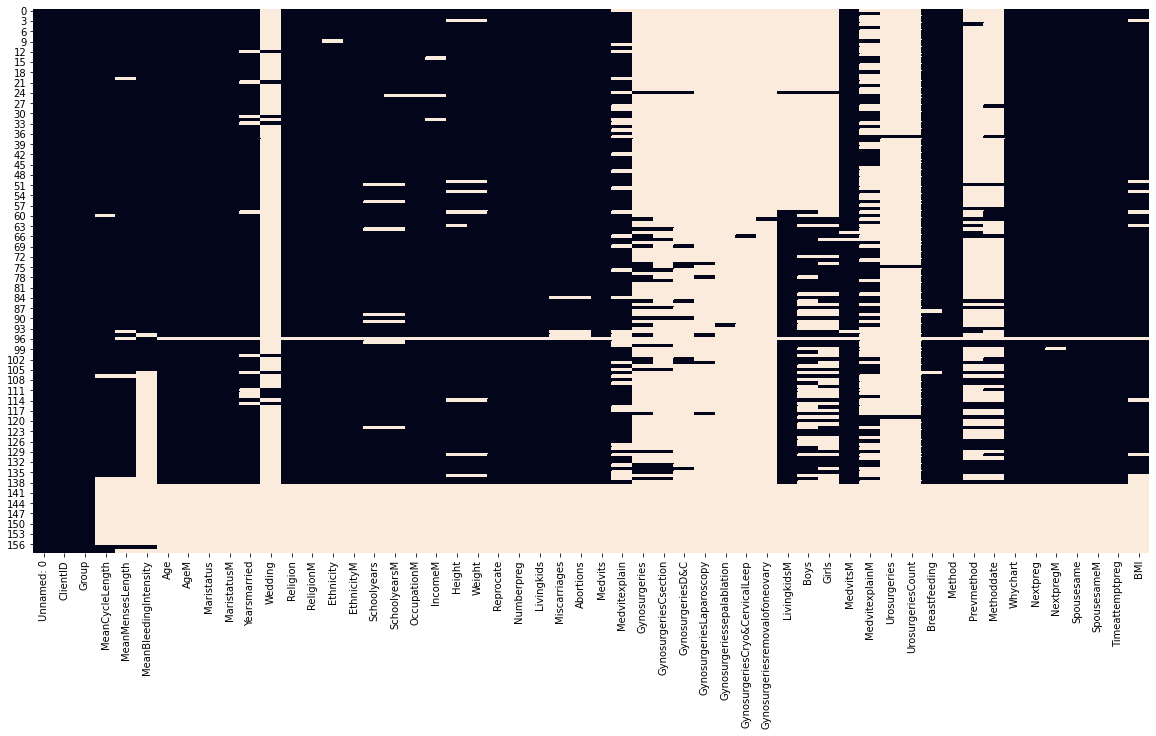

In [62]:
plt.figure(figsize=(20,10))
sns.heatmap(client_df.isnull(), cbar=False)

In [63]:
client_df[client_df.ClientID=='nfp8223']  #Most of the data is missing for this clientID

Unnamed: 0 ClientID  Group  MeanCycleLength  MeanMensesLength  \
96        1037  nfp8223  Mucus             29.1               NaN   

    MeanBleedingIntensity  Age  AgeM Maristatus MaristatusM  Yearsmarried  \
96                   10.7  NaN   NaN        NaN         NaN           NaN   

    Wedding Religion ReligionM Ethnicity EthnicityM Schoolyears SchoolyearsM  \
96      NaN      NaN       NaN       NaN        NaN         NaN          NaN   

   OccupationM IncomeM  Height  Weight Reprocate  Numberpreg  Livingkids  \
96         NaN     NaN     NaN     NaN       NaN         NaN         NaN   

    Miscarriages  Abortions Medvits Medvitexplain Gynosurgeries  \
96           NaN        NaN     NaN           NaN           NaN   

    GynosurgeriesCsection  GynosurgeriesD&C  GynosurgeriesLaparoscopy  \
96                    NaN               NaN                       NaN   

    Gynosurgeriessepalablation  GynosurgeriesCryo&CervicalLeep  \
96                         NaN                             NaN   

    Gynosurgeriesremovalofoneovary  LivingkidsM  Boys  Girls MedvitsM  \
96                             NaN          NaN   NaN    NaN      NaN   

   MedvitexplainM Urosurgeries  UrosurgeriesCount Breastfeeding Method  \
96            NaN          NaN                NaN           NaN    NaN   

   Prevmethod  Methoddate Whychart Nextpreg NextpregM Spousesame SpousesameM  \
96        NaN         NaN      NaN      NaN       NaN        NaN         NaN   

    Timeattemptpreg  BMI  
96              NaN  NaN

In [64]:
client_df.drop(range(139,159), axis=0, inplace=True) #Dropping the insignificant columns of main dataframe 
client_df.ClientID

0      nfp8122
1      nfp8114
2      nfp8109
3      nfp8107
4      nfp8106
        ...   
134    nfp8288
135    nfp8289
136    nfp8290
137    nfp8292
138    nfp8293
Name: ClientID, Length: 139, dtype: object

### Gynosurgeries

* New columns with Gynosurgeries title are created manually, since the values are not in proper format, we wrote it by hand.
* Value in new column represent the count of that Gynosurgery.
* Data is stored into new csv file-'client_data_new.csv' 

In [65]:
client_df=pd.read_csv('ClientData_new.csv')
client_df

Unnamed: 0 ClientID    Group  MeanCycleLength  MeanMensesLength  \
0             0  nfp8122  Monitor            27.33              4.49   
1            45  nfp8114  Monitor            31.00              4.50   
2            47  nfp8109  Monitor            26.33              6.67   
3            50  nfp8107  Monitor            26.88              4.75   
4            58  nfp8106  Monitor            25.33              4.33   
..          ...      ...      ...              ...               ...   
154        1564  nfp8322  Monitor              NaN               NaN   
155        1576  nfp8323  Monitor              NaN               NaN   
156        1609  nfp8324    Mucus              NaN               NaN   
157        1621  nfp8328  Monitor            30.50              5.00   
158        1654  nfp8334    Mucus            29.63               NaN   

     MeanBleedingIntensity   Age  AgeM Maristatus MaristatusM  Yearsmarried  \
0                     9.04  36.0  39.0          0     Married          10.0   
1                     7.50  39.0  36.0          0     Married           4.0   
2                    12.33  29.0  32.0          0     Married           8.0   
3                     7.38  26.0  25.0          0     Married           4.0   
4                     6.67  25.0  38.0          0     Married           1.0   
..                     ...   ...   ...        ...         ...           ...   
154                    NaN   NaN   NaN        NaN         NaN           NaN   
155                    NaN   NaN   NaN        NaN         NaN           NaN   
156                    NaN   NaN   NaN        NaN         NaN           NaN   
157                   7.00   NaN   NaN        NaN         NaN           NaN   
158                    NaN   NaN   NaN        NaN         NaN           NaN   

     Wedding Religion ReligionM Ethnicity     EthnicityM Schoolyears  \
0        NaN        0  Catholic         0  Euro-American       15-16   
1        NaN        0  Catholic         0  Euro-American         17+   
2        NaN   Muslim  Catholic         0          Other       15-16   
3        NaN   Muslim     Other         0  Euro-American         17+   
4        NaN        0  Catholic         0  Euro-American       15-16   
..       ...      ...       ...       ...            ...         ...   
154      NaN      NaN       NaN       NaN            NaN         NaN   
155      NaN      NaN       NaN       NaN            NaN         NaN   
156      NaN      NaN       NaN       NaN            NaN         NaN   
157      NaN      NaN       NaN       NaN            NaN         NaN   
158      NaN      NaN       NaN       NaN            NaN         NaN   

    SchoolyearsM   OccupationM             IncomeM  Height  Weight  \
0          15-16     Technical  More than $100,000    63.0   120.0   
1            17+  Professional     $40,001-$70,000    68.0   185.0   
2          15-16  Professional  More than $100,000    66.0   180.0   
3            17+       Student     $40,001-$70,000     NaN     NaN   
4          13-14  Professional     $70,001-$99,999    71.0   200.0   
..           ...           ...                 ...     ...     ...   
154          NaN           NaN                 NaN     NaN     NaN   
155          NaN           NaN                 NaN     NaN     NaN   
156          NaN           NaN                 NaN     NaN     NaN   
157          NaN           NaN                 NaN     NaN     NaN   
158          NaN           NaN                 NaN     NaN     NaN   

                Reprocate  Numberpreg  Livingkids  Miscarriages  Abortions  \
0    Regular (25-35 days)         3.0         3.0           0.0        0.0   
1    Regular (25-35 days)         2.0         2.0           0.0        0.0   
2    Regular (25-35 days)         2.0         2.0           0.0        0.0   
3    Regular (25-35 days)         0.0         0.0           0.0        0.0   
4    Regular (25-35 days)         0.0         0.0           0.0        0.0   
..               

In [66]:
df['GynosurgeriesCsection']=np.nan
for i in client_df.ClientID[client_df.GynosurgeriesCsection.notnull()]:
    #print(i)
    for j in range(df.shape[0]):
        if df.ClientID.iloc[j]==i:
            df.GynosurgeriesCsection.iloc[j]=(client_df.GynosurgeriesCsection[client_df.ClientID==i].values)
    
df.GynosurgeriesCsection.isnull().sum()

1248

In [67]:
df['GynosurgeriesLaparoscopy']=np.nan
for i in client_df.ClientID[client_df.GynosurgeriesLaparoscopy.notnull()]:
    #print(i)
    for j in range(df.shape[0]):
        if df.ClientID.iloc[j]==i:
            df.GynosurgeriesLaparoscopy.iloc[j]=(client_df.GynosurgeriesLaparoscopy[client_df.ClientID==i].values)
    
df.GynosurgeriesLaparoscopy.isnull().sum()

1339

In [68]:
df['GynosurgeriesRemovalofOneOvary']=np.nan
for i in client_df.ClientID[client_df.Gynosurgeriesremovalofoneovary.notnull()]:
    #print(i)
    for j in range(df.shape[0]):
        if df.ClientID.iloc[j]==i:
            df.GynosurgeriesRemovalofOneOvary.iloc[j]=(client_df.Gynosurgeriesremovalofoneovary[client_df.ClientID==i].values)
    
df.GynosurgeriesRemovalofOneOvary.isnull().sum()

1392

In [69]:
df['GynosurgeriesSepalAblation']=np.nan
for i in client_df.ClientID[client_df.Gynosurgeriessepalablation.notnull()]:
    #print(i)
    for j in range(df.shape[0]):
        if df.ClientID.iloc[j]==i:
            df.GynosurgeriesSepalAblation.iloc[j]=(client_df.Gynosurgeriessepalablation[client_df.ClientID==i].values)
    
df.GynosurgeriesSepalAblation.isnull().sum()

1399

In [70]:
df['GynosurgeriesDandC']=np.nan
for i in client_df.ClientID[client_df['GynosurgeriesD&C'].notnull()]:
    #print(i)
    for j in range(df.shape[0]):
        if df.ClientID.iloc[j]==i:
            df.GynosurgeriesDandC.iloc[j]=(client_df['GynosurgeriesD&C'][client_df.ClientID==i].values)
    
df.GynosurgeriesDandC.isnull().sum()

1305

In [71]:

df['GynosurgeriesCryoandCervicalLeep']=np.nan
for i in client_df.ClientID[client_df['GynosurgeriesCryo&CervicalLeep'].notnull()]:
    #print(i)
    for j in range(df.shape[0]):
        if df.ClientID.iloc[j]==i:
            df.GynosurgeriesCryoandCervicalLeep.iloc[j]=(client_df['GynosurgeriesCryo&CervicalLeep'][client_df.ClientID==i].values)
    
df.GynosurgeriesCryoandCervicalLeep.isnull().sum()


1394

In [72]:
df.shape

(1406, 86)

In [73]:
for i in df.columns:
    if i.startswith('Gynosurgeries'):
        print(i)
        df[i].fillna(0, inplace=True)
        print(df[i].isnull().sum())

Gynosurgeries
0
GynosurgeriesCsection
0
GynosurgeriesLaparoscopy
0
GynosurgeriesRemovalofOneOvary
0
GynosurgeriesSepalAblation
0
GynosurgeriesDandC
0
GynosurgeriesCryoandCervicalLeep
0


* Filled all the null values of the surgeries columns with 0

### Prevmethod | Method

* Current method of family planning, 
* If it is 'NO' then which was the most recent method client has used, and when did they stop using the most recent method,

In [74]:
client_df.Prevmethod.value_counts(dropna=False)

NaN              130
None              10
NFP                8
Pill               4
Barrier            2
Withdrawl          2
Abstinence         1
IUD                1
Breastfeeding      1
Name: Prevmethod, dtype: int64

In [75]:
client_df.Method.value_counts(dropna=False)

NFP              106
NaN               21
Withdrawal         8
Abstinence         8
None               8
Barrier            5
Breastfeeding      2
Other              1
Name: Method, dtype: int64

In [76]:
df.Method=df.groupby('ClientID').Method.ffill()
df.Method.isnull().sum()

10

In [77]:
df.ClientID[df.Method.isnull()] # just for 1 client data is

1037    nfp8223
1038    nfp8223
1039    nfp8223
1040    nfp8223
1041    nfp8223
1042    nfp8223
1043    nfp8223
1044    nfp8223
1045    nfp8223
1046    nfp8223
Name: ClientID, dtype: object

In [78]:
df.Method.fillna('None',inplace=True )
df.Method.isnull().sum()

0

In [79]:
df.Prevmethod=df.groupby('ClientID').Prevmethod.ffill()
df.Prevmethod.isnull().sum()

1169

In [80]:
df.Prevmethod.fillna('None',inplace=True )
df.Prevmethod.isnull().sum()

0

* First forward filled all the values by clientID
* Filled null values in method column with 'None'
* filled null values in prevmethod column with 'None'

### Ethnicity | Religion

In [81]:
client_df[['Ethnicity', 'EthnicityM']]

Ethnicity     EthnicityM
0           0  Euro-American
1           0  Euro-American
2           0          Other
3           0  Euro-American
4           0  Euro-American
..        ...            ...
154       NaN            NaN
155       NaN            NaN
156       NaN            NaN
157       NaN            NaN
158       NaN            NaN

[159 rows x 2 columns]

In [82]:
client_df[['Religion', 'ReligionM']]

Religion ReligionM
0          0  Catholic
1          0  Catholic
2     Muslim  Catholic
3     Muslim     Other
4          0  Catholic
..       ...       ...
154      NaN       NaN
155      NaN       NaN
156      NaN       NaN
157      NaN       NaN
158      NaN       NaN

[159 rows x 2 columns]

**Correcting the labels**

In [83]:
for i in range(client_df.shape[0]):
    if client_df.Ethnicity.iloc[i]=='0':
        client_df.Ethnicity.iloc[i]=client_df.EthnicityM.iloc[i]

In [84]:
client_df.Ethnicity.value_counts(dropna=False)

Euro-American        109
NaN                   22
African American      10
Hispanic-American      8
Native-American        6
Asian-American         2
African-American       1
Other                  1
Name: Ethnicity, dtype: int64

In [85]:
client_df.Ethnicity.replace('African American','African-American', inplace=True)
client_df.Ethnicity.value_counts()

Euro-American        109
African-American      11
Hispanic-American      8
Native-American        6
Asian-American         2
Other                  1
Name: Ethnicity, dtype: int64

In [86]:
client_df.Religion.value_counts(dropna=False)

0           116
NaN          21
Catholic     16
Muslim        6
Name: Religion, dtype: int64

In [87]:
for i in range(client_df.shape[0]):
    if client_df.Religion.iloc[i]=='0':
        client_df.Religion.iloc[i]=client_df.ReligionM.iloc[i]
client_df.Religion.value_counts(dropna=False)

Catholic                      123
NaN                            21
Muslim                          6
Other                           6
Protestant/Other Christian      3
Name: Religion, dtype: int64

In [88]:
client_df[['Method', 'Prevmethod']][client_df.Breastfeeding=='6'] # changing label '6' to 'No'

Method Prevmethod
37  Abstinence        NaN

In [89]:
client_df.Breastfeeding.replace('6','No', inplace=True)

* Where there is label '0' in the Ethnicity , replaced it with the label of EthnicityM
* Where both partners have same Ethnicity, label '0' is present in Ethnicity
* Same is the case with Religion
* Where there is 6 for Breastfeeding, replaced it with No

### Handling the Missing Values

In [90]:
client_df[client_df.Ethnicity.isnull()]

Unnamed: 0 ClientID    Group  MeanCycleLength  MeanMensesLength  \
9           111  nfp8031  Monitor            27.17              5.33   
96         1037  nfp8223    Mucus            29.10               NaN   
139        1409  nfp8294  Monitor              NaN               NaN   
140        1421  nfp8296    Mucus              NaN               NaN   
141        1432  nfp8298    Mucus              NaN               NaN   
142        1443  nfp8299  Monitor              NaN               NaN   
143        1459  nfp8302  Monitor              NaN               NaN   
144        1460  nfp8303  Monitor              NaN               NaN   
145        1465  nfp8305    Mucus              NaN               NaN   
146        1477  nfp8306  Monitor              NaN               NaN   
147        1489  nfp8308  Monitor              NaN               NaN   
148        1502  nfp8309  Monitor              NaN               NaN   
149        1518  nfp8310  Monitor              NaN               NaN   
150        1532  nfp8311    Mucus              NaN               NaN   
151        1537  nfp8312    Mucus              NaN               NaN   
152        1555  nfp8313  Monitor              NaN               NaN   
153        1560  nfp8317  Monitor              NaN               NaN   
154        1564  nfp8322  Monitor              NaN               NaN   
155        1576  nfp8323  Monitor              NaN               NaN   
156        1609  nfp8324    Mucus              NaN               NaN   
157        1621  nfp8328  Monitor            30.50              5.00   
158        1654  nfp8334    Mucus            29.63               NaN   

     MeanBleedingIntensity   Age  AgeM Maristatus MaristatusM  Yearsmarried  \
9                    10.17  30.0  42.0          0     Married           7.0   
96                   10.70   NaN   NaN        NaN         NaN           NaN   
139                    NaN   NaN   NaN        NaN         NaN           NaN   
140                    NaN   NaN   NaN        NaN         NaN           NaN   
141                    NaN   NaN   NaN        NaN         NaN           NaN   
142                    NaN   NaN   NaN        NaN         NaN           NaN   
143                    NaN   NaN   NaN        NaN         NaN           NaN   
144                    NaN   NaN   NaN        NaN         NaN           NaN   
145                    NaN   NaN   NaN        NaN         NaN           NaN   
146                    NaN   NaN   NaN        NaN         NaN           NaN   
147                    NaN   NaN   NaN        NaN         NaN           NaN   
148                    NaN   NaN   NaN        NaN         NaN           NaN   
149                    NaN   NaN   NaN        NaN         NaN           NaN   
150                    NaN   NaN   NaN        NaN         NaN           NaN   
151                    NaN   NaN   NaN        NaN         NaN           NaN   
152                    NaN   NaN   NaN        NaN         NaN           NaN   
153                    NaN   NaN   NaN        NaN         NaN           NaN   
154                    NaN   NaN   NaN        NaN         NaN           NaN   
155                    NaN   NaN   NaN        NaN         NaN           NaN   
156                    NaN   NaN   NaN        NaN         NaN           NaN   
157                   7.00   NaN   NaN        NaN         NaN           NaN   
158                    NaN   NaN   NaN        NaN         NaN           NaN   

     Wedding  Religion ReligionM Ethnicity     EthnicityM Schoolyears  \
9        NaN  Catholic  Catholic       NaN  Euro-American       15-16   
96       NaN       NaN       NaN       NaN            NaN         NaN   
139      NaN       NaN       NaN       NaN            NaN         NaN   
140      NaN       NaN       NaN       NaN            NaN         NaN   
141      NaN       NaN       NaN       NaN            NaN         NaN   
142      NaN       NaN       NaN       NaN            NaN         NaN   
143      NaN       

<AxesSubplot:xlabel='Ethnicity', ylabel='count'>

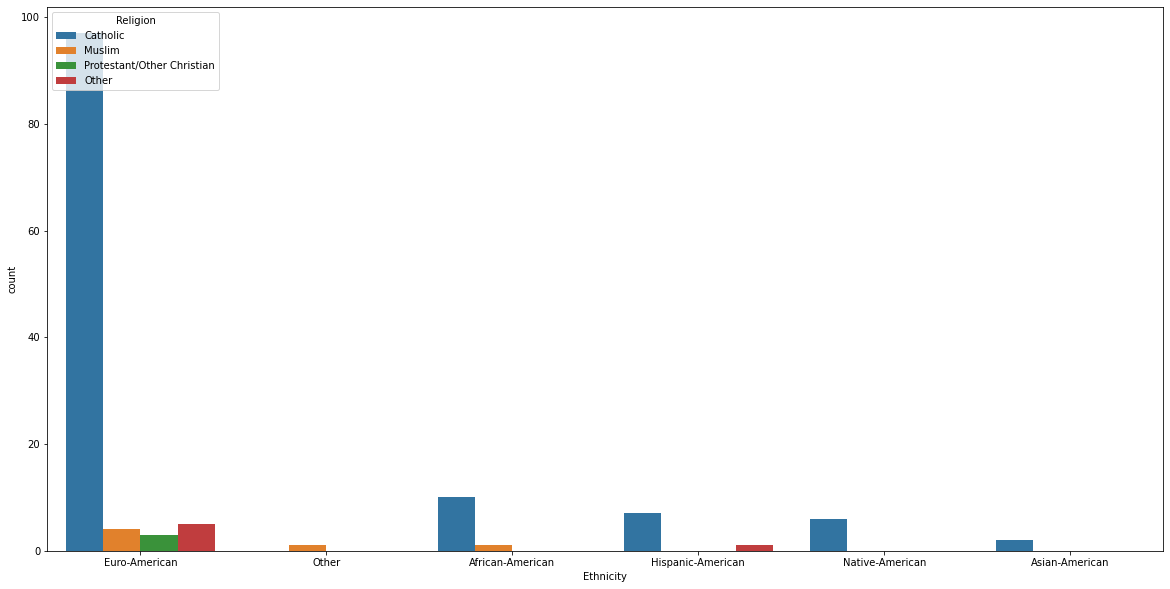

In [91]:
plt.figure(figsize=(20,10))
sns.countplot(x='Ethnicity', hue='Religion', data=client_df)

In [92]:
# if the religion is catholic, she is higly likely be 'Euro-American'
client_df.Ethnicity[client_df.ClientID=='nfp8031']='Euro-American'

<AxesSubplot:xlabel='Ethnicity', ylabel='count'>

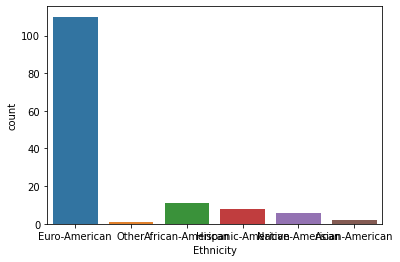

In [93]:
sns.countplot(client_df.Ethnicity)

<AxesSubplot:xlabel='Religion', ylabel='count'>

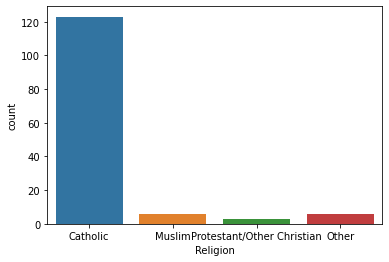

In [94]:
sns.countplot(client_df.Religion)

In [95]:
client_df.Ethnicity.fillna('Euro-American', inplace=True)
client_df.Religion.fillna('Catholic', inplace=True)

* For client 'nfp8223'- all values are missing from Age 
* Replaced them with most frequent value

### BMI | Height | Weight

* Where there is Height and weight provided -calculate the BMI
* BMI = (weight ÷ height** 2) * 703

In [96]:
client_df.BMI.isnull().sum()

31

In [97]:
client_df[['ClientID','Height','Weight','BMI']][client_df.BMI.isnull()|client_df.Height.isnull()|client_df.Weight.isnull()]

ClientID  Height  Weight  BMI
3    nfp8107     NaN     NaN  NaN
50   nfp8123     NaN     NaN  NaN
53   nfp8131     NaN     NaN  NaN
59   nfp8149     NaN     NaN  NaN
63   nfp8155     NaN     0.0  NaN
96   nfp8223     NaN     NaN  NaN
114  nfp8252     NaN     NaN  NaN
130  nfp8281     NaN     NaN  NaN
136  nfp8290     NaN     NaN  NaN
137  nfp8292    66.0   150.0  NaN
138  nfp8293    63.0   110.0  NaN
139  nfp8294     NaN     NaN  NaN
140  nfp8296     NaN     NaN  NaN
141  nfp8298     NaN     NaN  NaN
142  nfp8299     NaN     NaN  NaN
143  nfp8302     NaN     NaN  NaN
144  nfp8303     NaN     NaN  NaN
145  nfp8305     NaN     NaN  NaN
146  nfp8306     NaN     NaN  NaN
147  nfp8308     NaN     NaN  NaN
148  nfp8309     NaN     NaN  NaN
149  nfp8310     NaN     NaN  NaN
150  nfp8311     NaN     NaN  NaN
151  nfp8312     NaN     NaN  NaN
152  nfp8313     NaN     NaN  NaN
153  nfp8317     NaN     NaN  NaN
154  nfp8322     NaN     NaN  NaN
155  nfp8323     NaN     NaN  NaN
156  nfp8324     NaN     NaN  NaN
157  nfp8328     NaN     NaN  NaN
158  nfp8334     NaN     NaN  NaN

In [98]:
for i in client_df[client_df.BMI.isnull()].index:
    client_df.BMI.iloc[i]=(client_df.Weight.iloc[i]/(client_df.Height.iloc[i]**2)* 703)
    print(client_df.BMI.iloc[i])

nan
nan
nan
nan
nan
nan
nan
nan
nan
24.207988980716255
19.48349710254472
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [99]:
# Height has correlation with Ethnicty
client_df[['ClientID','Height','Weight','BMI','Ethnicity','Religion']][client_df.BMI.isnull()]

ClientID  Height  Weight  BMI      Ethnicity  Religion
3    nfp8107     NaN     NaN  NaN  Euro-American    Muslim
50   nfp8123     NaN     NaN  NaN  Euro-American  Catholic
53   nfp8131     NaN     NaN  NaN  Euro-American  Catholic
59   nfp8149     NaN     NaN  NaN  Euro-American     Other
63   nfp8155     NaN     0.0  NaN  Euro-American  Catholic
96   nfp8223     NaN     NaN  NaN  Euro-American  Catholic
114  nfp8252     NaN     NaN  NaN  Euro-American  Catholic
130  nfp8281     NaN     NaN  NaN  Euro-American  Catholic
136  nfp8290     NaN     NaN  NaN  Euro-American  Catholic
139  nfp8294     NaN     NaN  NaN  Euro-American  Catholic
140  nfp8296     NaN     NaN  NaN  Euro-American  Catholic
141  nfp8298     NaN     NaN  NaN  Euro-American  Catholic
142  nfp8299     NaN     NaN  NaN  Euro-American  Catholic
143  nfp8302     NaN     NaN  NaN  Euro-American  Catholic
144  nfp8303     NaN     NaN  NaN  Euro-American  Catholic
145  nfp8305     NaN     NaN  NaN  Euro-American  Catholic
146  nfp8306     NaN     NaN  NaN  Euro-American  Catholic
147  nfp8308     NaN     NaN  NaN  Euro-American  Catholic
148  nfp8309     NaN     NaN  NaN  Euro-American  Catholic
149  nfp8310     NaN     NaN  NaN  Euro-American  Catholic
150  nfp8311     NaN     NaN  NaN  Euro-American  Catholic
151  nfp8312     NaN     NaN  NaN  Euro-American  Catholic
152  nfp8313     NaN     NaN  NaN  Euro-American  Catholic
153  nfp8317     NaN     NaN  NaN  Euro-American  Catholic
154  nfp8322     NaN     NaN  NaN  Euro-American  Catholic
155  nfp8323     NaN     NaN  NaN  Euro-American  Catholic
156  nfp8324     NaN     NaN  NaN  Euro-American  Catholic
157  nfp8328     NaN     NaN  NaN  Euro-American  Catholic
158  nfp8334     NaN     NaN  NaN  Euro-American  Catholic

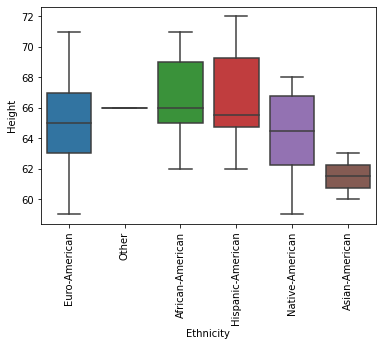

In [100]:
sns.boxplot(y='Height', x='Ethnicity' ,data=client_df)
plt.xticks(rotation='vertical')
plt.show()

In [101]:
client_df.Height[client_df.Ethnicity=='Euro-American'].median()

65.0

In [102]:
# fillna for Height with median Ethicity wise 
client_df.Height.fillna(65,inplace=True) # since all missinng values are for Euro-Amricans only
client_df.Height.isnull().sum()

0

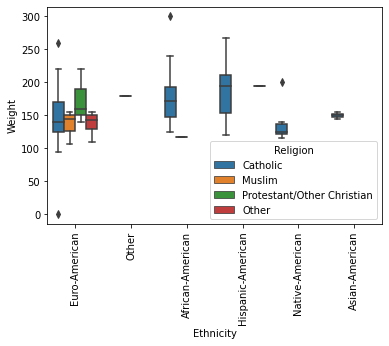

In [103]:
sns.boxplot(y='Weight', x='Ethnicity' , hue='Religion', data=client_df)
plt.xticks(rotation='vertical')
plt.show()

In [104]:
tbl1=client_df.groupby(['Ethnicity','Religion']).Weight.mean()
tbl1

Ethnicity          Religion                  
African-American   Catholic                      183.000000
                   Muslim                        117.000000
Asian-American     Catholic                      150.000000
Euro-American      Catholic                      146.268817
                   Muslim                        135.333333
                   Other                         137.500000
                   Protestant/Other Christian    173.333333
Hispanic-American  Catholic                      187.714286
                   Other                         194.000000
Native-American    Catholic                      137.833333
Other              Muslim                        180.000000
Name: Weight, dtype: float64

* Weight has relation with Ethnicity and religion client follows, fillna from weight with group by Ethnicity and religion both
* Though there is not much variation in weight except for Protestant 

In [105]:
for i in client_df[client_df.BMI.isnull()].index:
    for j in range(tbl1.shape[0]):
        if (client_df.iloc[i]['Ethnicity'],client_df.iloc[i]['Religion'])==tbl1.index[j]:
            client_df.Weight[i]=np.round(tbl1[j])
client_df.Weight.isnull().sum()

0

In [106]:
for i in client_df[client_df.BMI.isnull()].index:
    client_df.BMI.iloc[i]=(client_df.Weight.iloc[i]/(client_df.Height.iloc[i]**2)* 703)
    print(client_df.BMI.iloc[i])

22.46272189349112
24.293017751479287
24.293017751479287
22.96189349112426
24.293017751479287
24.293017751479287
24.293017751479287
24.293017751479287
24.293017751479287
24.293017751479287
24.293017751479287
24.293017751479287
24.293017751479287
24.293017751479287
24.293017751479287
24.293017751479287
24.293017751479287
24.293017751479287
24.293017751479287
24.293017751479287
24.293017751479287
24.293017751479287
24.293017751479287
24.293017751479287
24.293017751479287
24.293017751479287
24.293017751479287
24.293017751479287
24.293017751479287


### Livingkids | Numberpreg

In [107]:
client_df.ClientID[client_df.Livingkids.isnull()]

96     nfp8223
139    nfp8294
140    nfp8296
141    nfp8298
142    nfp8299
143    nfp8302
144    nfp8303
145    nfp8305
146    nfp8306
147    nfp8308
148    nfp8309
149    nfp8310
150    nfp8311
151    nfp8312
152    nfp8313
153    nfp8317
154    nfp8322
155    nfp8323
156    nfp8324
157    nfp8328
158    nfp8334
Name: ClientID, dtype: object

<AxesSubplot:xlabel='Livingkids', ylabel='Density'>

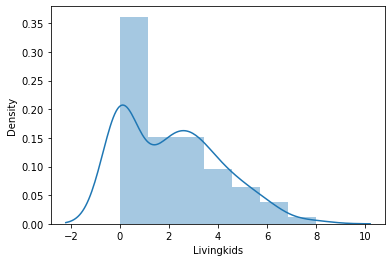

In [108]:
sns.distplot(client_df.Livingkids)

In [109]:
client_df.Livingkids.value_counts()

0.0    48
2.0    24
3.0    24
4.0    15
5.0    10
1.0     9
6.0     6
8.0     1
7.0     1
Name: Livingkids, dtype: int64

In [110]:
client_df[client_df.ClientID=='nfp8223'] # for this client ID whole data from Age is missing

Unnamed: 0 ClientID  Group  MeanCycleLength  MeanMensesLength  \
96        1037  nfp8223  Mucus             29.1               NaN   

    MeanBleedingIntensity  Age  AgeM Maristatus MaristatusM  Yearsmarried  \
96                   10.7  NaN   NaN        NaN         NaN           NaN   

    Wedding  Religion ReligionM      Ethnicity EthnicityM Schoolyears  \
96      NaN  Catholic       NaN  Euro-American        NaN         NaN   

   SchoolyearsM OccupationM IncomeM  Height  Weight Reprocate  Numberpreg  \
96          NaN         NaN     NaN    65.0   146.0       NaN         NaN   

    Livingkids  Miscarriages  Abortions Medvits Medvitexplain Gynosurgeries  \
96         NaN           NaN        NaN     NaN           NaN           NaN   

    GynosurgeriesCsection  GynosurgeriesD&C  GynosurgeriesLaparoscopy  \
96                    NaN               NaN                       NaN   

    Gynosurgeriessepalablation  GynosurgeriesCryo&CervicalLeep  \
96                         NaN                             NaN   

    Gynosurgeriesremovalofoneovary  LivingkidsM  Boys  Girls MedvitsM  \
96                             NaN          NaN   NaN    NaN      NaN   

   MedvitexplainM Urosurgeries  UrosurgeriesCount Breastfeeding Method  \
96            NaN          NaN                NaN           NaN    NaN   

   Prevmethod  Methoddate Whychart Nextpreg NextpregM Spousesame SpousesameM  \
96        NaN         NaN      NaN      NaN       NaN        NaN         NaN   

    Timeattemptpreg        BMI  
96              NaN  24.293018

In [111]:
client_df.Livingkids.fillna(0, inplace=True)
client_df.Numberpreg.fillna(0, inplace=True)

### Age

<AxesSubplot:xlabel='Age', ylabel='Density'>

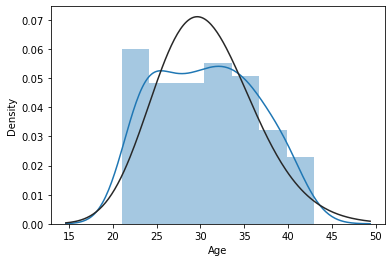

In [112]:
import scipy.stats as stats
sns.distplot(client_df.Age,fit=stats.f )

In [113]:
client_df.Age.fillna(np.round(client_df.Age.mean()), inplace=True)
client_df.Age.isnull().sum()

0

### Breastfeeding 

<AxesSubplot:xlabel='Breastfeeding', ylabel='count'>

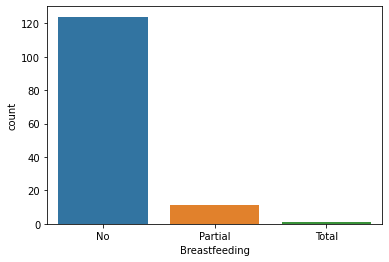

In [114]:
sns.countplot(client_df.Breastfeeding)

In [115]:
client_df.Breastfeeding.value_counts()

No         124
Partial     11
Total        1
Name: Breastfeeding, dtype: int64

In [116]:
client_df[['Method', 'Prevmethod']][client_df.Breastfeeding.isnull()] 

Method Prevmethod
88     NFP        NaN
96     NaN        NaN
106    NFP       Pill
139    NaN        NaN
140    NaN        NaN
141    NaN        NaN
142    NaN        NaN
143    NaN        NaN
144    NaN        NaN
145    NaN        NaN
146    NaN        NaN
147    NaN        NaN
148    NaN        NaN
149    NaN        NaN
150    NaN        NaN
151    NaN        NaN
152    NaN        NaN
153    NaN        NaN
154    NaN        NaN
155    NaN        NaN
156    NaN        NaN
157    NaN        NaN
158    NaN        NaN

* As Breastfeeding is not there in the contraceptive measure, we can impute null with 'No'

In [117]:
client_df.Breastfeeding.fillna('No', inplace=True)

In [118]:
client_df[['Method', 'Prevmethod']][client_df.Breastfeeding=='6'] 
# change label '6' to 'No'

Empty DataFrame
Columns: [Method, Prevmethod]
Index: []

In [119]:
client_df.Breastfeeding.replace('6','No', inplace=True)

### Miscarriages | Abortions

In [120]:
client_df.Livingkids

0      3.0
1      2.0
2      2.0
3      0.0
4      0.0
      ... 
154    0.0
155    0.0
156    0.0
157    0.0
158    0.0
Name: Livingkids, Length: 159, dtype: float64

In [121]:
client_df[['ClientID', 'Miscarriages','Abortions','Livingkids','Numberpreg']][client_df.Miscarriages.isnull() |client_df.Abortions.isnull()]

ClientID  Miscarriages  Abortions  Livingkids  Numberpreg
84   nfp8195           NaN        NaN         2.0         2.0
94   nfp8218           NaN        NaN         2.0         2.0
95   nfp8221           NaN        NaN         8.0         8.0
96   nfp8223           NaN        NaN         0.0         0.0
139  nfp8294           NaN        NaN         0.0         0.0
140  nfp8296           NaN        NaN         0.0         0.0
141  nfp8298           NaN        NaN         0.0         0.0
142  nfp8299           NaN        NaN         0.0         0.0
143  nfp8302           NaN        NaN         0.0         0.0
144  nfp8303           NaN        NaN         0.0         0.0
145  nfp8305           NaN        NaN         0.0         0.0
146  nfp8306           NaN        NaN         0.0         0.0
147  nfp8308           NaN        NaN         0.0         0.0
148  nfp8309           NaN        NaN         0.0         0.0
149  nfp8310           NaN        NaN         0.0         0.0
150  nfp8311           NaN        NaN         0.0         0.0
151  nfp8312           NaN        NaN         0.0         0.0
152  nfp8313           NaN        NaN         0.0         0.0
153  nfp8317           NaN        NaN         0.0         0.0
154  nfp8322           NaN        NaN         0.0         0.0
155  nfp8323           NaN        NaN         0.0         0.0
156  nfp8324           NaN        NaN         0.0         0.0
157  nfp8328           NaN        NaN         0.0         0.0
158  nfp8334           NaN        NaN         0.0         0.0

In [122]:
client_df[['ClientID', 'Miscarriages','Abortions','Livingkids','Numberpreg']][client_df.Abortions.notnull()]

ClientID  Miscarriages  Abortions  Livingkids  Numberpreg
0    nfp8122           0.0        0.0         3.0         3.0
1    nfp8114           0.0        0.0         2.0         2.0
2    nfp8109           0.0        0.0         2.0         2.0
3    nfp8107           0.0        0.0         0.0         0.0
4    nfp8106           0.0        0.0         0.0         0.0
..       ...           ...        ...         ...         ...
134  nfp8288           3.0        0.0         2.0         5.0
135  nfp8289           1.0        0.0         3.0         4.0
136  nfp8290           0.0        0.0         3.0         3.0
137  nfp8292           0.0        0.0         3.0         3.0
138  nfp8293           0.0        0.0         0.0         0.0

[135 rows x 5 columns]

* Miscarriages+Abortions+Livingkids==Numberpreg
* fillna for miscarriages and abortions as 0

In [123]:
client_df.Abortions.fillna(0, inplace=True)
client_df.Miscarriages.fillna(0, inplace=True)

In [124]:
df.isnull().sum().sort_values(ascending=False)

Wedding             1396
Methoddate          1374
Girls               1363
Boys                1359
LivingkidsM         1326
                    ... 
MensesScoreDay15       0
MensesScoreDay14       0
MensesScoreDay13       0
MensesScoreDay12       0
ClientID               0
Length: 86, dtype: int64

### ReproductiveCategory

In [125]:
df1.ReproductiveCategory.value_counts()

Regular (25-35d)    1609
Long (>35 days)       48
Short (<25 days)       4
Other                  4
Name: ReproductiveCategory, dtype: int64

In [126]:
df1.LengthofCycle[df1.ReproductiveCategory=='Other']

1165    33.0
1166    42.0
1167    24.0
1168    30.0
Name: LengthofCycle, dtype: float64

In [127]:
# Replacing the faulty values of reproductive category

df['ReproductiveCategory'] = np.where((df['ReproductiveCategory']=='Regular (25-35d)')& (df['LengthofCycle'] < 25.00),'Short (<25 days)',df['ReproductiveCategory'])

df['ReproductiveCategory'] = np.where((df['ReproductiveCategory']=='Regular (25-35d)')& (df['LengthofCycle'] > 35.00),'Long (>35 days)',df['ReproductiveCategory'])

df['ReproductiveCategory'] = np.where((df['LengthofCycle']<35.0)& (df['ReproductiveCategory']=='Long (>35 days)'),'Regular (25-35d)',df['ReproductiveCategory'])

df['ReproductiveCategory'] = np.where((df['ReproductiveCategory']=='Other')& (df['LengthofCycle'] < 25.00),'Short (<25 days)',df['ReproductiveCategory'])

df['ReproductiveCategory'] = np.where((df['ReproductiveCategory']=='Other')& (df['LengthofCycle'] > 35.00),'Long (>35 days)',df['ReproductiveCategory'])

df['ReproductiveCategory'] = np.where((df['ReproductiveCategory']=='Other'),'Regular (25-35d)',df['ReproductiveCategory'])

df[['ReproductiveCategory','LengthofCycle']][df['ReproductiveCategory']=='Other']

Empty DataFrame
Columns: [ReproductiveCategory, LengthofCycle]
Index: []

## Importing client data values to df

In [128]:
df_copy=df.copy()

In [129]:
df1=df_copy.merge(client_df, on=['ClientID'],how='inner')
df1 # merged dataframe

ClientID  CycleNumber  Group_x CycleWithPeakorNot ReproductiveCategory  \
0     nfp8122          1.0  Monitor               Peak     Regular (25-35d)   
1     nfp8122          2.0  Monitor               Peak     Regular (25-35d)   
2     nfp8122          3.0  Monitor               Peak     Regular (25-35d)   
3     nfp8122          4.0  Monitor               Peak     Regular (25-35d)   
4     nfp8122          5.0  Monitor               Peak     Regular (25-35d)   
...       ...          ...      ...                ...                  ...   
1401  nfp8292         12.0    Mucus               Peak     Regular (25-35d)   
1402  nfp8292         13.0    Mucus            No Peak     Regular (25-35d)   
1403  nfp8293          1.0  Monitor               Peak     Regular (25-35d)   
1404  nfp8293          2.0  Monitor               Peak     Regular (25-35d)   
1405  nfp8293          3.0  Monitor               Peak     Regular (25-35d)   

      LengthofCycle  MeanCycleLength_x  EstimatedDayofOvulation  \
0              29.0          27.330000                     17.0   
1              27.0          27.330000                     15.0   
2              29.0          27.330000                     15.0   
3              27.0          27.330000                     15.0   
4              28.0          27.330000                     16.0   
...             ...                ...                      ...   
1401           31.0          28.538462                     16.0   
1402           29.0          28.538462                      NaN   
1403           29.0          29.000000                     16.0   
1404           31.0          29.000000                     18.0   
1405           27.0          29.000000                     17.0   

      LengthofLutealPhase  FirstDayofHigh  TotalNumberofHighDays  \
0               12.000000            12.0                    5.0   
1               12.000000            13.0                    2.0   
2               14.000000             NaN                    1.0   
3               12.000000            13.0                    2.0   
4               12.000000            12.0                    4.0   
...                   ...             ...                    ...   
1401            15.000000            14.0                    2.0   
1402            13.408968            14.0                    2.0   
1403            13.000000             9.0                    7.0   
1404            13.000000             9.0                    9.0   
1405            10.000000            14.0                    3.0   

      TotalHighPostPeak  TotalNumberofPeakDays  TotalDaysofFertility  \
0                   0.0                    2.0                   9.0   
1                   0.0                    2.0                   6.0   
2                   0.0                    2.0                   5.0   
3                   0.0                    2.0                   6.0   
4                   0.0                    2.0                   8.0   
...                 ...                    ...                   ...   
1401                0.0                    1.0                   6.0   
1402                0.0                    0.0                   5.0   
1403                0.0                    2.0                  11.0   
1404                0.0                    2.0                  13.0   
1405                0.0                    2.0                   7.0   

      TotalFertilityFormula  LengthofMenses  MeanMensesLength_x  \
0                      15.0             5.0            4.490000   
1                      13.0             5.0            4.490000   
2                      13.0             5.0            4.490000   
3                      13.0             5.0            4.490000   
4                      14.0             5.0            4.490000   
...                     ...             ...                 ...   
1401                   15.0             6.0            5.692308   
1402                   16.0      

In [130]:
df1.columns

Index(['ClientID', 'CycleNumber', 'Group_x', 'CycleWithPeakorNot',
       'ReproductiveCategory', 'LengthofCycle', 'MeanCycleLength_x',
       'EstimatedDayofOvulation', 'LengthofLutealPhase', 'FirstDayofHigh',
       ...
       'Method_y', 'Prevmethod_y', 'Methoddate_y', 'Whychart_y', 'Nextpreg_y',
       'NextpregM_y', 'Spousesame_y', 'SpousesameM_y', 'Timeattemptpreg_y',
       'BMI_y'],
      dtype='object', length=139)

In [131]:
print(df1.iloc[:,:50].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1406 entries, 0 to 1405
Data columns (total 50 columns):
ClientID                      1406 non-null object
CycleNumber                   1406 non-null float64
Group_x                       1406 non-null category
CycleWithPeakorNot            1406 non-null category
ReproductiveCategory          1406 non-null object
LengthofCycle                 1406 non-null float64
MeanCycleLength_x             1406 non-null float64
EstimatedDayofOvulation       1291 non-null float64
LengthofLutealPhase           1406 non-null float64
FirstDayofHigh                1195 non-null float64
TotalNumberofHighDays         1406 non-null float64
TotalHighPostPeak             1406 non-null float64
TotalNumberofPeakDays         1406 non-null float64
TotalDaysofFertility          1406 non-null float64
TotalFertilityFormula         1406 non-null float64
LengthofMenses                1406 non-null float64
MeanMensesLength_x            1406 non-null float64
MensesSco

In [132]:
print(df1.iloc[:,50:].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1406 entries, 0 to 1405
Data columns (total 89 columns):
SchoolyearsM_x                      134 non-null category
OccupationM_x                       141 non-null category
IncomeM_x                           139 non-null category
Height_x                            133 non-null float64
Weight_x                            134 non-null float64
Reprocate_x                         142 non-null category
Numberpreg_x                        142 non-null float64
Livingkids_x                        142 non-null float64
Miscarriages_x                      139 non-null float64
Abortions_x                         139 non-null float64
Medvits_x                           142 non-null category
Medvitexplain_x                     1406 non-null object
Gynosurgeries_x                     1406 non-null object
LivingkidsM_x                       80 non-null float64
Boys_x                              47 non-null float64
Girls_x                            

In [133]:
# Dropping the duplicate columns where null values are not imputed.
cols_df1=[]
for i in df1.columns:
    if i.endswith('_x'):
        string=i.rstrip('_x')
        string=string+'_y'
        if df1[i].isnull().sum() < df1[string].isnull().sum():
            if i not in cols_df1:
                cols_df1.append(i)
        else:
            if i not in cols_df1:
                cols_df1.append(string)
    else:
        if i not in cols_df1:
            cols_df1.append(i)
print(cols_df1)

['ClientID', 'CycleNumber', 'Group_y', 'CycleWithPeakorNot', 'ReproductiveCategory', 'LengthofCycle', 'MeanCycleLength_x', 'EstimatedDayofOvulation', 'LengthofLutealPhase', 'FirstDayofHigh', 'TotalNumberofHighDays', 'TotalHighPostPeak', 'TotalNumberofPeakDays', 'TotalDaysofFertility', 'TotalFertilityFormula', 'LengthofMenses', 'MeanMensesLength_x', 'MensesScoreDayOne', 'MensesScoreDayTwo', 'MensesScoreDayThree', 'MensesScoreDayFour', 'MensesScoreDayFive', 'MensesScoreDaySix', 'MensesScoreDaySeven', 'MensesScoreDayEight', 'MensesScoreDayNine', 'MensesScoreDayTen', 'MensesScoreDay11', 'MensesScoreDay12', 'MensesScoreDay13', 'MensesScoreDay14', 'MensesScoreDay15', 'TotalMensesScore', 'MeanBleedingIntensity_x', 'NumberofDaysofIntercourse', 'IntercourseInFertileWindow', 'UnusualBleeding', 'PhasesBleeding', 'IntercourseDuringUnusBleed', 'Age_y', 'AgeM_y', 'Maristatus_y', 'MaristatusM_y', 'Yearsmarried_y', 'Wedding_y', 'Religion_y', 'ReligionM_y', 'Ethnicity_y', 'EthnicityM_y', 'Schoolyears_y

In [134]:
cols_set=set(cols_df1)
cols_set

{'Abortions_y',
 'AgeM_y',
 'Age_y',
 'BMI_y',
 'Boys_y',
 'Breastfeeding_y',
 'ClientID',
 'CycleNumber',
 'CycleWithPeakorNot',
 'EstimatedDayofOvulation',
 'EthnicityM_y',
 'Ethnicity_y',
 'FirstDayofHigh',
 'Girls_y',
 'Group_y',
 'GynosurgeriesCryo&CervicalLeep',
 'GynosurgeriesCryoandCervicalLeep',
 'GynosurgeriesCsection_x',
 'GynosurgeriesCsection_y',
 'GynosurgeriesD&C',
 'GynosurgeriesDandC',
 'GynosurgeriesLaparoscopy_x',
 'GynosurgeriesLaparoscopy_y',
 'GynosurgeriesRemovalofOneOvary',
 'GynosurgeriesSepalAblation',
 'Gynosurgeries_x',
 'Gynosurgeries_y',
 'Gynosurgeriesremovalofoneovary',
 'Gynosurgeriessepalablation',
 'Height_y',
 'IncomeM_y',
 'IntercourseDuringUnusBleed',
 'IntercourseInFertileWindow',
 'LengthofCycle',
 'LengthofLutealPhase',
 'LengthofMenses',
 'LivingkidsM_y',
 'Livingkids_y',
 'MaristatusM_y',
 'Maristatus_y',
 'MeanBleedingIntensity_x',
 'MeanBleedingIntensity_y',
 'MeanCycleLength_x',
 'MeanCycleLength_y',
 'MeanMensesLength_x',
 'MeanMensesLengt

In [135]:
len(cols_set)

103

In [136]:
# same columns are present with suffixes, drop them
cols_set_final=cols_set.copy() 
for i in cols_set:
    if i.endswith('_x'):
        string=i.rstrip('_x')+'_y'
        if string in cols_set:
            if df1[i].isnull().sum() < df1[string].isnull().sum():
                cols_set_final.discard(string)
print(cols_set_final)

{'MensesScoreDay13', 'Weight_y', 'OccupationM_y', 'MensesScoreDaySix', 'Methoddate_y', 'AgeM_y', 'Maristatus_y', 'ReproductiveCategory', 'Method_x', 'Ethnicity_y', 'MeanBleedingIntensity_x', 'MensesScoreDayFour', 'Boys_y', 'CycleNumber', 'GynosurgeriesCryoandCervicalLeep', 'MensesScoreDay11', 'GynosurgeriesRemovalofOneOvary', 'MensesScoreDayEight', 'UrosurgeriesCount', 'LengthofCycle', 'MensesScoreDayOne', 'Unnamed: 0', 'Girls_y', 'TotalHighPostPeak', 'MensesScoreDayNine', 'Yearsmarried_y', 'NextpregM_y', 'MensesScoreDay15', 'MedvitexplainM_x', 'GynosurgeriesDandC', 'Numberpreg_y', 'EstimatedDayofOvulation', 'GynosurgeriesCsection_x', 'GynosurgeriesLaparoscopy_x', 'EthnicityM_y', 'Timeattemptpreg_y', 'Height_y', 'PhasesBleeding', 'NumberofDaysofIntercourse', 'MensesScoreDay12', 'Medvitexplain_x', 'Age_y', 'MensesScoreDayTwo', 'Abortions_y', 'ReligionM_y', 'MensesScoreDayThree', 'LengthofLutealPhase', 'Group_y', 'SpousesameM_y', 'Breastfeeding_y', 'TotalNumberofHighDays', 'LengthofMense

In [137]:
len(cols_set_final)

92

In [138]:
print(cols_set_final)

{'MensesScoreDay13', 'Weight_y', 'OccupationM_y', 'MensesScoreDaySix', 'Methoddate_y', 'AgeM_y', 'Maristatus_y', 'ReproductiveCategory', 'Method_x', 'Ethnicity_y', 'MeanBleedingIntensity_x', 'MensesScoreDayFour', 'Boys_y', 'CycleNumber', 'GynosurgeriesCryoandCervicalLeep', 'MensesScoreDay11', 'GynosurgeriesRemovalofOneOvary', 'MensesScoreDayEight', 'UrosurgeriesCount', 'LengthofCycle', 'MensesScoreDayOne', 'Unnamed: 0', 'Girls_y', 'TotalHighPostPeak', 'MensesScoreDayNine', 'Yearsmarried_y', 'NextpregM_y', 'MensesScoreDay15', 'MedvitexplainM_x', 'GynosurgeriesDandC', 'Numberpreg_y', 'EstimatedDayofOvulation', 'GynosurgeriesCsection_x', 'GynosurgeriesLaparoscopy_x', 'EthnicityM_y', 'Timeattemptpreg_y', 'Height_y', 'PhasesBleeding', 'NumberofDaysofIntercourse', 'MensesScoreDay12', 'Medvitexplain_x', 'Age_y', 'MensesScoreDayTwo', 'Abortions_y', 'ReligionM_y', 'MensesScoreDayThree', 'LengthofLutealPhase', 'Group_y', 'SpousesameM_y', 'Breastfeeding_y', 'TotalNumberofHighDays', 'LengthofMense

In [139]:
# dropping columns with same name 
cols_set_final.discard('GynosurgeriesCryo&CervicalLeep')
cols_set_final.discard('GynosurgeriesD&C')
cols_set_final.discard('Gynosurgeriesremovalofoneovary')
cols_set_final.discard('Gynosurgeriessepalablation')
cols_set_final.discard('Unnamed: 0')
cols_set_final.discard('UrosurgeriesCount')

print(len(cols_set_final))
cols_set_final

86


{'Abortions_y',
 'AgeM_y',
 'Age_y',
 'BMI_y',
 'Boys_y',
 'Breastfeeding_y',
 'ClientID',
 'CycleNumber',
 'CycleWithPeakorNot',
 'EstimatedDayofOvulation',
 'EthnicityM_y',
 'Ethnicity_y',
 'FirstDayofHigh',
 'Girls_y',
 'Group_y',
 'GynosurgeriesCryoandCervicalLeep',
 'GynosurgeriesCsection_x',
 'GynosurgeriesDandC',
 'GynosurgeriesLaparoscopy_x',
 'GynosurgeriesRemovalofOneOvary',
 'GynosurgeriesSepalAblation',
 'Gynosurgeries_x',
 'Height_y',
 'IncomeM_y',
 'IntercourseDuringUnusBleed',
 'IntercourseInFertileWindow',
 'LengthofCycle',
 'LengthofLutealPhase',
 'LengthofMenses',
 'LivingkidsM_y',
 'Livingkids_y',
 'MaristatusM_y',
 'Maristatus_y',
 'MeanBleedingIntensity_x',
 'MeanCycleLength_x',
 'MeanMensesLength_x',
 'MedvitexplainM_x',
 'Medvitexplain_x',
 'MedvitsM_y',
 'Medvits_y',
 'MensesScoreDay11',
 'MensesScoreDay12',
 'MensesScoreDay13',
 'MensesScoreDay14',
 'MensesScoreDay15',
 'MensesScoreDayEight',
 'MensesScoreDayFive',
 'MensesScoreDayFour',
 'MensesScoreDayNine',


In [140]:
print(df1[cols_set_final].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1406 entries, 0 to 1405
Data columns (total 86 columns):
MensesScoreDay13                    1406 non-null category
Weight_y                            1406 non-null float64
OccupationM_y                       1383 non-null object
MensesScoreDaySix                   1406 non-null category
Methoddate_y                        257 non-null float64
AgeM_y                              1396 non-null float64
Maristatus_y                        1396 non-null object
ReproductiveCategory                1406 non-null object
Method_x                            1406 non-null category
Ethnicity_y                         1406 non-null object
MeanBleedingIntensity_x             1406 non-null float64
MensesScoreDayFour                  1406 non-null category
Boys_y                              525 non-null float64
CycleNumber                         1406 non-null float64
GynosurgeriesCryoandCervicalLeep    1406 non-null float64
MensesScoreDay11         

**Remove suffixes from column names**

In [141]:
cols_set_final_copy=cols_set_final.copy()
for i in cols_set_final_copy:
    if i.endswith('_x'):
        cols_set_final.discard(i)
        i=i.rstrip('_x')
        cols_set_final.add(i)
        print(i)
    elif i.endswith('_y'):
        cols_set_final.discard(i)
        i=i.rstrip('_y')
        cols_set_final.add(i)
        print(i)
print('*********************************')
cols_set_final

Weight
OccupationM
Methoddate
AgeM
Maristatus
Method
Ethnicit
MeanBleedingIntensity
Boys
Girls
Yearsmarried
NextpregM
MedvitexplainM
Numberpreg
GynosurgeriesCsection
GynosurgeriesLaparoscopy
EthnicityM
Timeattemptpreg
Height
Medvitexplain
Age
Abortions
ReligionM
Group
SpousesameM
Breastfeeding
Urosurgeries
Religion
BMI
MeanCycleLength
Whychart
Medvits
MeanMensesLength
LivingkidsM
Gynosurgeries
Miscarriages
Wedding
Reprocate
MaristatusM
IncomeM
Nextpreg
MedvitsM
SchoolyearsM
Livingkids
Schoolyears
Spousesame
Prevmethod
*********************************


{'Abortions',
 'Age',
 'AgeM',
 'BMI',
 'Boys',
 'Breastfeeding',
 'ClientID',
 'CycleNumber',
 'CycleWithPeakorNot',
 'EstimatedDayofOvulation',
 'Ethnicit',
 'EthnicityM',
 'FirstDayofHigh',
 'Girls',
 'Group',
 'Gynosurgeries',
 'GynosurgeriesCryoandCervicalLeep',
 'GynosurgeriesCsection',
 'GynosurgeriesDandC',
 'GynosurgeriesLaparoscopy',
 'GynosurgeriesRemovalofOneOvary',
 'GynosurgeriesSepalAblation',
 'Height',
 'IncomeM',
 'IntercourseDuringUnusBleed',
 'IntercourseInFertileWindow',
 'LengthofCycle',
 'LengthofLutealPhase',
 'LengthofMenses',
 'Livingkids',
 'LivingkidsM',
 'Maristatus',
 'MaristatusM',
 'MeanBleedingIntensity',
 'MeanCycleLength',
 'MeanMensesLength',
 'Medvitexplain',
 'MedvitexplainM',
 'Medvits',
 'MedvitsM',
 'MensesScoreDay11',
 'MensesScoreDay12',
 'MensesScoreDay13',
 'MensesScoreDay14',
 'MensesScoreDay15',
 'MensesScoreDayEight',
 'MensesScoreDayFive',
 'MensesScoreDayFour',
 'MensesScoreDayNine',
 'MensesScoreDayOne',
 'MensesScoreDaySeven',
 'Mense

In [142]:
def column_strip():
    dict1=dict()
    for i in cols_set_final_copy:
        if i.endswith('_x'):
            k=i
            i=i.rstrip('_x')
            dict1[k]=i

        elif i.endswith('_y'):
            k=i
            i=i.rstrip('_y')
            dict1[k]=i
         
    return dict1

In [143]:
column_strip() 

{'Weight_y': 'Weight',
 'OccupationM_y': 'OccupationM',
 'Methoddate_y': 'Methoddate',
 'AgeM_y': 'AgeM',
 'Maristatus_y': 'Maristatus',
 'Method_x': 'Method',
 'Ethnicity_y': 'Ethnicit',
 'MeanBleedingIntensity_x': 'MeanBleedingIntensity',
 'Boys_y': 'Boys',
 'Girls_y': 'Girls',
 'Yearsmarried_y': 'Yearsmarried',
 'NextpregM_y': 'NextpregM',
 'MedvitexplainM_x': 'MedvitexplainM',
 'Numberpreg_y': 'Numberpreg',
 'GynosurgeriesCsection_x': 'GynosurgeriesCsection',
 'GynosurgeriesLaparoscopy_x': 'GynosurgeriesLaparoscopy',
 'EthnicityM_y': 'EthnicityM',
 'Timeattemptpreg_y': 'Timeattemptpreg',
 'Height_y': 'Height',
 'Medvitexplain_x': 'Medvitexplain',
 'Age_y': 'Age',
 'Abortions_y': 'Abortions',
 'ReligionM_y': 'ReligionM',
 'Group_y': 'Group',
 'SpousesameM_y': 'SpousesameM',
 'Breastfeeding_y': 'Breastfeeding',
 'Urosurgeries_x': 'Urosurgeries',
 'Religion_y': 'Religion',
 'BMI_y': 'BMI',
 'MeanCycleLength_x': 'MeanCycleLength',
 'Whychart_y': 'Whychart',
 'Medvits_y': 'Medvits',
 'M

In [144]:
df1=df1[cols_set_final_copy]
df1.head()

MensesScoreDay13  Weight_y OccupationM_y MensesScoreDaySix  Methoddate_y  \
0      No Bleeding     120.0     Technical       No Bleeding           NaN   
1      No Bleeding     120.0     Technical       No Bleeding           NaN   
2      No Bleeding     120.0     Technical       No Bleeding           NaN   
3      No Bleeding     120.0     Technical       No Bleeding           NaN   
4      No Bleeding     120.0     Technical       No Bleeding           NaN   

   AgeM_y Maristatus_y ReproductiveCategory Method_x    Ethnicity_y  \
0    39.0            0     Regular (25-35d)      NFP  Euro-American   
1    39.0            0     Regular (25-35d)      NFP  Euro-American   
2    39.0            0     Regular (25-35d)      NFP  Euro-American   
3    39.0            0     Regular (25-35d)      NFP  Euro-American   
4    39.0            0     Regular (25-35d)      NFP  Euro-American   

   MeanBleedingIntensity_x MensesScoreDayFour  Boys_y  CycleNumber  \
0                     9.04              Light     NaN          1.0   
1                     9.04              Light     NaN          2.0   
2                     9.04              Light     NaN          3.0   
3                     9.04           Moderate     NaN          4.0   
4                     9.04           Moderate     NaN          5.0   

   GynosurgeriesCryoandCervicalLeep MensesScoreDay11 MensesScoreDayEight  \
0                               0.0      No Bleeding         No Bleeding   
1                               0.0      No Bleeding         No Bleeding   
2                               0.0      No Bleeding         No Bleeding   
3                               0.0      No Bleeding         No Bleeding   
4                               0.0      No Bleeding         No Bleeding   

   GynosurgeriesRemovalofOneOvary  LengthofCycle MensesScoreDayOne  Girls_y  \
0                             0.0           29.0             Heavy      NaN   
1                             0.0           27.0             Heavy      NaN   
2                             0.0           29.0             Heavy      NaN   
3                             0.0           27.0             Heavy      NaN   
4                             0.0           28.0             Heavy      NaN   

   TotalHighPostPeak MensesScoreDayNine  Yearsmarried_y NextpregM_y  \
0                0.0        No Bleeding            10.0  Don't know   
1                0.0        No Bleeding            10.0  Don't know   
2                0.0        No Bleeding            10.0  Don't know   
3                0.0        No Bleeding            10.0  Don't know   
4                0.0        No Bleeding            10.0  Don't know   

  MensesScoreDay15 MedvitexplainM_x  GynosurgeriesDandC  Numberpreg_y  \
0      No Bleeding                                  0.0           3.0   
1      No Bleeding                                  0.0           3.0   
2      No Bleeding                                  0.0           3.0   
3      No Bleeding                                  0.0           3.0   
4      No Bleeding                                  0.0           3.0   

   EstimatedDayofOvulation  GynosurgeriesCsection_x  \
0                     17.0                      0.0   
1                     15.0                      0.0   
2                     15.0                      0.0   
3                     15.0                      0.0   
4                     16.0                      0.0   

   GynosurgeriesLaparoscopy_x   EthnicityM_y  Timeattemptpreg_y  Height_y  \
0                         0.0  Euro-American                0.0      63.0   
1                         0.0  Euro-American                0.0      63.0   
2                         0.0  Euro-American                0.0      63.0   
3                         0.0  Euro-American                0.0      63.0   
4                         0.0  Euro-American                0.0      63.0   

  PhasesBleeding  NumberofDaysofIntercourse MensesScoreDay12 Medvitexplain_x  \
0    No Bleed

In [145]:
df1.rename(column_strip(),axis=1, inplace=True)

In [146]:
df1.rename({'Ethnicit':'Ethnicity'},axis=1, inplace=True)

In [147]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1406 entries, 0 to 1405
Data columns (total 86 columns):
MensesScoreDay13                    1406 non-null category
Weight                              1406 non-null float64
OccupationM                         1383 non-null object
MensesScoreDaySix                   1406 non-null category
Methoddate                          257 non-null float64
AgeM                                1396 non-null float64
Maristatus                          1396 non-null object
ReproductiveCategory                1406 non-null object
Method                              1406 non-null category
Ethnicity                           1406 non-null object
MeanBleedingIntensity               1406 non-null float64
MensesScoreDayFour                  1406 non-null category
Boys                                525 non-null float64
CycleNumber                         1406 non-null float64
GynosurgeriesCryoandCervicalLeep    1406 non-null float64
MensesScoreDay11         

### df1 is the final cleaned DataFrame

In [148]:
df1.shape

(1406, 86)

In [149]:
# droping all the insignificant columns and create new dataframe

significant_columns = df1.drop(['Timeattemptpreg','SpousesameM','Spousesame','NextpregM','Nextpreg','Whychart','Methoddate',
                              'MedvitexplainM','MedvitsM','Urosurgeries','LivingkidsM','Boys','Girls','Medvitexplain','Numberpreg',
                              'Reprocate','Schoolyears','SchoolyearsM','OccupationM','IncomeM','EthnicityM','ReligionM','Wedding','Yearsmarried',
                              'MaristatusM','AgeM','BMI','Maristatus','Gynosurgeries'], axis= 1)
significant_columns.shape

(1406, 57)

In [150]:
# checking null values for all columns

significant_columns.isnull().sum().sort_values(ascending=False)

FirstDayofHigh                      211
EstimatedDayofOvulation             115
Medvits                              10
MensesScoreDayTen                     0
LengthofCycle                         0
NumberofDaysofIntercourse             0
PhasesBleeding                        0
Height                                0
GynosurgeriesLaparoscopy              0
GynosurgeriesCsection                 0
GynosurgeriesDandC                    0
MensesScoreDay15                      0
MensesScoreDayNine                    0
TotalHighPostPeak                     0
MensesScoreDayOne                     0
MensesScoreDayEight                   0
GynosurgeriesRemovalofOneOvary        0
Age                                   0
MensesScoreDay11                      0
GynosurgeriesCryoandCervicalLeep      0
CycleNumber                           0
MensesScoreDayFour                    0
MeanBleedingIntensity                 0
Ethnicity                             0
Method                                0


In [151]:
significant_columns.ClientID[significant_columns.Medvits.isnull()]

1037    nfp8223
1038    nfp8223
1039    nfp8223
1040    nfp8223
1041    nfp8223
1042    nfp8223
1043    nfp8223
1044    nfp8223
1045    nfp8223
1046    nfp8223
Name: ClientID, dtype: object

In [152]:
significant_columns.Medvits.fillna(significant_columns.Medvits.mode().values[0], inplace=True)

## Dummy Encoding

In [153]:
# dropping ClientID as it is redundant
df_signi=significant_columns.drop('ClientID', axis=1)

In [154]:
df_signi=pd.get_dummies(df_signi, drop_first=True)
df_signi

Weight  MeanBleedingIntensity  CycleNumber  \
0      120.0               9.040000          1.0   
1      120.0               9.040000          2.0   
2      120.0               9.040000          3.0   
3      120.0               9.040000          4.0   
4      120.0               9.040000          5.0   
...      ...                    ...          ...   
1401   150.0              11.384615         12.0   
1402   150.0              11.384615         13.0   
1403   110.0              10.000000          1.0   
1404   110.0              10.000000          2.0   
1405   110.0              10.000000          3.0   

      GynosurgeriesCryoandCervicalLeep  GynosurgeriesRemovalofOneOvary  \
0                                  0.0                             0.0   
1                                  0.0                             0.0   
2                                  0.0                             0.0   
3                                  0.0                             0.0   
4                                  0.0                             0.0   
...                                ...                             ...   
1401                               0.0                             0.0   
1402                               0.0                             0.0   
1403                               0.0                             0.0   
1404                               0.0                             0.0   
1405                               0.0                             0.0   

      LengthofCycle  TotalHighPostPeak  GynosurgeriesDandC  \
0              29.0                0.0                 0.0   
1              27.0                0.0                 0.0   
2              29.0                0.0                 0.0   
3              27.0                0.0                 0.0   
4              28.0                0.0                 0.0   
...             ...                ...                 ...   
1401           31.0                0.0                 0.0   
1402           29.0                0.0                 0.0   
1403           29.0                0.0                 0.0   
1404           31.0                0.0                 0.0   
1405           27.0                0.0                 0.0   

      EstimatedDayofOvulation  GynosurgeriesCsection  \
0                        17.0                    0.0   
1                        15.0                    0.0   
2                        15.0                    0.0   
3                        15.0                    0.0   
4                        16.0                    0.0   
...                       ...                    ...   
1401                     16.0                    3.0   
1402                      NaN                    3.0   
1403                     16.0                    0.0   
1404                     18.0                    0.0   
1405                     17.0                    0.0   

      GynosurgeriesLaparoscopy  Height  NumberofDaysofIntercourse   Age  \
0                          0.0    63.0                        5.0  36.0   
1                          0.0    63.0                        6.0  36.0   
2                          0.0    63.0                        5.0  36.0   
3                          0.0    63.0                        3.0  36.0   
4                          0.0    63.0                        5.0  36.0   
...                        ...     ...                        ...   ...   
1401                       0.0    66.0                        0.0  34.0   
1402                       0.0    66.0                        0.0  34.0   
1403                       0.0    63.0                        0.0  23.0   
1404                       0.0    63.0                        2.0  23.0   
1405                       0.0    63.0                        0.0  23.0   

      Abortions  LengthofLutealPhase  TotalNumberofHighDays  LengthofMenses  \
0           0.0            12.000000                    5.0             5.0   
1           0.0

## Anova test

In [155]:
X=df_signi.drop('LengthofCycle', axis=1)
y=df_signi.LengthofCycle
x_const=sma.add_constant(X)
model_anova=sma.OLS(y, x_const,missing='drop' ).fit()
model_anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          LengthofCycle   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     863.4
Date:                Thu, 01 Apr 2021   Prob (F-statistic):               0.00
Time:                        10:38:19   Log-Likelihood:                -590.05
No. Observations:                1105   AIC:                             1354.
Df Residuals:                    1018   BIC:                             1790.
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         0.6000      1.401      0.428      0.669      -2.149       3.349
Weight                                        0.0008      0.001      1.471      0.142      -0.000       0.002
MeanBleedingIntensity                        -0.0004      0.019     -0.022      0.983      -0.038       0.038
CycleNumber                                  -0.0006      0.002     -0.254      0.800      -0.005       0.004
GynosurgeriesCryoandCervicalLeep              0.0192      0.150      0.128      0.898      -0.275       0.313
GynosurgeriesRemovalofOneOvary                0.1228      0.166      0.739      0.460      -0.203       0.449
TotalHighPostPeak                             0.0039      0.023      0.166      0.868      -0.042       0.050
GynosurgeriesDandC                            0.0004      0.070      0.006      0.995      -0.136       0.137
EstimatedDayofOvulation                       0.9551      0.020     46.715      0.000       0.915       0.995
GynosurgeriesCsection                        -0.0110      0.025     -0.432      0.666      -0.061       0.039
GynosurgeriesLaparoscopy                      0.0705      0.071      0.992      0.321      -0.069       0.210
Height                                       -0.0113      0.008     -1.480      0.139      -0.026       0.004
NumberofDaysofIntercourse                     0.0057      0.005      1.111      0.267      -0.004       0.016
Age                                          -0.0061      0.004     -1.476      0.140      -0.014       0.002
Abortions                                     0.0033      0.088      0.037      0.970      -0.170       0.177
LengthofLutealPhase                           0.9508      0.009    109.817      0.000       0.934       0.968
TotalNumberofHighDays                         0.0017      0.012      0.136      0.892      -0.023       0.026
LengthofMenses                               -0.0228      0.124     -0.184      0.854      -0.266       0.221
TotalNumberofPeakDays                        -0.0075      0.019     -0.397      0.692      -0.045       0.030
MeanCycleLength                               0.0270      0.009      2.847      0.005       0.008       0.046
MeanMensesLength                             -0.0191      0.043     -0.445      0.656      -0.103       0.065
Miscarriages                                 -0.0121      0.027     -0.444      0.657      -0.065       0.041
TotalDaysofFertility                          0.0068      0.020      0.346      0.729      -0.032       0.045
FirstDayofHigh                                0.0144      0.018      0.783      0.434      -0.022       0.050
TotalMensesScore                              0.0035      0.108      0.033      0.974      -0.208       0.215
Liv

In [156]:
model_anova.pvalues[model_anova.pvalues<0.05]

EstimatedDayofOvulation    1.930224e-255
LengthofLutealPhase         0.000000e+00
MeanCycleLength             4.501777e-03
Group_Mucus                 3.906056e-02
dtype: float64

## Exploratory Data Analysis

In [157]:
significant_columns.describe()

Weight  MeanBleedingIntensity  CycleNumber  \
count  1406.000000            1406.000000  1406.000000   
mean    150.990043               9.830619     7.781650   
std      29.557061               2.414175     6.385034   
min      95.000000               3.330000     1.000000   
25%     130.000000               8.380000     3.000000   
50%     146.000000               9.830000     7.000000   
75%     170.000000              11.090000    11.000000   
max     300.000000              18.330000    45.000000   

       GynosurgeriesCryoandCervicalLeep  GynosurgeriesRemovalofOneOvary  \
count                       1406.000000                     1406.000000   
mean                           0.008535                        0.009957   
std                            0.092022                        0.099324   
min                            0.000000                        0.000000   
25%                            0.000000                        0.000000   
50%                            0.000000                        0.000000   
75%                            0.000000                        0.000000   
max                            1.000000                        1.000000   

       LengthofCycle  TotalHighPostPeak  GynosurgeriesDandC  \
count    1406.000000        1406.000000         1406.000000   
mean       29.162162           0.153565            0.080370   
std         3.746317           0.650678            0.301737   
min        18.000000          -0.087403            0.000000   
25%        27.000000           0.000000            0.000000   
50%        28.000000           0.000000            0.000000   
75%        31.000000           0.000000            0.000000   
max        54.000000           7.000000            2.000000   

       EstimatedDayofOvulation  GynosurgeriesCsection  \
count              1291.000000            1406.000000   
mean                 15.780790               0.225462   
std                   3.491403               0.778505   
min                   6.000000               0.000000   
25%                  13.000000               0.000000   
50%                  15.000000               0.000000   
75%                  18.000000               0.000000   
max                  29.000000               5.000000   

       GynosurgeriesLaparoscopy       Height  NumberofDaysofIntercourse  \
count               1406.000000  1406.000000                1406.000000   
mean                   0.047653    65.086060                   4.007112   
std                    0.213107     2.416224                   2.992985   
min                    0.000000    59.000000                   0.000000   
25%                    0.000000    63.000000                   2.000000   
50%                    0.000000    65.000000                   4.000000   
75%                    0.000000    67.000000                   6.000000   
max                    1.000000    72.000000                  19.000000   

               Age    Abortions  LengthofLutealPhase  TotalNumberofHighDays  \
count  1406.000000  1406.000000          1406.000000            1406.000000   
mean     31.905405     0.027738            13.065510               4.137116   
std       5.472053     0.180782             2.659992               3.371416   
min      21.000000     0.000000            -2.444604              -0.955750   
25%      28.000000     0.000000            12.000000               2.000000   
50%      32.000000     0.000000            13.000000               3.000000   
75%      36.000000     0.000000            14.000000               5.000000   
max      43.000000     2.000000            29.000000              22.000000   

       LengthofMenses  TotalNumberofPeakDays  MeanCycleLength  \
count     1406.000000            1406.000000      1406.000000   
mean         5.197724               1.906662        29.134595   
std          1.277518               1.195950         2.793777   
min          2.000000               0.000000        24.000000   
25%          4.000

In [158]:
gynosurgeries=[i for i in significant_columns.columns if i.startswith('Gynosurgeries')]
gynosurgeries

['GynosurgeriesCryoandCervicalLeep',
 'GynosurgeriesRemovalofOneOvary',
 'GynosurgeriesDandC',
 'GynosurgeriesCsection',
 'GynosurgeriesLaparoscopy',
 'GynosurgeriesSepalAblation']

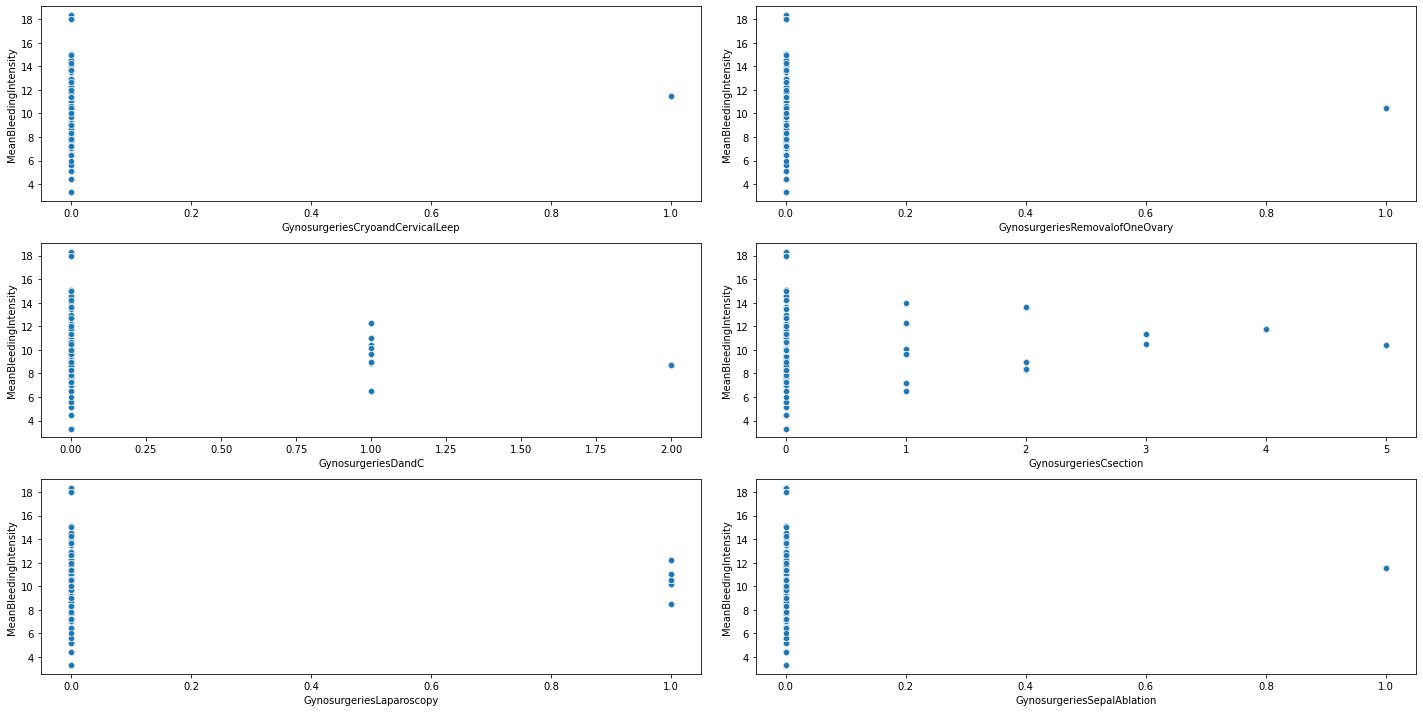

In [159]:
fig, ax = plt.subplots(3,2, figsize=(20,10))
i=0

for j in range(3):
    for k in range(2):
        if i<6:
            sns.scatterplot(y='MeanBleedingIntensity', x=gynosurgeries[i] , data=significant_columns, ax=ax[j][k])
            i=i+1
plt.tight_layout()

In [160]:
menses=['MensesScoreDayOne','MensesScoreDayTwo','MensesScoreDayThree','MensesScoreDayFour','MensesScoreDayFive',
        'MensesScoreDaySix','MensesScoreDaySeven', 'MensesScoreDayEight', 'MensesScoreDayNine', 'MensesScoreDayTen',
        'MensesScoreDay11','MensesScoreDay12','MensesScoreDay13','MensesScoreDay14','MensesScoreDay15']

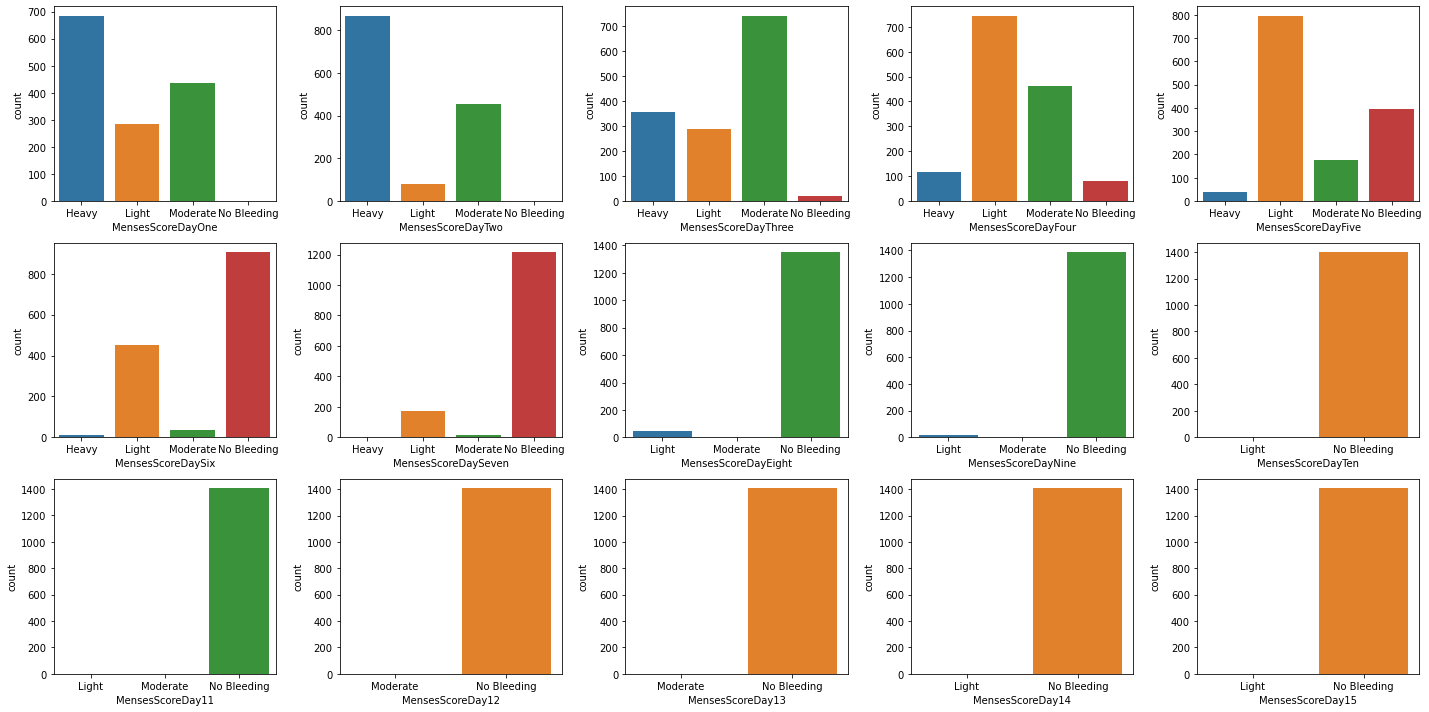

In [161]:
fig, ax = plt.subplots(3,5, figsize=(20,10))
i=0
for j in range(3):
    for k in range(5):
        if i<15:
            sns.countplot(significant_columns[menses[i]], ax=ax[j][k])
            i=i+1
plt.tight_layout()

Mean of Length of Menses: 5.197724039829303
Standard Deviation 1.2775178103730171


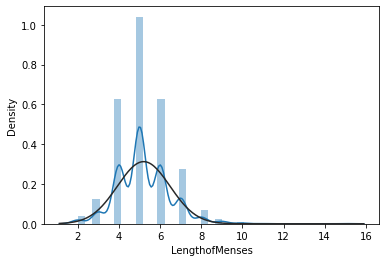

In [162]:
print('Mean of Length of Menses:',significant_columns['LengthofMenses'].mean())
print('Standard Deviation',significant_columns['LengthofMenses'].std())
sns.distplot(significant_columns['LengthofMenses'],fit=stats.norm);

* This is distplot of "Length of Menses", distplot means distribution plot.
* This graph shows that distribution of length od menses is normal.

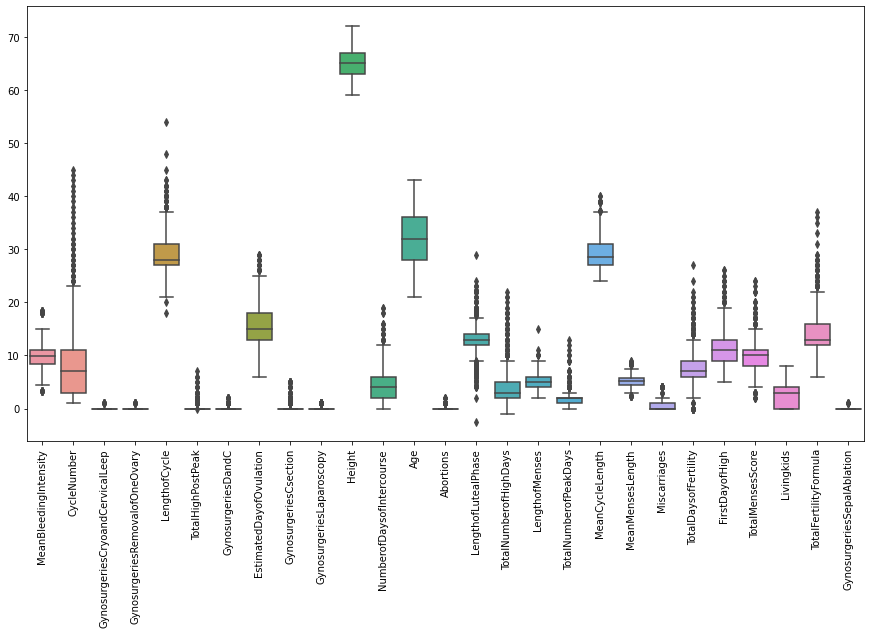

In [163]:
plt.figure(figsize=(15,8))
sns.boxplot(data=significant_columns.drop('Weight', axis=1))
plt.xticks(rotation = 90)
plt.show()

For Weight


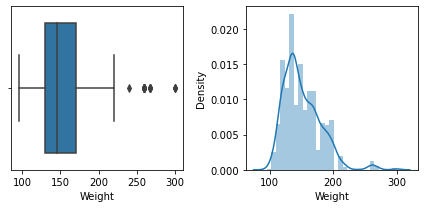

For MeanBleedingIntensity


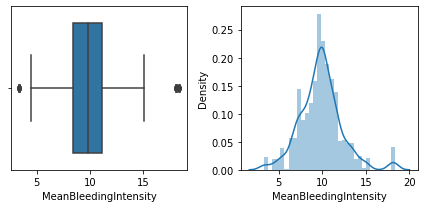

For CycleNumber


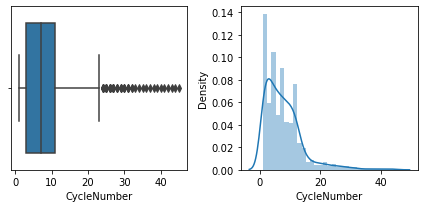

For GynosurgeriesCryoandCervicalLeep


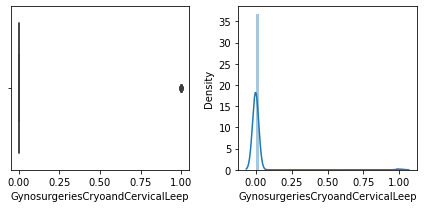

For GynosurgeriesRemovalofOneOvary


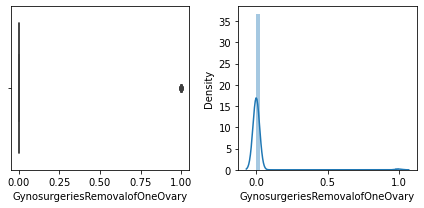

For LengthofCycle


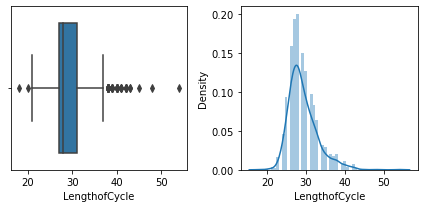

For TotalHighPostPeak


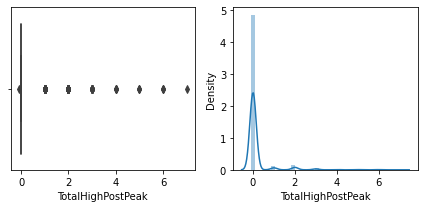

For GynosurgeriesDandC


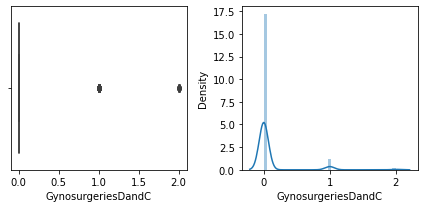

For EstimatedDayofOvulation


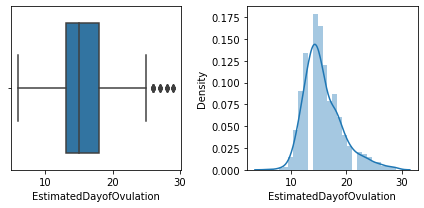

For GynosurgeriesCsection


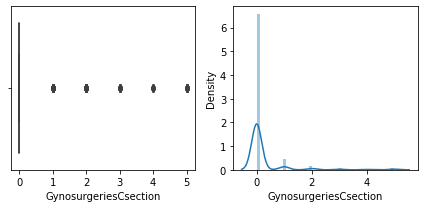

For GynosurgeriesLaparoscopy


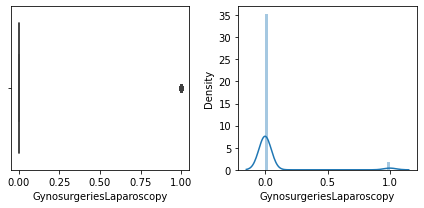

For Height


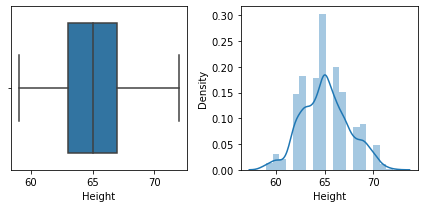

For NumberofDaysofIntercourse


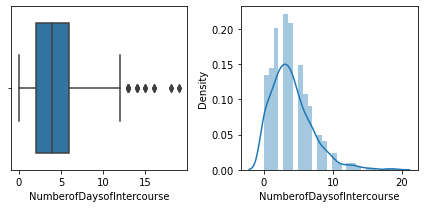

For Age


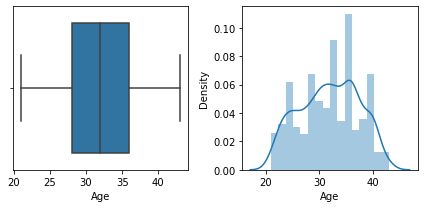

For Abortions


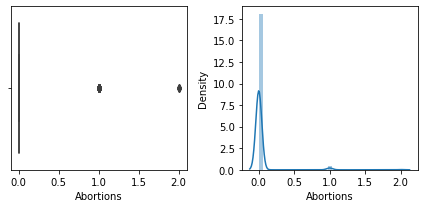

For LengthofLutealPhase


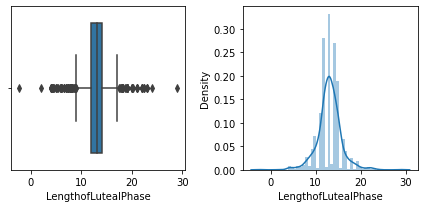

For TotalNumberofHighDays


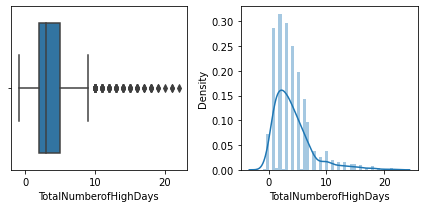

For LengthofMenses


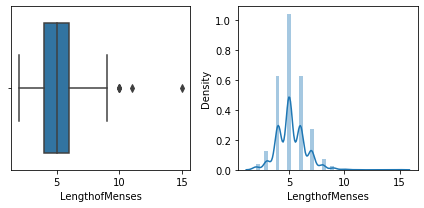

For TotalNumberofPeakDays


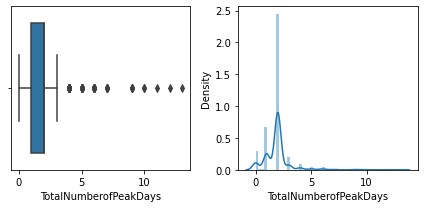

For MeanCycleLength


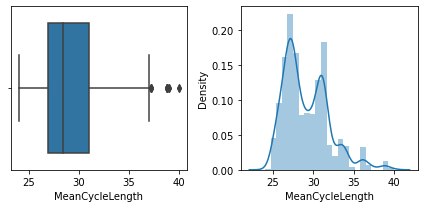

For MeanMensesLength


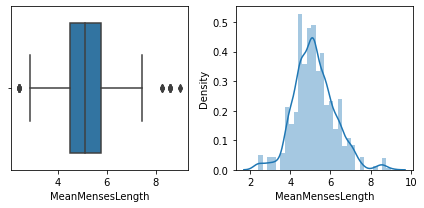

For Miscarriages


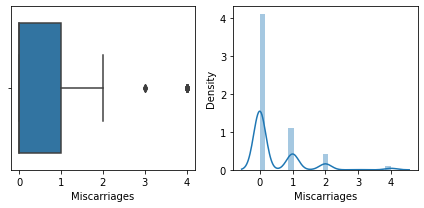

For TotalDaysofFertility


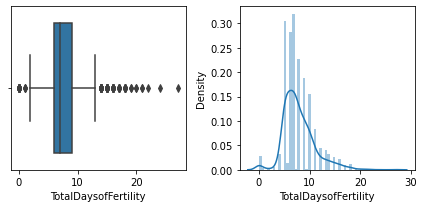

For FirstDayofHigh


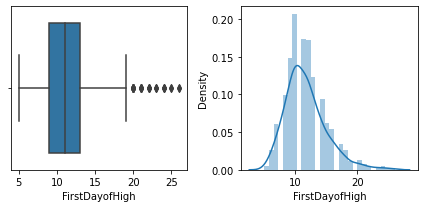

For TotalMensesScore


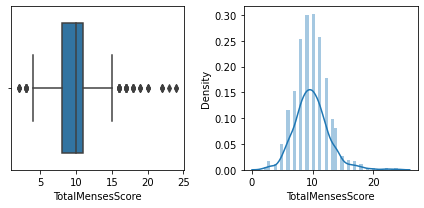

For Livingkids


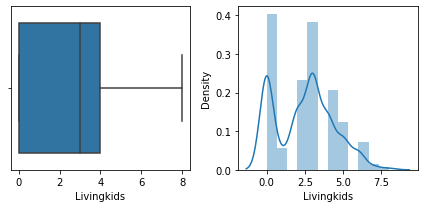

For TotalFertilityFormula


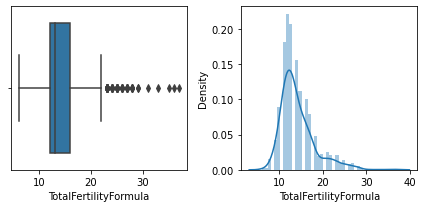

For GynosurgeriesSepalAblation


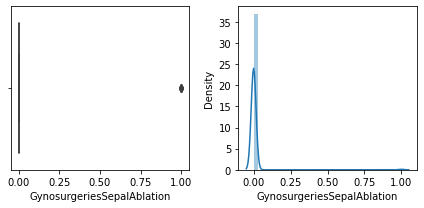

In [164]:
num_columns = significant_columns.select_dtypes(exclude =['object','category']).columns

for i in num_columns : 
    print(f'For {i}')
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    sns.boxplot(significant_columns[i])
    plt.subplot(1,2,2)
    sns.distplot(significant_columns[i])
    plt.tight_layout()
    plt.show()

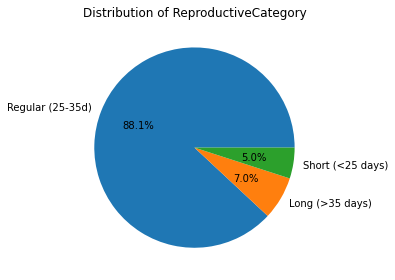

In [165]:
plt.pie(significant_columns['ReproductiveCategory'].value_counts(),labels = significant_columns['ReproductiveCategory'].value_counts().index,autopct='%1.1f%%');
plt.title('Distribution of ReproductiveCategory')
plt.tight_layout()

* This pie plot is showing categories of reproductive category.
* This shows that Our data of reproductive category is biased, which has more participants has regular cycle.

In [166]:
import plotly.graph_objects as go
X = significant_columns['Method'].value_counts()
labels = ['None','NFP','Withdrawal','Abstinence','Barrier','Barrier','Breastfeeding','Other']
fig = go.Figure(data=[go.Pie(labels=labels, values=X)])
fig.show()

* This graph is showing categories of prevention method
* this graph shows that  90.4% NONE prevention method is majorly used.
* 7.81 is using NFP
* other methods used very less number of times.

In [167]:
import plotly.express as px
fig = px.box(x=significant_columns['ReproductiveCategory'], y=significant_columns['Age'])
fig.show()

* This graph shows relationship between "reproductive category" and "age".
* women who have regular cycle has median age 32 and Inter Quartile Range(IQR) is between 28 to 36
* women who have short cycle has median age 33.5 but their InterQuartile Range is large, 29 to 38.
* women who have long cycle has median 31 ,  its whisker is long and InterQuartileRange is 26 to 34.

<Figure size 1080x576 with 0 Axes>

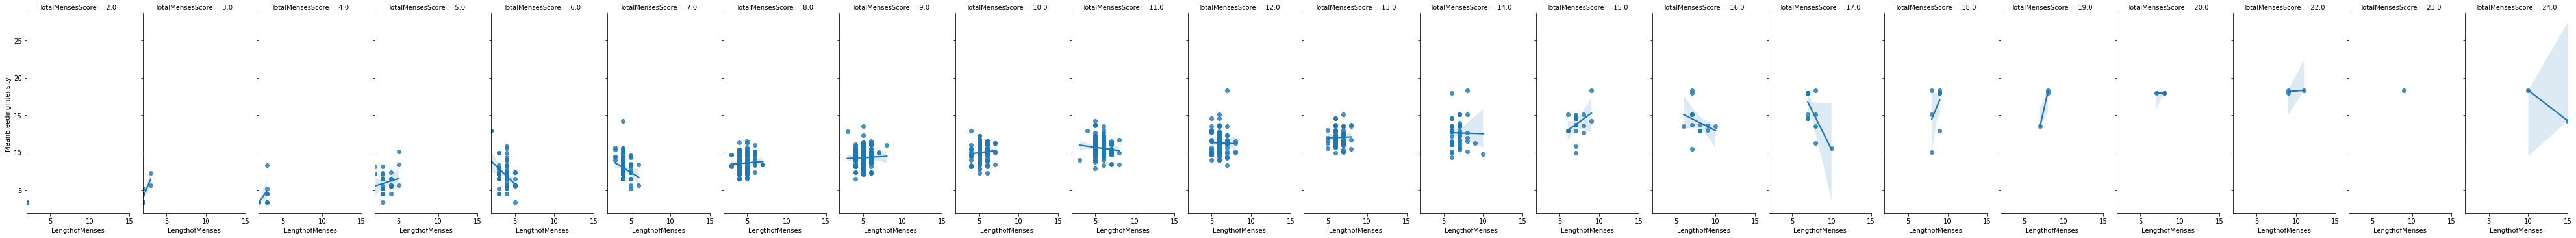

In [168]:
plt.figure(figsize = (15,8))
sns.lmplot(x='LengthofMenses', y='MeanBleedingIntensity',col = 'TotalMensesScore', data=significant_columns,
           aspect = .5);

* When TotalMensesScore is low mean bleeding intensity is also low  and length of menses is between 0 to 5.
* when TotalMensesScore is between 8 to 13 mean bleeding intensity   also increases and length of menses is between 5 to 10.
* when TotalMensesScore is greater than 14 mean bleeding intensity increases and length of menses is between 10 to 15.
 

In [169]:
import plotly.express as px
import statsmodels.formula.api as ols

fig = px.scatter(significant_columns, x="LengthofLutealPhase", y="FirstDayofHigh", trendline = "ols",
                 facet_col="ReproductiveCategory", title="Using update_xaxes() With A Plotly Express Figure")

fig.update_xaxes(showgrid=False)

fig.show()

* Length of luteal Phase and first Day of High is negative correlated.
* When ReproductiveCategory is regular(25-35 days), then average length of luteal phase is 13 days.
* When ReproductiveCategory is short(< 25), then average length of luteal phase is 8 days.
* When ReproductiveCategory is long(> 35), then average length of luteal phase is 20 days.

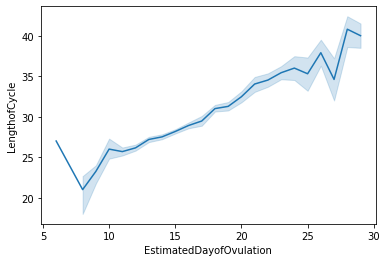

In [170]:
sns.lineplot(x='EstimatedDayofOvulation',y='LengthofCycle', data = significant_columns);

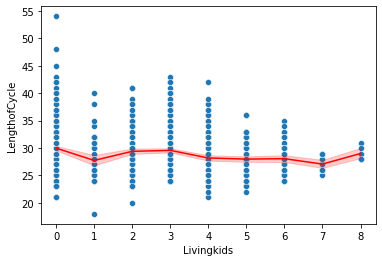

In [171]:
sns.scatterplot(x='Livingkids',y='LengthofCycle', data = significant_columns)
sns.lineplot(x='Livingkids',y='LengthofCycle', data = significant_columns, color='red')
plt.show()

In [172]:
df_copy

ClientID  CycleNumber    Group CycleWithPeakorNot ReproductiveCategory  \
0     nfp8122          1.0  Monitor               Peak     Regular (25-35d)   
1     nfp8122          2.0  Monitor               Peak     Regular (25-35d)   
2     nfp8122          3.0  Monitor               Peak     Regular (25-35d)   
3     nfp8122          4.0  Monitor               Peak     Regular (25-35d)   
4     nfp8122          5.0  Monitor               Peak     Regular (25-35d)   
...       ...          ...      ...                ...                  ...   
1404  nfp8292         12.0    Mucus               Peak     Regular (25-35d)   
1405  nfp8292         13.0    Mucus            No Peak     Regular (25-35d)   
1406  nfp8293          1.0  Monitor               Peak     Regular (25-35d)   
1407  nfp8293          2.0  Monitor               Peak     Regular (25-35d)   
1408  nfp8293          3.0  Monitor               Peak     Regular (25-35d)   

      LengthofCycle  MeanCycleLength  EstimatedDayofOvulation  \
0              29.0        27.330000                     17.0   
1              27.0        27.330000                     15.0   
2              29.0        27.330000                     15.0   
3              27.0        27.330000                     15.0   
4              28.0        27.330000                     16.0   
...             ...              ...                      ...   
1404           31.0        28.538462                     16.0   
1405           29.0        28.538462                      NaN   
1406           29.0        29.000000                     16.0   
1407           31.0        29.000000                     18.0   
1408           27.0        29.000000                     17.0   

      LengthofLutealPhase  FirstDayofHigh  TotalNumberofHighDays  \
0               12.000000            12.0                    5.0   
1               12.000000            13.0                    2.0   
2               14.000000             NaN                    1.0   
3               12.000000            13.0                    2.0   
4               12.000000            12.0                    4.0   
...                   ...             ...                    ...   
1404            15.000000            14.0                    2.0   
1405            13.408968            14.0                    2.0   
1406            13.000000             9.0                    7.0   
1407            13.000000             9.0                    9.0   
1408            10.000000            14.0                    3.0   

      TotalHighPostPeak  TotalNumberofPeakDays  TotalDaysofFertility  \
0                   0.0                    2.0                   9.0   
1                   0.0                    2.0                   6.0   
2                   0.0                    2.0                   5.0   
3                   0.0                    2.0                   6.0   
4                   0.0                    2.0                   8.0   
...                 ...                    ...                   ...   
1404                0.0                    1.0                   6.0   
1405                0.0                    0.0                   5.0   
1406                0.0                    2.0                  11.0   
1407                0.0                    2.0                  13.0   
1408                0.0                    2.0                   7.0   

      TotalFertilityFormula  LengthofMenses  MeanMensesLength  \
0                      15.0             5.0          4.490000   
1                      13.0             5.0          4.490000   
2                      13.0             5.0          4.490000   
3                      13.0             5.0          4.490000   
4                      14.0             5.0          4.490000   
...                     ...             ...               ...   
1404                   15.0             6.0          5.692308   
1405                   16.0             6.0          5.692308   
1406    

<AxesSubplot:xlabel='IntercourseDuringUnusBleed', ylabel='NumberofDaysofIntercourse'>

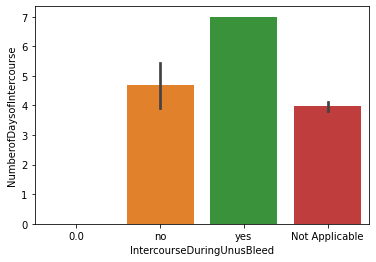

In [173]:
sns.barplot(y='NumberofDaysofIntercourse', x='IntercourseDuringUnusBleed', data=significant_columns )

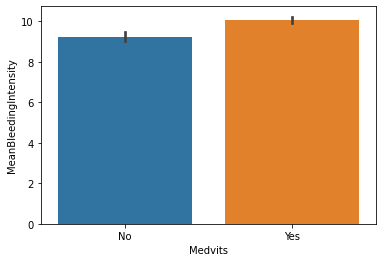

In [174]:
sns.barplot(x='Medvits', y='MeanBleedingIntensity', data=significant_columns);

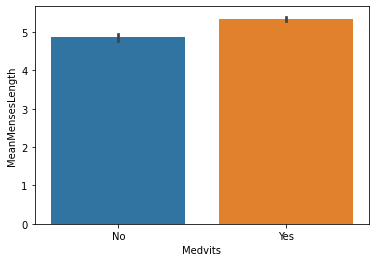

In [175]:
sns.barplot(x='Medvits', y='MeanMensesLength', data=significant_columns);

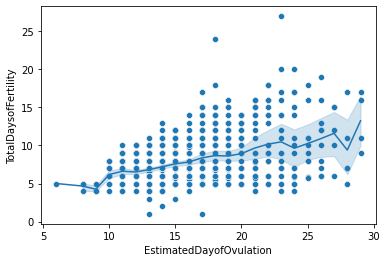

In [176]:
sns.scatterplot(x='EstimatedDayofOvulation', y='TotalDaysofFertility', data=significant_columns)
sns.lineplot(x='EstimatedDayofOvulation', y='TotalDaysofFertility', data=significant_columns)
plt.show()

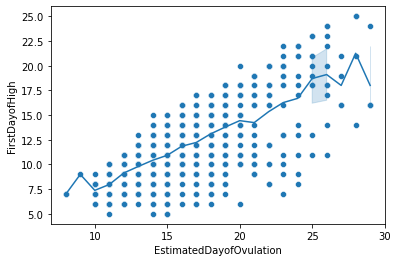

In [177]:
sns.scatterplot(x='EstimatedDayofOvulation', y='FirstDayofHigh', data=significant_columns)
sns.lineplot(x='EstimatedDayofOvulation', y='FirstDayofHigh', data=significant_columns)
plt.show()

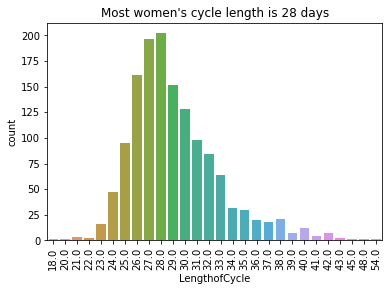

In [178]:
sns.countplot(x='LengthofCycle', data=significant_columns)
plt.xticks(rotation=90)
plt.title('Most women\'s cycle length is 28 days')
plt.show()

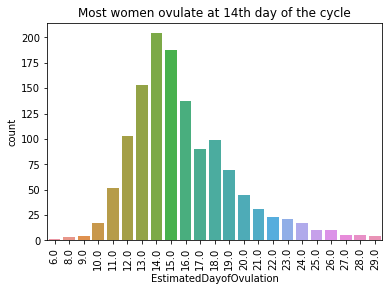

In [179]:
sns.countplot(x='EstimatedDayofOvulation', data=significant_columns)
plt.xticks(rotation=90)
plt.title('Most women ovulate at 14th day of the cycle')
plt.show()

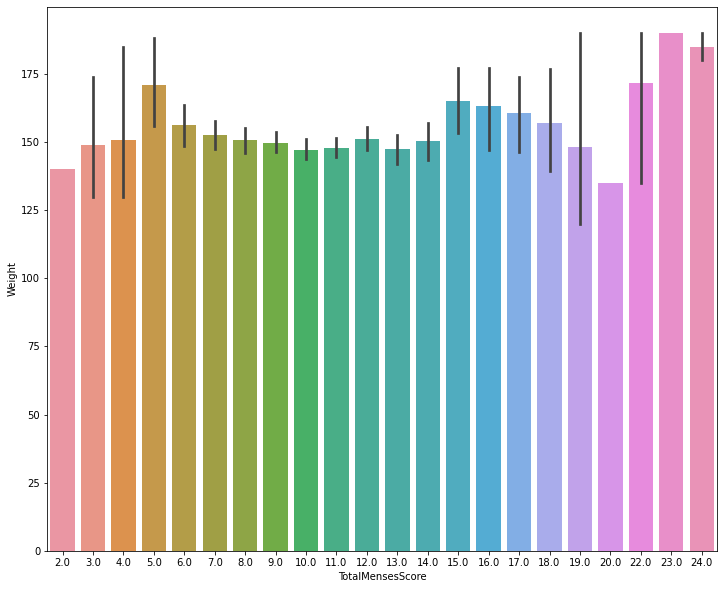

In [180]:
plt.figure(figsize=(12,10))
sns.barplot(significant_columns['TotalMensesScore'], significant_columns['Weight'])
plt.show()

## Find the EstimatedDayofOvulation

### Imputing null values by LinearRegression for EstimatedDayofOvulation

In [181]:
df_signi.FirstDayofHigh.isnull().sum()

211

In [182]:
df_signi.EstimatedDayofOvulation.isnull().sum()

115

In [183]:
imputer=IterativeImputer(random_state=42)
df_imputer_firstday=pd.DataFrame(imputer.fit_transform(df_signi), 
                                    columns=df_signi.columns, index=df_signi.index)
df_imputer_firstday

Weight  MeanBleedingIntensity  CycleNumber  \
0      120.0               9.040000          1.0   
1      120.0               9.040000          2.0   
2      120.0               9.040000          3.0   
3      120.0               9.040000          4.0   
4      120.0               9.040000          5.0   
...      ...                    ...          ...   
1401   150.0              11.384615         12.0   
1402   150.0              11.384615         13.0   
1403   110.0              10.000000          1.0   
1404   110.0              10.000000          2.0   
1405   110.0              10.000000          3.0   

      GynosurgeriesCryoandCervicalLeep  GynosurgeriesRemovalofOneOvary  \
0                                  0.0                             0.0   
1                                  0.0                             0.0   
2                                  0.0                             0.0   
3                                  0.0                             0.0   
4                                  0.0                             0.0   
...                                ...                             ...   
1401                               0.0                             0.0   
1402                               0.0                             0.0   
1403                               0.0                             0.0   
1404                               0.0                             0.0   
1405                               0.0                             0.0   

      LengthofCycle  TotalHighPostPeak  GynosurgeriesDandC  \
0              29.0                0.0                 0.0   
1              27.0                0.0                 0.0   
2              29.0                0.0                 0.0   
3              27.0                0.0                 0.0   
4              28.0                0.0                 0.0   
...             ...                ...                 ...   
1401           31.0                0.0                 0.0   
1402           29.0                0.0                 0.0   
1403           29.0                0.0                 0.0   
1404           31.0                0.0                 0.0   
1405           27.0                0.0                 0.0   

      EstimatedDayofOvulation  GynosurgeriesCsection  \
0                   17.000000                    0.0   
1                   15.000000                    0.0   
2                   15.000000                    0.0   
3                   15.000000                    0.0   
4                   16.000000                    0.0   
...                       ...                    ...   
1401                16.000000                    3.0   
1402                15.554032                    3.0   
1403                16.000000                    0.0   
1404                18.000000                    0.0   
1405                17.000000                    0.0   

      GynosurgeriesLaparoscopy  Height  NumberofDaysofIntercourse   Age  \
0                          0.0    63.0                        5.0  36.0   
1                          0.0    63.0                        6.0  36.0   
2                          0.0    63.0                        5.0  36.0   
3                          0.0    63.0                        3.0  36.0   
4                          0.0    63.0                        5.0  36.0   
...                        ...     ...                        ...   ...   
1401                       0.0    66.0                        0.0  34.0   
1402                       0.0    66.0                        0.0  34.0   
1403                       0.0    63.0                        0.0  23.0   
1404                       0.0    63.0                        2.0  23.0   
1405                       0.0    63.0                        0.0  23.0   

      Abortions  LengthofLutealPhase  TotalNumberofHighDays  LengthofMenses  \
0           0.0            12.000000                    5.0             5.0   
1           0.0

* Imputed null values of first day of high by imputer

In [184]:
df_signi.FirstDayofHigh=np.floor(df_imputer_firstday.FirstDayofHigh)

In [185]:
train_est=df_signi[df_signi.EstimatedDayofOvulation.notnull() & df_signi.FirstDayofHigh.notnull()]

In [186]:
test_est=df_signi[df_signi.EstimatedDayofOvulation.isnull() | df_signi.FirstDayofHigh.isnull()]

In [187]:
test_est.index

Int64Index([  35,   41,   59,   60,   62,   67,   68,   70,  105,  127,
            ...
            1292, 1303, 1306, 1324, 1327, 1341, 1388, 1397, 1400, 1402],
           dtype='int64', length=115)

In [188]:
# replacing the null values of test data of First day of high from imputer
for i in test_est.index:
    test_est.FirstDayofHigh[i]=df_imputer_firstday.FirstDayofHigh[i]
    print(test_est.FirstDayofHigh[i])
test_est.FirstDayofHigh.isnull().sum()

10.0
13.0
19.48028557679409
17.0
14.649948976884884
19.46000365352065
17.0
14.629667053611442
11.0
15.0
12.0
12.0
13.0
17.0
11.0
10.0
7.0
12.0
12.0
9.0
11.0
16.0
14.0
12.0
15.0
28.702407943139093
10.0
16.0
16.0
17.0
12.0
18.0
18.565884569758172
11.0
9.0
10.0
19.22958108857093
15.0
31.75370253277793
28.646663623412053
26.07820381704932
33.62500728458394
10.0
22.27539625709491
8.0
13.96808506584442
6.0
9.0
11.0
9.0
24.0
26.0
11.0
15.0
14.0
27.155061541567044
13.0
17.16357271076695
13.0
13.0
11.0
15.0
11.0
9.0
10.0
15.0
11.0
18.0
20.143689934009572
18.641367146350593
15.0
14.0
15.0
17.320240500767426
8.0
14.94600732034399
16.0
10.0
8.0
8.0
10.0
14.0
12.0
10.0
17.737964660767943
12.0
12.0
22.149668933264643
9.0
11.256102926382967
11.0
9.0
13.0
10.0
19.0
12.0
10.0
14.0
17.0
13.0
11.0
26.0
12.0
11.0
10.0
12.0
10.0
11.0
22.988608271870476
13.0
12.0
23.838084016232607
13.24743025707754
8.0
14.0


0

In [189]:
X_test_est=test_est.drop('EstimatedDayofOvulation',axis=1)

y_test_est=test_est.EstimatedDayofOvulation

X_train_est=train_est.drop(['EstimatedDayofOvulation'],axis=1)
y_train_est=train_est.EstimatedDayofOvulation

X_new_train_est=sma.add_constant(X_train_est)

model_est = sma.OLS(y_train_est,X_new_train_est).fit()

model_est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     EstimatedDayofOvulation   R-squared:                       0.991
Model:                                 OLS   Adj. R-squared:                  0.990
Method:                      Least Squares   F-statistic:                     1460.
Date:                     Thu, 01 Apr 2021   Prob (F-statistic):               0.00
Time:                             10:40:56   Log-Likelihood:                -431.65
No. Observations:                     1291   AIC:                             1039.
Df Residuals:                         1203   BIC:                             1494.
Df Model:                               87                                         
Covariance Type:                 nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -0.9220      1.191     -0.774      0.439      -3.258       1.414
Weight                                       -0.0010      0.000     -2.281      0.023      -0.002      -0.000
MeanBleedingIntensity                         0.0204      0.015      1.351      0.177      -0.009       0.050
CycleNumber                                  -0.0025      0.002     -1.382      0.167      -0.006       0.001
GynosurgeriesCryoandCervicalLeep             -0.0747      0.116     -0.646      0.518      -0.301       0.152
GynosurgeriesRemovalofOneOvary               -0.2452      0.130     -1.886      0.060      -0.500       0.010
LengthofCycle                                 0.7378      0.014     54.035      0.000       0.711       0.765
TotalHighPostPeak                            -0.0554      0.018     -3.057      0.002      -0.091      -0.020
GynosurgeriesDandC                           -0.0089      0.053     -0.167      0.868      -0.113       0.095
GynosurgeriesCsection                        -0.0247      0.019     -1.300      0.194      -0.062       0.013
GynosurgeriesLaparoscopy                     -0.0790      0.054     -1.462      0.144      -0.185       0.027
Height                                        0.0024      0.006      0.426      0.670      -0.008       0.013
NumberofDaysofIntercourse                    -0.0018      0.004     -0.454      0.650      -0.009       0.006
Age                                           0.0044      0.003      1.397      0.163      -0.002       0.010
Abortions                                    -0.0118      0.070     -0.170      0.865      -0.149       0.125
LengthofLutealPhase                          -0.7393      0.013    -56.338      0.000      -0.765      -0.714
TotalNumberofHighDays                         0.0243      0.010      2.515      0.012       0.005       0.043
LengthofMenses                               -0.0165      0.100     -0.164      0.870      -0.213       0.180
TotalNumberofPeakDays                         0.0227      0.015      1.519      0.129      -0.007       0.052
MeanCycleLength                               0.0251      0.007      3.715      0.000       0.012       0.038
MeanMensesLength                             -0.0066      0.033     -0.201      0.841      -0.071       0.058
Miscarriages                                  0.0110      0.020      0.543      0.587      -0.029       0.051
TotalDaysofFertility                          0.1677      0.014     11.982      0.000       0.140       0.195
FirstDayofHigh                                0.2009      0.013     15.914      0.000       0.176       0.226
TotalMensesScore                              0.0454      

In [190]:
X_new_test_est=sma.add_constant(X_test_est,  has_constant='add')
X_new_train_est.shape, X_new_test_est.shape, X_test_est.shape

((1291, 97), (115, 97), (115, 96))

In [191]:
model_est.predict(X_new_test_est) # Estimated day of ovulation predicted values

35      18.199777
41      18.740579
59      17.305395
60      20.635774
62      11.820694
          ...    
1341    15.721423
1388    21.342676
1397    17.204065
1400    11.642524
1402    15.631098
Length: 115, dtype: float64

In [192]:
df_signi[df_signi.EstimatedDayofOvulation.isnull()].index

Int64Index([  35,   41,   59,   60,   62,   67,   68,   70,  105,  127,
            ...
            1292, 1303, 1306, 1324, 1327, 1341, 1388, 1397, 1400, 1402],
           dtype='int64', length=115)

In [193]:
# imputing null values of EstimatedDayofOvulation from Linear model
for i in df_signi[df_signi.EstimatedDayofOvulation.isnull()].index:
    df_signi.EstimatedDayofOvulation[i]=np.floor(model_est.predict(X_new_test_est)[i])
df_signi.EstimatedDayofOvulation.isnull().sum()

0

In [194]:
#significant columns for EstimatedDayofOvulation
model_est.pvalues[model_est.pvalues<0.05]

Weight                                   2.271266e-02
LengthofCycle                            0.000000e+00
TotalHighPostPeak                        2.282207e-03
LengthofLutealPhase                      0.000000e+00
TotalNumberofHighDays                    1.201855e-02
MeanCycleLength                          2.128011e-04
TotalDaysofFertility                     2.480286e-31
FirstDayofHigh                           6.822934e-52
TotalFertilityFormula                    2.402234e-12
ReproductiveCategory_Regular (25-35d)    7.893576e-04
ReproductiveCategory_Short (<25 days)    1.600786e-03
Method_None                              3.545451e-02
Method_Other                             8.132427e-04
Group_Mucus                              7.474986e-03
dtype: float64

## Assumptions for Linear Regression of the target EstimatedDayofOvulation

**Linearity : Rainbow Test**
* H0: Predictors have linear relationship with target column
* H1: Predictors do not have linear relationship with target column

In [195]:
stats, pval=sma.stats.diagnostic.linear_rainbow(model_est) #test stats, pvalue

In [196]:
pval<0.05

True

Inference:
* As P-value< 0.05, we reject the Ho. 
* Hence, Predictors do not have linear relationship with target column

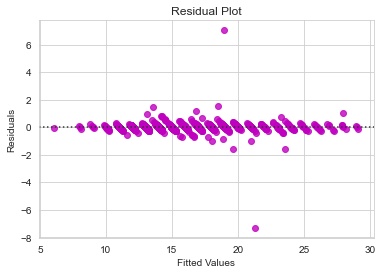

In [197]:
# Residual and Fitted Values
residual = model_est.resid #(Error: Act-Pred)
fitted = model_est.fittedvalues # predicted values

# Plotting the Residuals.
sns.set_style("whitegrid") # theme of the plot

sns.residplot(fitted, residual, color = "m")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

Inference:
   * The plot is not showing random pattern but there is some kind of pattern and hence, 
    there is no linear relationship between target and predictors

**Normality: Shapiro Wilk Test**
* H0: Data is not normal
* H1: Data is normal

In [198]:
import scipy.stats as stats
print(stats.shapiro(model_est.resid)) 
stats.shapiro(df_signi["LengthofCycle"]) 

ShapiroResult(statistic=0.3638845682144165, pvalue=0.0)


ShapiroResult(statistic=0.9213488101959229, pvalue=1.8514140200205426e-26)

* As p-value<0.05, reject H0
* Data is normal

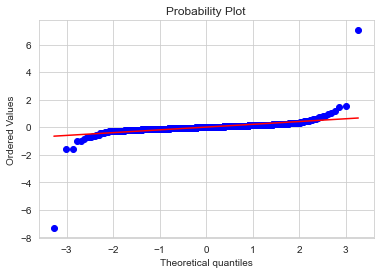

In [199]:
from scipy.stats import probplot

probplot(model_est.resid, plot = plt)
plt.show() 

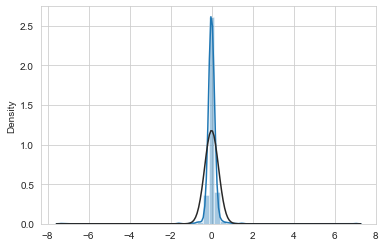

In [200]:
sns.distplot(model_est.resid, fit = stats.norm)
plt.show() 

Inference:
   * Since most of the points are on to the red line hence, the data is normally distributed.
   * If the points deviated from the red line, we can conclude that the data is not normally distributed.

**Multicollinearity**

In [201]:
model_est.condition_number

1.0118290505293514e+16

In [202]:
model_est.condition_number>1000 #High multicollinearity

True

In [203]:
df_signi.count()

Weight                              1406
MeanBleedingIntensity               1406
CycleNumber                         1406
GynosurgeriesCryoandCervicalLeep    1406
GynosurgeriesRemovalofOneOvary      1406
                                    ... 
Prevmethod_NFP                      1406
Prevmethod_None                     1406
Prevmethod_Pill                     1406
Prevmethod_Withdrawl                1406
MensesScoreDayTen_No Bleeding       1406
Length: 97, dtype: int64

In [204]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF is applied on Predictors

x=df_signi.drop('EstimatedDayofOvulation',axis=1)
mylist =[]

for i in range(x.shape[1]):
    mylist.append(variance_inflation_factor(x.values, i)) # values of the data, instance
    

vif=pd.DataFrame({"Features":x.columns, "VIF": mylist}).sort_values(by='VIF',ascending=False)
vif[:60]

Features         VIF
47                  MensesScoreDay11_Moderate         inf
80            MensesScoreDaySeven_No Bleeding         inf
49               MensesScoreDayEight_Moderate         inf
54                MensesScoreDayNine_Moderate         inf
56               MensesScoreDay15_No Bleeding         inf
57              PhasesBleeding_Fertile Window         inf
58                    PhasesBleeding_Postpkow         inf
59                    PhasesBleeding_Prepkofw         inf
60                 PhasesBleeding_No Bleeding         inf
61               MensesScoreDay12_No Bleeding         inf
27               MensesScoreDay13_No Bleeding         inf
76             IntercourseDuringUnusBleed_yes         inf
77  IntercourseDuringUnusBleed_Not Applicable         inf
78                  MensesScoreDaySeven_Light         inf
79               MensesScoreDaySeven_Moderate         inf
75              IntercourseDuringUnusBleed_no         inf
82               MensesScoreDay14_No Bleeding         inf
23                           TotalMensesScore  646.860082
30              MensesScoreDaySix_No Bleeding  256.997821
86             MensesScoreDayFive_No Bleeding  185.759683
16                             LengthofMenses  174.628530
28                    MensesScoreDaySix_Light  151.965614
84                   MensesScoreDayFive_Light  100.533521
44                   MensesScoreDayFour_Light   89.144997
92                            Prevmethod_None   72.919157
65                  MensesScoreDayThree_Light   55.465617
51                    MensesScoreDayOne_Light   52.842606
46             MensesScoreDayFour_No Bleeding   48.683421
91                             Prevmethod_NFP   33.532812
5                               LengthofCycle   27.387837
87                        UnusualBleeding_Yes   26.142738
45                MensesScoreDayFour_Moderate   24.384165
93                            Prevmethod_Pill   23.331368
66               MensesScoreDayThree_Moderate   22.169882
22                             FirstDayofHigh   19.322645
52                 MensesScoreDayOne_Moderate   18.645059
63                 MensesScoreDayTwo_Moderate   18.479508
62                    MensesScoreDayTwo_Light   18.432414
85                MensesScoreDayFive_Moderate   17.396239
21                       TotalDaysofFertility   16.859317
1                       MeanBleedingIntensity   13.879489
67            MensesScoreDayThree_No Bleeding   13.721999
14                        LengthofLutealPhase   13.693854
94                       Prevmethod_Withdrawl   12.178607
29                 MensesScoreDaySix_Moderate   11.966910
19                           MeanMensesLength   11.478755
50            MensesScoreDayEight_No Bleeding    9.287397
88                         Prevmethod_Barrier    8.791937
15                      TotalNumberofHighDays    8.349864
90                             Prevmethod_IUD    7.185162
35                                 Method_NFP    7.087679
55             MensesScoreDayNine_No Bleeding    5.791481
95              MensesScoreDayTen_No Bleeding    4.954922
36                                Method_None    4.590245
25                      TotalFertilityFormula    4.239168
40                    Ethnicity_Euro-American    4.205037
48               MensesScoreDay11_No Bleeding    4.007796
32      ReproductiveCategory_Short (<25 days)    3.820645
31      ReproductiveCategory_Regular (25-35d)    3.817318
38                          Method_Withdrawal    3.621433

In [205]:
vif[vif.VIF>5].shape

(52, 2)

In [206]:
vif[vif.VIF>5] #columns with high multicollinearity

Features         VIF
47                  MensesScoreDay11_Moderate         inf
80            MensesScoreDaySeven_No Bleeding         inf
49               MensesScoreDayEight_Moderate         inf
54                MensesScoreDayNine_Moderate         inf
56               MensesScoreDay15_No Bleeding         inf
57              PhasesBleeding_Fertile Window         inf
58                    PhasesBleeding_Postpkow         inf
59                    PhasesBleeding_Prepkofw         inf
60                 PhasesBleeding_No Bleeding         inf
61               MensesScoreDay12_No Bleeding         inf
27               MensesScoreDay13_No Bleeding         inf
76             IntercourseDuringUnusBleed_yes         inf
77  IntercourseDuringUnusBleed_Not Applicable         inf
78                  MensesScoreDaySeven_Light         inf
79               MensesScoreDaySeven_Moderate         inf
75              IntercourseDuringUnusBleed_no         inf
82               MensesScoreDay14_No Bleeding         inf
23                           TotalMensesScore  646.860082
30              MensesScoreDaySix_No Bleeding  256.997821
86             MensesScoreDayFive_No Bleeding  185.759683
16                             LengthofMenses  174.628530
28                    MensesScoreDaySix_Light  151.965614
84                   MensesScoreDayFive_Light  100.533521
44                   MensesScoreDayFour_Light   89.144997
92                            Prevmethod_None   72.919157
65                  MensesScoreDayThree_Light   55.465617
51                    MensesScoreDayOne_Light   52.842606
46             MensesScoreDayFour_No Bleeding   48.683421
91                             Prevmethod_NFP   33.532812
5                               LengthofCycle   27.387837
87                        UnusualBleeding_Yes   26.142738
45                MensesScoreDayFour_Moderate   24.384165
93                            Prevmethod_Pill   23.331368
66               MensesScoreDayThree_Moderate   22.169882
22                             FirstDayofHigh   19.322645
52                 MensesScoreDayOne_Moderate   18.645059
63                 MensesScoreDayTwo_Moderate   18.479508
62                    MensesScoreDayTwo_Light   18.432414
85                MensesScoreDayFive_Moderate   17.396239
21                       TotalDaysofFertility   16.859317
1                       MeanBleedingIntensity   13.879489
67            MensesScoreDayThree_No Bleeding   13.721999
14                        LengthofLutealPhase   13.693854
94                       Prevmethod_Withdrawl   12.178607
29                 MensesScoreDaySix_Moderate   11.966910
19                           MeanMensesLength   11.478755
50            MensesScoreDayEight_No Bleeding    9.287397
88                         Prevmethod_Barrier    8.791937
15                      TotalNumberofHighDays    8.349864
90                             Prevmethod_IUD    7.185162
35                                 Method_NFP    7.087679
55             MensesScoreDayNine_No Bleeding    5.791481

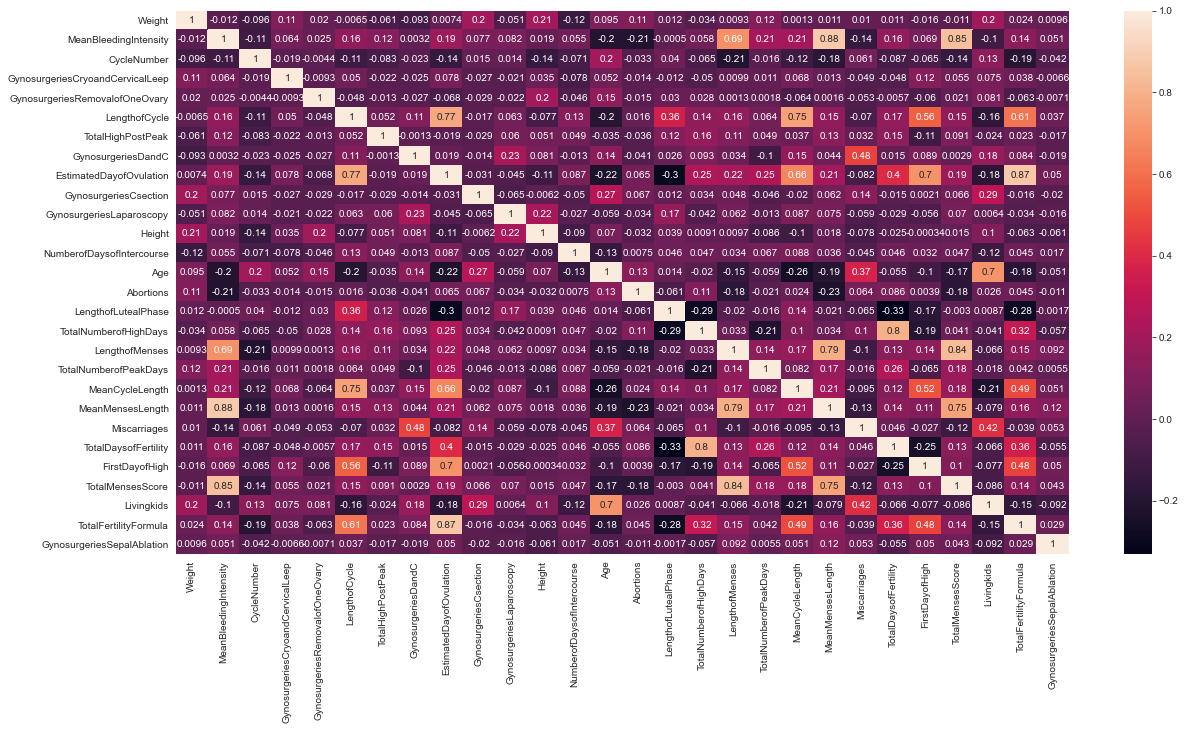

In [207]:
plt.figure(figsize=(20,10))
sns.heatmap(significant_columns.corr(),annot=True);

**Autocorrelation: Durbin Watson**
* Ho: No Autocorrelation in errors/residuals
* H1: Autocorrelation in errors/residuals exist.

In [208]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(model_est.resid)

1.8807542859654744

Inference:
   * Since it is between 1.5 - 2.5, we fail to reject the H0.
   * There are errors/residuals in autocorrelations

**Heteroskedasticity**
* H0: Errors are Homoskedastic (Uniform Variance) & is not Heteroskedastic(Uneven Variance)
* H1: Errors aren't Homoskedastic(Uniform Variance) & is Heteroskedastic(Uneven Variance)    

In [209]:
model_est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     EstimatedDayofOvulation   R-squared:                       0.991
Model:                                 OLS   Adj. R-squared:                  0.990
Method:                      Least Squares   F-statistic:                     1460.
Date:                     Thu, 01 Apr 2021   Prob (F-statistic):               0.00
Time:                             10:41:46   Log-Likelihood:                -431.65
No. Observations:                     1291   AIC:                             1039.
Df Residuals:                         1203   BIC:                             1494.
Df Model:                               87                                         
Covariance Type:                 nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -0.9220      1.191     -0.774      0.439      -3.258       1.414
Weight                                       -0.0010      0.000     -2.281      0.023      -0.002      -0.000
MeanBleedingIntensity                         0.0204      0.015      1.351      0.177      -0.009       0.050
CycleNumber                                  -0.0025      0.002     -1.382      0.167      -0.006       0.001
GynosurgeriesCryoandCervicalLeep             -0.0747      0.116     -0.646      0.518      -0.301       0.152
GynosurgeriesRemovalofOneOvary               -0.2452      0.130     -1.886      0.060      -0.500       0.010
LengthofCycle                                 0.7378      0.014     54.035      0.000       0.711       0.765
TotalHighPostPeak                            -0.0554      0.018     -3.057      0.002      -0.091      -0.020
GynosurgeriesDandC                           -0.0089      0.053     -0.167      0.868      -0.113       0.095
GynosurgeriesCsection                        -0.0247      0.019     -1.300      0.194      -0.062       0.013
GynosurgeriesLaparoscopy                     -0.0790      0.054     -1.462      0.144      -0.185       0.027
Height                                        0.0024      0.006      0.426      0.670      -0.008       0.013
NumberofDaysofIntercourse                    -0.0018      0.004     -0.454      0.650      -0.009       0.006
Age                                           0.0044      0.003      1.397      0.163      -0.002       0.010
Abortions                                    -0.0118      0.070     -0.170      0.865      -0.149       0.125
LengthofLutealPhase                          -0.7393      0.013    -56.338      0.000      -0.765      -0.714
TotalNumberofHighDays                         0.0243      0.010      2.515      0.012       0.005       0.043
LengthofMenses                               -0.0165      0.100     -0.164      0.870      -0.213       0.180
TotalNumberofPeakDays                         0.0227      0.015      1.519      0.129      -0.007       0.052
MeanCycleLength                               0.0251      0.007      3.715      0.000       0.012       0.038
MeanMensesLength                             -0.0066      0.033     -0.201      0.841      -0.071       0.058
Miscarriages                                  0.0110      0.020      0.543      0.587      -0.029       0.051
TotalDaysofFertility                          0.1677      0.014     11.982      0.000       0.140       0.195
FirstDayofHigh                                0.2009      0.013     15.914      0.000       0.176       0.226
TotalMensesScore                              0.0454      

In [210]:
import statsmodels.stats.api as ssa

predictors = X_train_est

# residuals, predictors:: endog, exhog
# Generate 04 statistic - Test Stat of BP, PValue(BP), Ftest & Pvalue(Ftest)
teststats, pvalue, ftest, f_pvalue = ssa.het_breuschpagan(model_est.resid, sma.add_constant(predictors) )
print(pvalue)

0.9999978410754079


In [211]:
pvalue<0.05

False

Inference:
* We fail to reject the null hypothesis as the pvalue > 0.05
* There is uniform variance in the data points which means the data is homoskedastic

Conclusion for Linear Assumptions:
   * Predictors and Target is not linear
   * Data is normally distributed
   * High multicollinearity is present
   * There is autocorrelation in residuals
   * Errors are Homoskedastic
   
  **Hence, we conclude that Linear Regression is not a good fit for our dataset**
  **But maybe after working on the assumptions we can select Linear Regression**

### Removing multicollinearity for EstimatedDayofOvulation

In [212]:
vif[vif.VIF>5]

Features         VIF
47                  MensesScoreDay11_Moderate         inf
80            MensesScoreDaySeven_No Bleeding         inf
49               MensesScoreDayEight_Moderate         inf
54                MensesScoreDayNine_Moderate         inf
56               MensesScoreDay15_No Bleeding         inf
57              PhasesBleeding_Fertile Window         inf
58                    PhasesBleeding_Postpkow         inf
59                    PhasesBleeding_Prepkofw         inf
60                 PhasesBleeding_No Bleeding         inf
61               MensesScoreDay12_No Bleeding         inf
27               MensesScoreDay13_No Bleeding         inf
76             IntercourseDuringUnusBleed_yes         inf
77  IntercourseDuringUnusBleed_Not Applicable         inf
78                  MensesScoreDaySeven_Light         inf
79               MensesScoreDaySeven_Moderate         inf
75              IntercourseDuringUnusBleed_no         inf
82               MensesScoreDay14_No Bleeding         inf
23                           TotalMensesScore  646.860082
30              MensesScoreDaySix_No Bleeding  256.997821
86             MensesScoreDayFive_No Bleeding  185.759683
16                             LengthofMenses  174.628530
28                    MensesScoreDaySix_Light  151.965614
84                   MensesScoreDayFive_Light  100.533521
44                   MensesScoreDayFour_Light   89.144997
92                            Prevmethod_None   72.919157
65                  MensesScoreDayThree_Light   55.465617
51                    MensesScoreDayOne_Light   52.842606
46             MensesScoreDayFour_No Bleeding   48.683421
91                             Prevmethod_NFP   33.532812
5                               LengthofCycle   27.387837
87                        UnusualBleeding_Yes   26.142738
45                MensesScoreDayFour_Moderate   24.384165
93                            Prevmethod_Pill   23.331368
66               MensesScoreDayThree_Moderate   22.169882
22                             FirstDayofHigh   19.322645
52                 MensesScoreDayOne_Moderate   18.645059
63                 MensesScoreDayTwo_Moderate   18.479508
62                    MensesScoreDayTwo_Light   18.432414
85                MensesScoreDayFive_Moderate   17.396239
21                       TotalDaysofFertility   16.859317
1                       MeanBleedingIntensity   13.879489
67            MensesScoreDayThree_No Bleeding   13.721999
14                        LengthofLutealPhase   13.693854
94                       Prevmethod_Withdrawl   12.178607
29                 MensesScoreDaySix_Moderate   11.966910
19                           MeanMensesLength   11.478755
50            MensesScoreDayEight_No Bleeding    9.287397
88                         Prevmethod_Barrier    8.791937
15                      TotalNumberofHighDays    8.349864
90                             Prevmethod_IUD    7.185162
35                                 Method_NFP    7.087679
55             MensesScoreDayNine_No Bleeding    5.791481

In [213]:
vif[vif.VIF>5].Features.values

array(['MensesScoreDay11_Moderate', 'MensesScoreDaySeven_No Bleeding',
       'MensesScoreDayEight_Moderate', 'MensesScoreDayNine_Moderate',
       'MensesScoreDay15_No Bleeding', 'PhasesBleeding_Fertile Window',
       'PhasesBleeding_Postpkow', 'PhasesBleeding_Prepkofw',
       'PhasesBleeding_No Bleeding', 'MensesScoreDay12_No Bleeding',
       'MensesScoreDay13_No Bleeding', 'IntercourseDuringUnusBleed_yes',
       'IntercourseDuringUnusBleed_Not Applicable',
       'MensesScoreDaySeven_Light', 'MensesScoreDaySeven_Moderate',
       'IntercourseDuringUnusBleed_no', 'MensesScoreDay14_No Bleeding',
       'TotalMensesScore', 'MensesScoreDaySix_No Bleeding',
       'MensesScoreDayFive_No Bleeding', 'LengthofMenses',
       'MensesScoreDaySix_Light', 'MensesScoreDayFive_Light',
       'MensesScoreDayFour_Light', 'Prevmethod_None',
       'MensesScoreDayThree_Light', 'MensesScoreDayOne_Light',
       'MensesScoreDayFour_No Bleeding', 'Prevmethod_NFP',
       'LengthofCycle', 'UnusualBle

* As highly multicollinear columns, dropping them

In [214]:
df_vifest=df_signi.drop(vif[vif.VIF>5].Features.values, axis=1)
df_vifest.shape

(1406, 45)

### Train Test Split

In [215]:
X=df_vifest.drop('EstimatedDayofOvulation', axis=1)
y=df_vifest.EstimatedDayofOvulation
xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.3, random_state=42)

xtrain.shape, ytest.shape

((984, 44), (422,))

In [216]:
# Rerun the model to test the scores and fitting
x_const=sma.add_constant(xtrain)
model_vif=sma.OLS(ytrain, x_const).fit()
model_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     EstimatedDayofOvulation   R-squared:                       0.814
Model:                                 OLS   Adj. R-squared:                  0.805
Method:                      Least Squares   F-statistic:                     97.81
Date:                     Thu, 01 Apr 2021   Prob (F-statistic):          1.56e-310
Time:                             10:41:47   Log-Likelihood:                -1878.7
No. Observations:                      984   AIC:                             3843.
Df Residuals:                          941   BIC:                             4054.
Df Model:                               42                                         
Covariance Type:                 nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.3343      2.832     -0.471      0.638      -6.891       4.223
Weight                                   -0.0043      0.002     -1.967      0.049      -0.009   -9.58e-06
CycleNumber                              -0.0036      0.009     -0.384      0.701      -0.022       0.015
GynosurgeriesCryoandCervicalLeep          0.0671      0.560      0.120      0.905      -1.032       1.167
GynosurgeriesRemovalofOneOvary           -0.0073      0.727     -0.010      0.992      -1.435       1.420
TotalHighPostPeak                        -0.2571      0.092     -2.800      0.005      -0.437      -0.077
GynosurgeriesDandC                       -0.4302      0.237     -1.813      0.070      -0.896       0.035
GynosurgeriesCsection                     0.1443      0.086      1.676      0.094      -0.025       0.313
GynosurgeriesLaparoscopy                 -0.6613      0.294     -2.247      0.025      -1.239      -0.084
Height                                    0.0352      0.027      1.290      0.197      -0.018       0.089
NumberofDaysofIntercourse                 0.0217      0.021      1.045      0.296      -0.019       0.062
Age                                      -0.0126      0.016     -0.764      0.445      -0.045       0.020
Abortions                                 0.3539      0.346      1.022      0.307      -0.325       1.033
TotalNumberofPeakDays                     0.0509      0.052      0.976      0.330      -0.051       0.153
MeanCycleLength                           0.4038      0.026     15.401      0.000       0.352       0.455
Miscarriages                              0.1551      0.099      1.566      0.118      -0.039       0.350
Livingkids                                0.0005      0.047      0.011      0.991      -0.092       0.093
TotalFertilityFormula                     0.5868      0.020     29.951      0.000       0.548       0.625
GynosurgeriesSepalAblation                0.2101      0.800      0.263      0.793      -1.360       1.780
ReproductiveCategory_Regular (25-35d)    -1.8808      0.252     -7.470      0.000      -2.375      -1.387
ReproductiveCategory_Short (<25 days)    -2.7737      0.377     -7.348      0.000      -3.514      -2.033
Method_Barrier                           -0.5419      0.337     -1.607      0.108      -1.204       0.120
Method_Breastfeeding                     -0.9422      0.624     -1.509      0.132      -2.168       0.283
Method_None                              -1.2794      0.255     -5.015      0.000      -1.780      -0.779
Method_Other                              1.5161      0.535      2.834      0.005       0.466       2.566
Method_Withdrawal                        -0.6304      0.362 

In [217]:
pred_y_vif=model_vif.predict(sma.add_constant(xtest,has_constant='add'))
pred_y_vif

1075    13.763169
1015    18.467672
650     21.236911
447     16.712392
1290    15.281135
          ...    
178     16.390675
287      9.807614
1355    12.715135
1168    19.109852
294     15.334860
Length: 422, dtype: float64

In [218]:
# if train error < test error -> Overfitting
print('Train RMSE: ',np.sqrt(metrics.mean_squared_error(ytrain,
                            model_vif.predict(sma.add_constant(xtrain)))))
print('Test RMSE: ', np.sqrt(metrics.mean_squared_error(ytest,pred_y_vif)))

Train RMSE:  1.6328228731364025
Test RMSE:  1.738812973433228


* Since train RMSE < test RMSE , so our model is Overfitting

## Regularisation for EstimatedDayofOvulation

In [219]:
model_ridge_est=Ridge(alpha=2, normalize=True)
model_ridge_est.fit(xtrain, ytrain)
model_ridge_est.coef_

array([-2.44297109e-05, -1.73925470e-02,  5.53939120e-01, -2.87524460e-01,
       -8.06986654e-02,  1.29683008e-01,  2.40051029e-02, -3.44456825e-01,
       -2.78722296e-02,  1.98854471e-02, -2.33409275e-02,  4.20905975e-01,
        9.40973066e-02,  2.22241583e-01,  3.77059725e-03, -4.72169805e-02,
        1.99551261e-01,  3.27535155e-01, -8.15036005e-01, -1.13003137e+00,
       -3.86646128e-01, -3.85872293e-01, -4.30532858e-01,  5.34342904e-01,
       -1.85004920e-01, -1.98889697e-01, -1.85226723e-01, -2.09756422e-01,
       -3.60227118e-03, -8.13202500e-02, -1.63904071e+00,  0.00000000e+00,
        0.00000000e+00, -2.63018258e-01,  1.67529567e-02,  1.62819193e-01,
       -5.23373787e-01,  4.57434185e-01, -4.03012208e-01, -5.86186922e-01,
        1.38720039e-01, -3.81257350e-02,  5.59814833e-01, -5.22712140e-01])

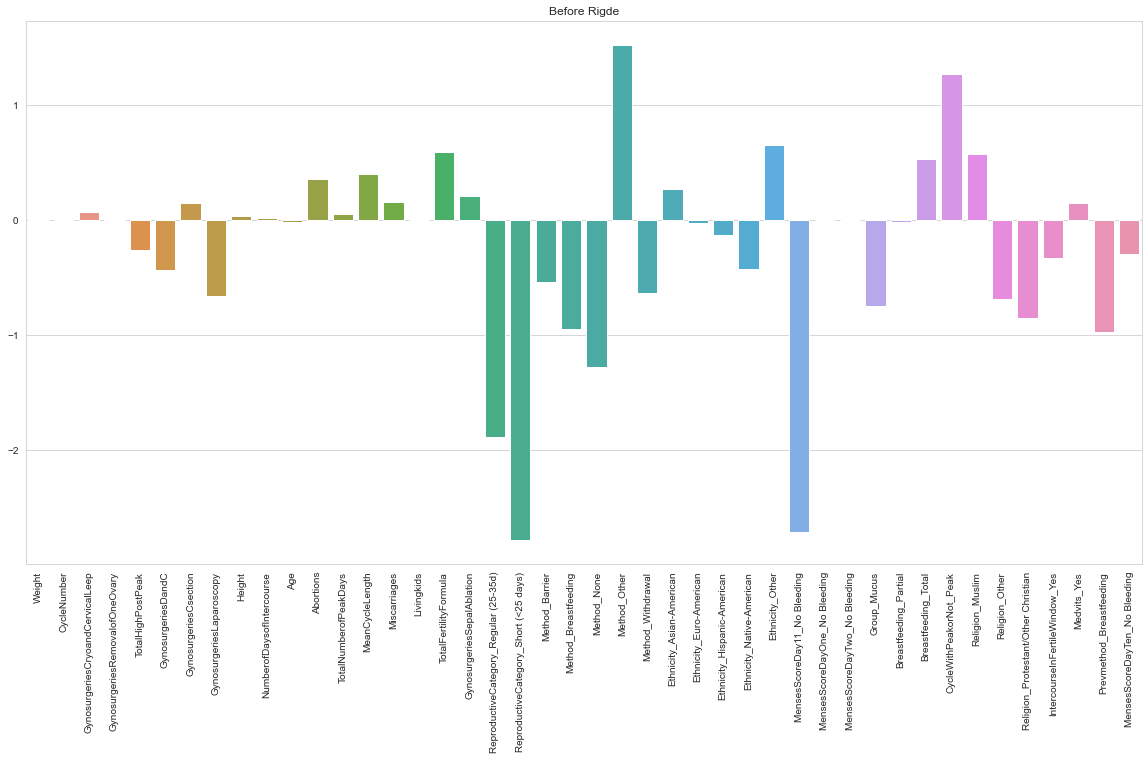

In [220]:
plt.figure(figsize=(20,10))
sns.barplot(x=xtrain.columns, y=model_vif.params[1:])
plt.title('Before Rigde')
plt.xticks(rotation=90)
plt.show()

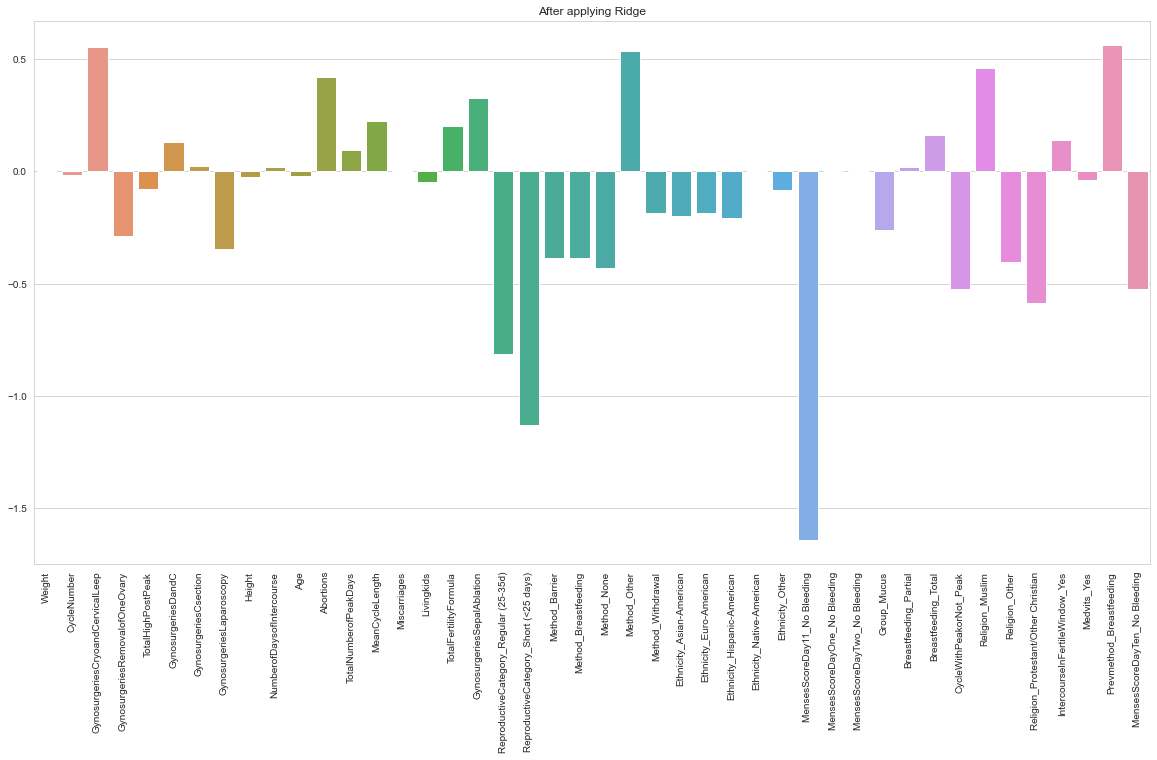

In [221]:
plt.figure(figsize=(20,10))
sns.barplot(x=xtrain.columns, y=model_ridge_est.coef_)
plt.xticks(rotation=90)
plt.title('After applying Ridge')
plt.show()

In [222]:
# if train error < test error -> Overfitting
print('Train RMSE: ',np.sqrt(metrics.mean_squared_error(ytrain,
                            model_ridge_est.predict(xtrain))))
print('Test RMSE: ', np.sqrt(metrics.mean_squared_error(ytest,model_ridge_est.predict(xtest))))

Train RMSE:  2.479904165675594
Test RMSE:  2.425439563870505


* As train error > test error, so we should rebuild our model and try to reduce the RMSE score as much as possible

In [223]:
metrics.r2_score(ytest, model_ridge_est.predict(xtest))

0.5399724361180339

# PCA

### PCA on df_signi

In [224]:
df_n = df_signi.drop('EstimatedDayofOvulation',1)

In [225]:
df_n.shape

(1406, 96)

In [226]:
from sklearn.decomposition import PCA
pca=PCA()
df_pca=pca.fit_transform(df_n)

In [227]:
print('The Eigen Values are')
print(pca.explained_variance_)

The Eigen Values are
[8.74938999e+02 5.22647172e+01 3.26631810e+01 2.57681735e+01
 2.29542248e+01 1.41475076e+01 1.10428101e+01 8.46472915e+00
 5.47512852e+00 4.20729715e+00 3.14050189e+00 2.12621541e+00
 1.70806465e+00 1.18460341e+00 7.67129118e-01 5.78175175e-01
 5.56957464e-01 4.46421769e-01 4.18432027e-01 3.75228235e-01
 3.42930303e-01 2.60323691e-01 2.45409452e-01 2.19273485e-01
 1.97646715e-01 1.90098201e-01 1.77806411e-01 1.72730484e-01
 1.60719669e-01 1.50004400e-01 1.33485082e-01 1.23921142e-01
 1.09145832e-01 1.04727044e-01 9.91357649e-02 8.50347539e-02
 7.47259321e-02 7.30697953e-02 6.45477293e-02 5.99955596e-02
 5.12730959e-02 4.93314506e-02 3.90173712e-02 3.71709364e-02
 3.59310081e-02 3.42086803e-02 3.11507883e-02 2.59906342e-02
 2.51163921e-02 2.34089814e-02 2.09640656e-02 1.82763902e-02
 1.62092417e-02 1.56209747e-02 1.49112613e-02 1.31511546e-02
 1.22288562e-02 1.10630307e-02 1.02796240e-02 9.79647021e-03
 9.58057552e-03 8.26411233e-03 7.75718802e-03 7.24762888e-03
 7.

In [228]:
tot=sum(pca.explained_variance_)
var_exp=[(i/tot)*100 for i in sorted(pca.explained_variance_,reverse=True)]
cum_var_exp=np.cumsum(var_exp)
print(f'Cumulative Variance Explained are\n{cum_var_exp}')

Cumulative Variance Explained are
[ 82.0099615   86.90884868  89.97044066  92.38574838  94.53729848
  95.86337557  96.89844251  97.69186024  98.20505611  98.59941535
  98.89378151  99.09307637  99.25317704  99.36421253  99.43611723
  99.49031086  99.54251571  99.58435981  99.62358037  99.65875134
  99.69089495  99.71529566  99.73829843  99.75885142  99.77737728
  99.79519561  99.81186179  99.8280522   99.84311681  99.85717705
  99.86968891  99.88130431  99.89153479  99.90135108  99.9106433
  99.91861379  99.92561802  99.93246701  99.93851721  99.94414073
  99.94894667  99.95357062  99.9572278   99.96071191  99.96407981
  99.96728626  99.97020609  99.97264225  99.97499647  99.97719064
  99.97915565  99.98086874  99.98238807  99.98385225  99.98524992
  99.98648261  99.98762884  99.98866581  99.98962934  99.99054758
  99.99144559  99.9922202   99.9929473   99.99362664  99.99428794
  99.994919    99.99549831  99.99605978  99.99656058  99.9970307
  99.99748212  99.99784351  99.9981634   99.

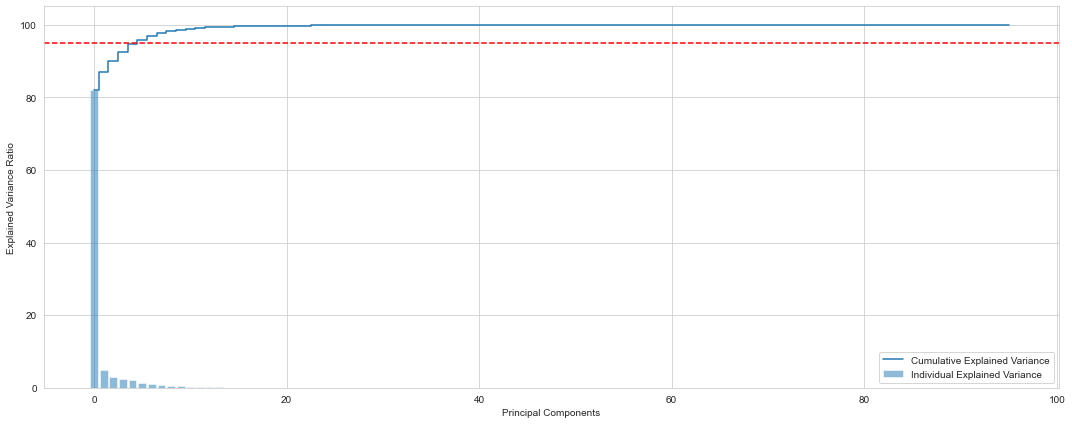

In [229]:
plt.figure(figsize=(15,6))
plt.bar(range(df_pca.shape[1]), var_exp,alpha=0.5,align='center',label='Individual Explained Variance')
plt.step(range(df_pca.shape[1]),cum_var_exp,where='mid',label='Cumulative Explained Variance')
plt.axhline(95,color='r',ls='--')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [230]:
#building with 95% PCA components which will be further considered for model building
pca2=PCA(0.95)
df_pca_update=pca2.fit_transform(df_n)
print(df_pca_update.shape)

(1406, 6)


In [231]:
pca_cols=['PCA'+str(i) for i in range(1,df_pca_update.shape[1]+1)]
df_pca_update1=pd.DataFrame(df_pca_update,columns=pca_cols)
df_pca_update1.head(10)

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6
0 -30.792110 -2.589927 -6.282371  5.651865 -1.068640 -0.730904
1 -30.826286 -0.399357 -6.843319  2.839554 -4.442505 -0.219044
2 -30.831955  0.005487 -5.391672  2.463083 -6.103046  0.352362
3 -30.831301  0.887012 -5.465914  2.524561 -3.932039  1.295278
4 -30.879216  0.713545 -4.263002  3.819330 -1.235140  0.465890
5 -30.884760  2.661188 -5.415766  3.278465  1.291592 -0.288878
6 -30.937484  2.704915 -2.604331  1.565963 -5.636403  0.485186
7 -30.941380  5.861727 -6.211677  1.356550  2.325012 -0.874929
8 -30.948940  3.568857 -2.704670  3.983500  4.182349  1.865556
9 -30.988692  3.967077 -0.493267  3.166190 -0.595483 -0.280222

In [232]:
df_pca_update2=pd.DataFrame(pca2.components_,index=pca_cols,columns=df_n.columns)
df_pca_update2

Weight  MeanBleedingIntensity  CycleNumber  \
PCA1  0.999228              -0.001032    -0.021479   
PCA2  0.002947              -0.104211     0.661824   
PCA3  0.021558               0.043342     0.694514   
PCA4 -0.020612              -0.028167    -0.175228   
PCA5  0.009625               0.084557     0.191406   
PCA6 -0.002802               0.545794     0.054118   

      GynosurgeriesCryoandCervicalLeep  GynosurgeriesRemovalofOneOvary  \
PCA1                          0.000333                        0.000071   
PCA2                         -0.000210                        0.001105   
PCA3                          0.000591                       -0.001501   
PCA4                          0.000981                        0.001884   
PCA5                         -0.001642                       -0.000226   
PCA6                          0.001406                        0.001917   

      LengthofCycle  TotalHighPostPeak  GynosurgeriesDandC  \
PCA1      -0.000907          -0.001334           -0.000943   
PCA2      -0.283760          -0.008275           -0.000617   
PCA3       0.395551          -0.006795            0.001459   
PCA4       0.228954           0.005989            0.013457   
PCA5      -0.163379           0.018434           -0.003891   
PCA6       0.049806           0.018870            0.002366   

      GynosurgeriesCsection  GynosurgeriesLaparoscopy    Height  \
PCA1               0.005301                 -0.000369  0.017044   
PCA2               0.012712                 -0.000703 -0.005338   
PCA3              -0.004073                  0.000890 -0.086297   
PCA4               0.033109                 -0.002583  0.016088   
PCA5              -0.008678                 -0.001282 -0.013576   
PCA6               0.029451                  0.006242  0.033962   

      NumberofDaysofIntercourse       Age  Abortions  LengthofLutealPhase  \
PCA1                  -0.012739  0.018211   0.000697             0.001094   
PCA2                  -0.071330  0.469012   0.000723             0.022921   
PCA3                   0.023590 -0.197182  -0.000814             0.020643   
PCA4                  -0.030407  0.764339   0.005664            -0.087845   
PCA5                   0.012561 -0.240066   0.000925            -0.205649   
PCA6                   0.013593  0.156395  -0.009521             0.160301   

      TotalNumberofHighDays  LengthofMenses  TotalNumberofPeakDays  \
PCA1              -0.003913        0.000414               0.004687   
PCA2              -0.090986       -0.061307              -0.011104   
PCA3               0.027410        0.005175               0.007445   
PCA4               0.276092        0.001297              -0.012597   
PCA5               0.552660        0.021321               0.021697   
PCA6              -0.106422        0.256411               0.072131   

      MeanCycleLength  MeanMensesLength  Miscarriages  TotalDaysofFertility  \
PCA1         0.000045          0.000370      0.000308              0.001217   
PCA2        -0.205929         -0.048088      0.024036             -0.102380   
PCA3         0.261130          0.009619     -0.011364              0.024255   
PCA4         0.102202         -0.006701      0.050993              0.237776   
PCA5        -0.100259          0.024386     -0.003063              0.548672   
PCA6         0.051125          0.204757     -0.009684             -0.004246   

      FirstDayofHigh  TotalMensesScore  Livingkids  TotalFertilityFormula  \
PCA1       -0.003413         -0.001093    0.012960               0.003223   
PCA2       -0.196616         -0.125620    0.120975              -0.324538   
PCA3        0.347375          0.036564   -0.054877               0.340164   
PCA4        0.107162         -0.019435    0.186697               0.357164   
PCA5       -0.440191          0.074018   -0.065734               0.080201   
PCA6       -0.094330          0.667545    0.069268              -0.153044   

      GynosurgeriesSepalAblation  MensesScoreDay13_No Bleeding  \
PCA1          

In [233]:
#Building linear regression with the selected PC
Xs = df_pca_update1
Xc = sm.add_constant(Xs)
y = df_signi.EstimatedDayofOvulation
pca_model = sm.OLS(y,Xc).fit()
pca_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     EstimatedDayofOvulation   R-squared:                       0.880
Model:                                 OLS   Adj. R-squared:                  0.879
Method:                      Least Squares   F-statistic:                     1710.
Date:                     Thu, 01 Apr 2021   Prob (F-statistic):               0.00
Time:                             10:41:59   Log-Likelihood:                -2352.2
No. Observations:                     1406   AIC:                             4718.
Df Residuals:                         1399   BIC:                             4755.
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.0661      0.034    466.101      0.000      15.999      16.134
PCA1          -0.0023      0.001     -2.001      0.046      -0.005    -4.6e-05
PCA2          -0.3054      0.005    -64.037      0.000      -0.315      -0.296
PCA3           0.3718      0.006     61.616      0.000       0.360       0.384
PCA4           0.3184      0.007     46.868      0.000       0.305       0.332
PCA5           0.0414      0.007      5.755      0.000       0.027       0.056
PCA6          -0.1032      0.009    -11.262      0.000      -0.121      -0.085
==============================================================================
Omnibus:                      135.623   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              347.562
Skew:                          -0.536   Prob(JB):                     3.37e-76
Kurtosis:                       5.187   Cond. No.                         29.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

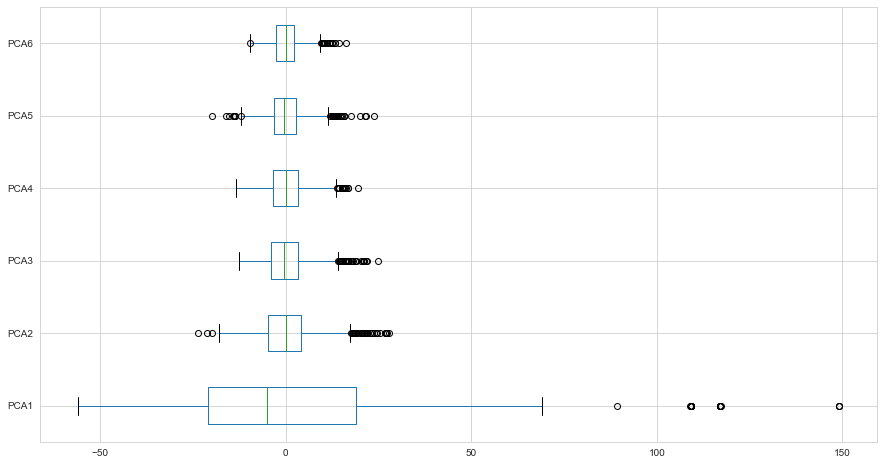

In [234]:
plt.figure(figsize=(15,8))
df_pca_update1.boxplot(vert=False)
plt.show()

### Train Test Split

In [235]:
xtrain_pca, xtest_pca, ytrain_pca, ytest_pca=train_test_split(Xs, y, test_size=0.3, random_state=42)

xtrain_pca.shape, xtest_pca.shape, ytrain_pca.shape, ytest_pca.shape

((984, 6), (422, 6), (984,), (422,))

## Cross Validation

[0.8835370448653423, 0.8808166842601945, 0.8798551495507102, 0.8772723247230326, 0.880506709819823, 0.876848240208921, 0.8775503889465504, 0.8783112216557821, 0.8748032948586536, 0.8790903918578871, 0.8758326595424006, 0.8745749931214959, 0.8724634139269698, 0.8748743623487958, 0.8725121137871994, 0.8738292947996023, 0.8739514023972157, 0.8740851313065041, 0.8712750695770495]


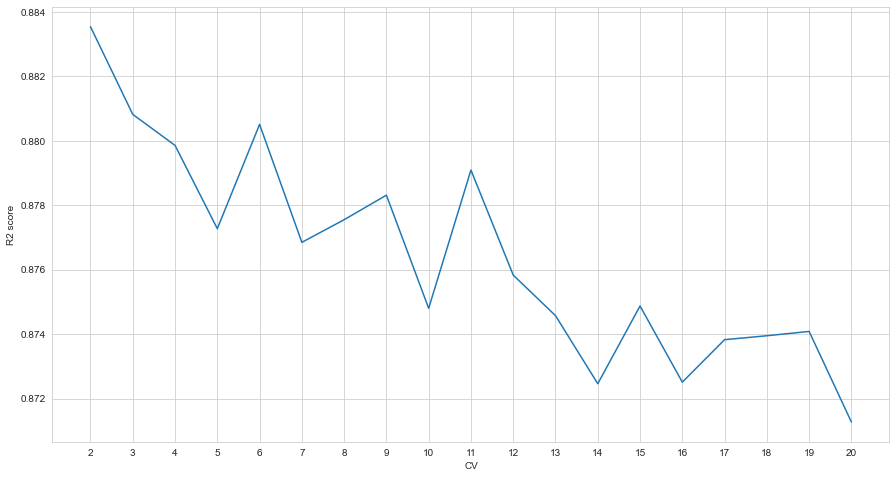

In [236]:
ins=[]
for i in range(2,21):
    cv_results = cross_val_score(LinearRegression(), xtrain_pca , ytrain_pca, cv=i , scoring = 'r2')
    ins.append(cv_results.mean())
print(ins)

plt.figure(figsize=(15,8))
plt.plot(range(2,21), ins)
plt.xlabel('CV')
plt.ylabel('R2 score')
plt.xticks(range(2,21))
plt.show()

* cv=2 is best

In [237]:
from sklearn import linear_model  
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import mean_squared_error, r2_score  

In [238]:
def pcr(X,y,pc):
    Xreg = X
    # Create linear regression object  
    regr = linear_model.LinearRegression()    
    # Fit  
    regr.fit(Xreg, y)    
    # Calibration  
    y_c = regr.predict(Xreg)    
    # Cross-validation  
    y_cv = cross_val_predict(regr, Xreg, y, cv=2)    
    # Calculate scores for calibration and cross-validation  
    score_c = r2_score(y, y_c)  
    score_cv = r2_score(y, y_cv)    
    # Calculate mean square error for calibration and cross validation  
    mse_c = mean_squared_error(y, y_c) 
    mse_cv = mean_squared_error(y, y_cv)    
    return(y_cv, score_c, score_cv, mse_c, mse_cv)  

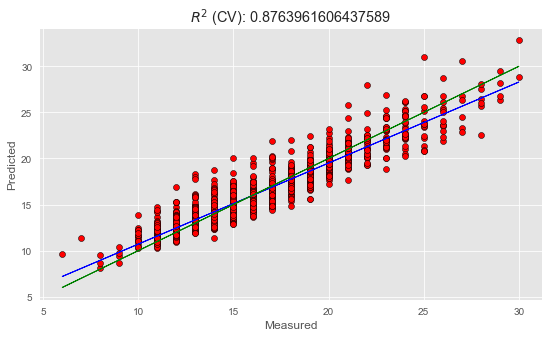

predicted: [16.4936995  14.49782612 14.67062965 ... 16.14388558 18.08433098
 16.0157505 ],
r2r: 0.8799846063031185,
r2cv: 0.8763961606437589,
mser: 1.66219173534528,
mscv: 1.711891065856064


In [239]:
predicted, r2r, r2cv, mser, mscv = pcr(Xc,y, pc=6)   
#Regression plot 
z = np.polyfit(y, predicted, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))  
    ax.scatter(y, predicted, c='red', edgecolors='k')  
    ax.plot(y, z[1]+z[0]*y, c='blue', linewidth=1)  
    ax.plot(y, y, color='green', linewidth=1)  
    plt.title('$R^{2}$ (CV): '+str(r2cv))  
    plt.xlabel('Measured')  
    plt.ylabel('Predicted')  
    plt.show()  
    
print(f"predicted: {predicted},\nr2r: {r2r},\nr2cv: {r2cv},\nmser: {mser},\nmscv: {mscv}")

* As after applying PCA, the Linear Regression shows the best result
* And the model is not overfitted, we will be selecting this model.

## Find LengthofCycle

### Base Model for LengthofCycle

In [240]:
X=df_signi.drop('LengthofCycle', axis=1)
y=df_signi.LengthofCycle
x_const=sma.add_constant(X)
model=sma.OLS(y, x_const, missing='drop').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          LengthofCycle   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     1437.
Date:                Thu, 01 Apr 2021   Prob (F-statistic):               0.00
Time:                        10:42:07   Log-Likelihood:                -643.62
No. Observations:                1406   AIC:                             1463.
Df Residuals:                    1318   BIC:                             1925.
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         0.9093      1.260      0.722      0.471      -1.562       3.381
Weight                                        0.0005      0.000      1.022      0.307      -0.000       0.001
MeanBleedingIntensity                        -0.0073      0.016     -0.446      0.656      -0.039       0.025
CycleNumber                                   0.0004      0.002      0.194      0.846      -0.003       0.004
GynosurgeriesCryoandCervicalLeep              0.0295      0.124      0.238      0.812      -0.213       0.272
GynosurgeriesRemovalofOneOvary                0.0735      0.142      0.517      0.605      -0.205       0.352
TotalHighPostPeak                            -0.0010      0.019     -0.054      0.957      -0.038       0.036
GynosurgeriesDandC                           -0.0170      0.053     -0.319      0.750      -0.122       0.088
EstimatedDayofOvulation                       0.9622      0.017     57.415      0.000       0.929       0.995
GynosurgeriesCsection                        -0.0062      0.019     -0.325      0.745      -0.044       0.031
GynosurgeriesLaparoscopy                      0.0468      0.060      0.774      0.439      -0.072       0.165
Height                                       -0.0079      0.006     -1.334      0.183      -0.019       0.004
NumberofDaysofIntercourse                     0.0038      0.004      0.923      0.356      -0.004       0.012
Age                                          -0.0051      0.003     -1.517      0.129      -0.012       0.001
Abortions                                     0.0069      0.069      0.100      0.921      -0.129       0.143
LengthofLutealPhase                           0.9682      0.007    145.928      0.000       0.955       0.981
TotalNumberofHighDays                         0.0049      0.009      0.543      0.587      -0.013       0.023
LengthofMenses                               -0.0371      0.109     -0.340      0.734      -0.251       0.177
TotalNumberofPeakDays                         0.0037      0.015      0.238      0.812      -0.027       0.034
MeanCycleLength                               0.0193      0.007      2.751      0.006       0.006       0.033
MeanMensesLength                             -0.0066      0.035     -0.185      0.853      -0.076       0.063
Miscarriages                                 -0.0047      0.022     -0.217      0.828      -0.047       0.038
TotalDaysofFertility                          0.0011      0.015      0.076      0.940      -0.028       0.030
FirstDayofHigh                                0.0162      0.014      1.139      0.255      -0.012       0.044
TotalMensesScore                             -0.0151      0.094     -0.160      0.873      -0.200       0.170
Liv

In [241]:
model.pvalues[model.pvalues<0.05]  # significant columns after handling all null values

EstimatedDayofOvulation    0.000000e+00
LengthofLutealPhase        0.000000e+00
MeanCycleLength            6.031353e-03
Group_Mucus                1.623577e-02
CycleWithPeakorNot_Peak    2.995688e-11
dtype: float64

In [242]:
significant_columns.FirstDayofHigh=df_signi.FirstDayofHigh
significant_columns.EstimatedDayofOvulation=df_signi.EstimatedDayofOvulation

In [243]:
model.params.sort_values(ascending=False)

LengthofLutealPhase                          0.968231
EstimatedDayofOvulation                      0.962157
const                                        0.909268
MensesScoreDay11_Moderate                    0.708920
IntercourseDuringUnusBleed_Not Applicable    0.481667
                                               ...   
ReproductiveCategory_Short (<25 days)       -0.133608
MensesScoreDay11_No Bleeding                -0.197992
UnusualBleeding_Yes                         -0.234331
MensesScoreDayNine_Moderate                 -0.278906
CycleWithPeakorNot_Peak                     -0.388125
Length: 97, dtype: float64

## Assumptions for Linear Regression of the target LengthofCycle

**Linearity : Rainbow Test**
* H0: Predictors have linear relationship with target column
* H1: Predictors do not have linear relationship with target column

In [244]:
stats, pval=sma.stats.diagnostic.linear_rainbow(model) #test stats, pvalue.

In [245]:
pval<0.05

True

Inference:
* As P-value< 0.05, we reject the Ho. 
* Hence, Predictors do not have linear relationship with target column

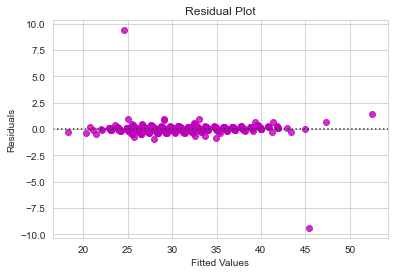

In [246]:
# Residual and Fitted Values
residual = model.resid #(Error: Act-Pred)
fitted = model.fittedvalues # predicted values

# Plotting the Residuals.
sns.set_style("whitegrid") # theme of the plot

sns.residplot(fitted, residual, color = "m")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

Inference:
   * The plot is not showing random pattern but there is some kind of pattern and hence, 
    there is no linear relationship between target and predictors

**Normality: Shapiro Wilk Test**
* H0: Data is not normal
* H1: Data is normal

In [247]:
import scipy.stats as stats
print(stats.shapiro(model.resid))
stats.shapiro(df_signi["LengthofCycle"])

ShapiroResult(statistic=0.2160022258758545, pvalue=0.0)


ShapiroResult(statistic=0.9213488101959229, pvalue=1.8514140200205426e-26)

* p-value<0.05, so rejecting H0
* Data is normal

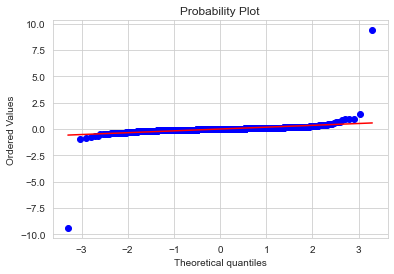

In [248]:
from scipy.stats import probplot

probplot(model.resid, plot = plt)
plt.show() 

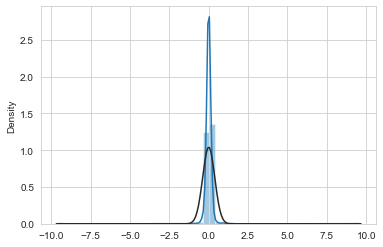

In [249]:
sns.distplot(model.resid, fit = stats.norm);

Inference:
   * Since most of the points are on to the red line hence, the data is normally distributed.
   * If the points deviated from the red line, we can conclude that the data is not normally distributed.

**Multicollinearity**

In [250]:
model.condition_number

1.0120690477919532e+16

In [251]:
model.condition_number>1000 # High multicollinearity

True

In [252]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF is applied on Predictors

x=df_signi.drop('LengthofCycle',1)
mylist =[]

for i in range(x.shape[1]):
    mylist.append(variance_inflation_factor(x.values, i)) # values of the data, instance
    

vif=pd.DataFrame({"Features":x.columns, "VIF": mylist}).sort_values(by='VIF',ascending=False)
vif[:60]

Features         VIF
47                  MensesScoreDay11_Moderate         inf
79               MensesScoreDaySeven_Moderate         inf
49               MensesScoreDayEight_Moderate         inf
54                MensesScoreDayNine_Moderate         inf
56               MensesScoreDay15_No Bleeding         inf
57              PhasesBleeding_Fertile Window         inf
58                    PhasesBleeding_Postpkow         inf
59                    PhasesBleeding_Prepkofw         inf
60                 PhasesBleeding_No Bleeding         inf
61               MensesScoreDay12_No Bleeding         inf
27               MensesScoreDay13_No Bleeding         inf
76             IntercourseDuringUnusBleed_yes         inf
77  IntercourseDuringUnusBleed_Not Applicable         inf
78                  MensesScoreDaySeven_Light         inf
75              IntercourseDuringUnusBleed_no         inf
80            MensesScoreDaySeven_No Bleeding         inf
82               MensesScoreDay14_No Bleeding         inf
23                           TotalMensesScore  647.320087
30              MensesScoreDaySix_No Bleeding  257.109487
86             MensesScoreDayFive_No Bleeding  185.981063
16                             LengthofMenses  174.614132
28                    MensesScoreDaySix_Light  152.053669
84                   MensesScoreDayFive_Light  100.654163
44                   MensesScoreDayFour_Light   89.205789
92                            Prevmethod_None   72.933621
65                  MensesScoreDayThree_Light   55.526532
51                    MensesScoreDayOne_Light   52.894370
46             MensesScoreDayFour_No Bleeding   48.706466
7                     EstimatedDayofOvulation   35.048314
91                             Prevmethod_NFP   33.531185
87                        UnusualBleeding_Yes   26.130033
45                MensesScoreDayFour_Moderate   24.402423
22                             FirstDayofHigh   23.804404
93                            Prevmethod_Pill   23.335141
66               MensesScoreDayThree_Moderate   22.200207
21                       TotalDaysofFertility   19.519041
52                 MensesScoreDayOne_Moderate   18.665242
63                 MensesScoreDayTwo_Moderate   18.479496
62                    MensesScoreDayTwo_Light   18.435626
85                MensesScoreDayFive_Moderate   17.412264
1                       MeanBleedingIntensity   13.907878
67            MensesScoreDayThree_No Bleeding   13.738276
94                       Prevmethod_Withdrawl   12.176899
29                 MensesScoreDaySix_Moderate   11.969153
19                           MeanMensesLength   11.480564
50            MensesScoreDayEight_No Bleeding    9.287600
88                         Prevmethod_Barrier    8.791491
15                      TotalNumberofHighDays    8.365651
90                             Prevmethod_IUD    7.185194
35                                 Method_NFP    7.106893
55             MensesScoreDayNine_No Bleeding    5.791714
95              MensesScoreDayTen_No Bleeding    4.955174
36                                Method_None    4.603189
25                      TotalFertilityFormula    4.524928
40                    Ethnicity_Euro-American    4.204135
48               MensesScoreDay11_No Bleeding    4.009255
31      ReproductiveCategory_Regular (25-35d)    3.863196
32      ReproductiveCategory_Short (<25 days)    3.857304
38                          Method_Withdrawal    3.622834
18                            MeanCycleLength    3.469799

In [253]:
vif[vif.VIF>5].shape

(51, 2)

In [254]:
vif[vif.VIF>5] # columns with high multicollinearity

Features         VIF
47                  MensesScoreDay11_Moderate         inf
79               MensesScoreDaySeven_Moderate         inf
49               MensesScoreDayEight_Moderate         inf
54                MensesScoreDayNine_Moderate         inf
56               MensesScoreDay15_No Bleeding         inf
57              PhasesBleeding_Fertile Window         inf
58                    PhasesBleeding_Postpkow         inf
59                    PhasesBleeding_Prepkofw         inf
60                 PhasesBleeding_No Bleeding         inf
61               MensesScoreDay12_No Bleeding         inf
27               MensesScoreDay13_No Bleeding         inf
76             IntercourseDuringUnusBleed_yes         inf
77  IntercourseDuringUnusBleed_Not Applicable         inf
78                  MensesScoreDaySeven_Light         inf
75              IntercourseDuringUnusBleed_no         inf
80            MensesScoreDaySeven_No Bleeding         inf
82               MensesScoreDay14_No Bleeding         inf
23                           TotalMensesScore  647.320087
30              MensesScoreDaySix_No Bleeding  257.109487
86             MensesScoreDayFive_No Bleeding  185.981063
16                             LengthofMenses  174.614132
28                    MensesScoreDaySix_Light  152.053669
84                   MensesScoreDayFive_Light  100.654163
44                   MensesScoreDayFour_Light   89.205789
92                            Prevmethod_None   72.933621
65                  MensesScoreDayThree_Light   55.526532
51                    MensesScoreDayOne_Light   52.894370
46             MensesScoreDayFour_No Bleeding   48.706466
7                     EstimatedDayofOvulation   35.048314
91                             Prevmethod_NFP   33.531185
87                        UnusualBleeding_Yes   26.130033
45                MensesScoreDayFour_Moderate   24.402423
22                             FirstDayofHigh   23.804404
93                            Prevmethod_Pill   23.335141
66               MensesScoreDayThree_Moderate   22.200207
21                       TotalDaysofFertility   19.519041
52                 MensesScoreDayOne_Moderate   18.665242
63                 MensesScoreDayTwo_Moderate   18.479496
62                    MensesScoreDayTwo_Light   18.435626
85                MensesScoreDayFive_Moderate   17.412264
1                       MeanBleedingIntensity   13.907878
67            MensesScoreDayThree_No Bleeding   13.738276
94                       Prevmethod_Withdrawl   12.176899
29                 MensesScoreDaySix_Moderate   11.969153
19                           MeanMensesLength   11.480564
50            MensesScoreDayEight_No Bleeding    9.287600
88                         Prevmethod_Barrier    8.791491
15                      TotalNumberofHighDays    8.365651
90                             Prevmethod_IUD    7.185194
35                                 Method_NFP    7.106893
55             MensesScoreDayNine_No Bleeding    5.791714

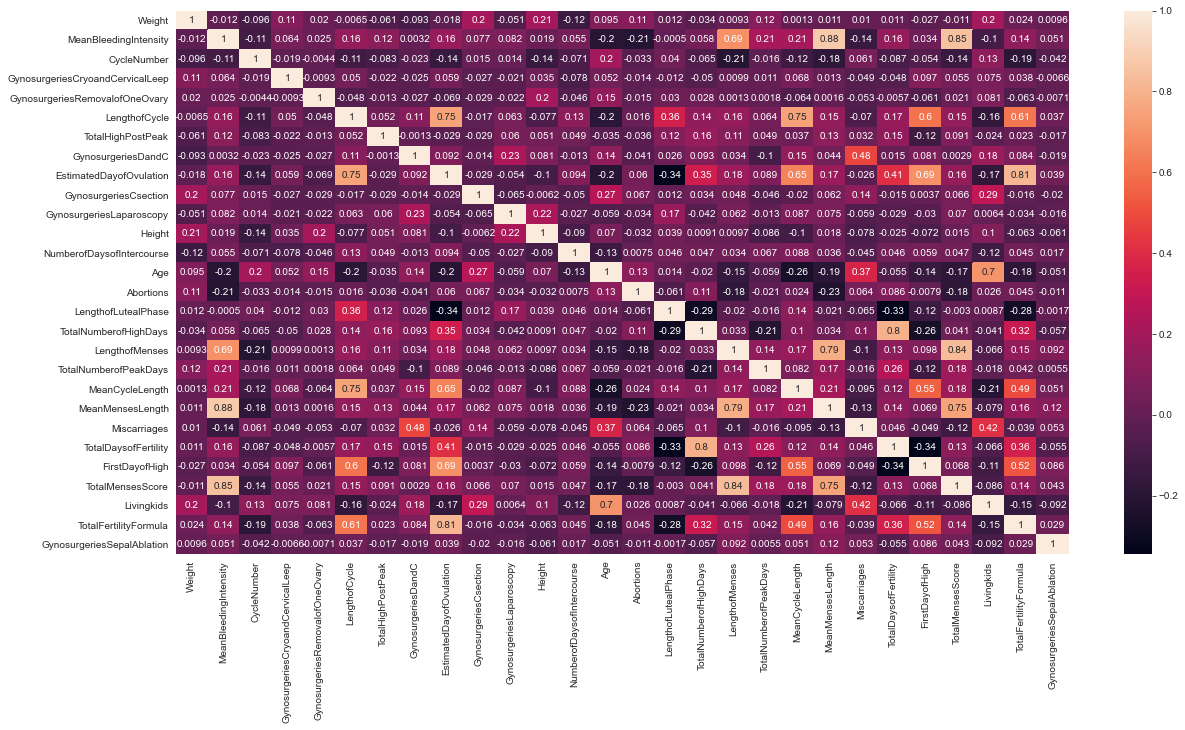

In [255]:
plt.figure(figsize=(20,10))
sns.heatmap(significant_columns.corr(),annot=True);

**Autocorrelation: Durbin Watson**
* Ho: No Autocorrelation in errors/residuals
* H1: Autocorrelation in errors/residuals exist.

In [256]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(model.resid)

2.0311746611730688

Inference:
   * Since it is between 1.5 - 2.5, we fail to reject the H0.
   * There are errors/residuals in autocorrelations

**Heteroskedasticity**
* H0: Errors are Homoskedastic (Uniform Variance) & is not Heteroskedastic(Uneven Variance)
* H1: Errors aren't Homoskedastic(Uniform Variance) & is Heteroskedastic(Uneven Variance)    

In [257]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          LengthofCycle   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     1437.
Date:                Thu, 01 Apr 2021   Prob (F-statistic):               0.00
Time:                        10:42:56   Log-Likelihood:                -643.62
No. Observations:                1406   AIC:                             1463.
Df Residuals:                    1318   BIC:                             1925.
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         0.9093      1.260      0.722      0.471      -1.562       3.381
Weight                                        0.0005      0.000      1.022      0.307      -0.000       0.001
MeanBleedingIntensity                        -0.0073      0.016     -0.446      0.656      -0.039       0.025
CycleNumber                                   0.0004      0.002      0.194      0.846      -0.003       0.004
GynosurgeriesCryoandCervicalLeep              0.0295      0.124      0.238      0.812      -0.213       0.272
GynosurgeriesRemovalofOneOvary                0.0735      0.142      0.517      0.605      -0.205       0.352
TotalHighPostPeak                            -0.0010      0.019     -0.054      0.957      -0.038       0.036
GynosurgeriesDandC                           -0.0170      0.053     -0.319      0.750      -0.122       0.088
EstimatedDayofOvulation                       0.9622      0.017     57.415      0.000       0.929       0.995
GynosurgeriesCsection                        -0.0062      0.019     -0.325      0.745      -0.044       0.031
GynosurgeriesLaparoscopy                      0.0468      0.060      0.774      0.439      -0.072       0.165
Height                                       -0.0079      0.006     -1.334      0.183      -0.019       0.004
NumberofDaysofIntercourse                     0.0038      0.004      0.923      0.356      -0.004       0.012
Age                                          -0.0051      0.003     -1.517      0.129      -0.012       0.001
Abortions                                     0.0069      0.069      0.100      0.921      -0.129       0.143
LengthofLutealPhase                           0.9682      0.007    145.928      0.000       0.955       0.981
TotalNumberofHighDays                         0.0049      0.009      0.543      0.587      -0.013       0.023
LengthofMenses                               -0.0371      0.109     -0.340      0.734      -0.251       0.177
TotalNumberofPeakDays                         0.0037      0.015      0.238      0.812      -0.027       0.034
MeanCycleLength                               0.0193      0.007      2.751      0.006       0.006       0.033
MeanMensesLength                             -0.0066      0.035     -0.185      0.853      -0.076       0.063
Miscarriages                                 -0.0047      0.022     -0.217      0.828      -0.047       0.038
TotalDaysofFertility                          0.0011      0.015      0.076      0.940      -0.028       0.030
FirstDayofHigh                                0.0162      0.014      1.139      0.255      -0.012       0.044
TotalMensesScore                             -0.0151      0.094     -0.160      0.873      -0.200       0.170
Liv

In [258]:
import statsmodels.stats.api as ssa

predictors = df_signi.drop('LengthofCycle', axis=1)

# residuals, predictors:: endog, exhog
# Generate 04 statistic - Test Stat of BP, PValue(BP), Ftest & Pvalue(Ftest)
teststats, pvalue, ftest, f_pvalue = ssa.het_breuschpagan(model.resid, sma.add_constant(predictors) )
print(pvalue)

0.9999991217888614


In [259]:
pvalue<0.05

False

Inference:
* We fail to reject the null hypothesis as the pvalue > 0.05
* There is uniform variance in the data points which means the data is homoskedastic

Conclusion for Linear Assumptions:
   * predictors and Target is not linear
   * Data is normally distributed
   * High multicollinearity is present
   * There is autocorrelation in residuals
   * Errors are Homoskedastic
   
  **Hence, we conclude that Linear Regression is not a good fit for our dataset**
  **But maybe after working on the assumptions we can select Linear Regression**

### Removing multicollinearity for LengthofCycle

In [260]:
vif

Features       VIF
47         MensesScoreDay11_Moderate       inf
79      MensesScoreDaySeven_Moderate       inf
49      MensesScoreDayEight_Moderate       inf
54       MensesScoreDayNine_Moderate       inf
56      MensesScoreDay15_No Bleeding       inf
..                               ...       ...
5                  TotalHighPostPeak  1.384579
3   GynosurgeriesCryoandCervicalLeep  1.168923
70               Breastfeeding_Total  1.165349
53     MensesScoreDayOne_No Bleeding       NaN
64     MensesScoreDayTwo_No Bleeding       NaN

[96 rows x 2 columns]

In [261]:
vif[vif.VIF>5]

Features         VIF
47                  MensesScoreDay11_Moderate         inf
79               MensesScoreDaySeven_Moderate         inf
49               MensesScoreDayEight_Moderate         inf
54                MensesScoreDayNine_Moderate         inf
56               MensesScoreDay15_No Bleeding         inf
57              PhasesBleeding_Fertile Window         inf
58                    PhasesBleeding_Postpkow         inf
59                    PhasesBleeding_Prepkofw         inf
60                 PhasesBleeding_No Bleeding         inf
61               MensesScoreDay12_No Bleeding         inf
27               MensesScoreDay13_No Bleeding         inf
76             IntercourseDuringUnusBleed_yes         inf
77  IntercourseDuringUnusBleed_Not Applicable         inf
78                  MensesScoreDaySeven_Light         inf
75              IntercourseDuringUnusBleed_no         inf
80            MensesScoreDaySeven_No Bleeding         inf
82               MensesScoreDay14_No Bleeding         inf
23                           TotalMensesScore  647.320087
30              MensesScoreDaySix_No Bleeding  257.109487
86             MensesScoreDayFive_No Bleeding  185.981063
16                             LengthofMenses  174.614132
28                    MensesScoreDaySix_Light  152.053669
84                   MensesScoreDayFive_Light  100.654163
44                   MensesScoreDayFour_Light   89.205789
92                            Prevmethod_None   72.933621
65                  MensesScoreDayThree_Light   55.526532
51                    MensesScoreDayOne_Light   52.894370
46             MensesScoreDayFour_No Bleeding   48.706466
7                     EstimatedDayofOvulation   35.048314
91                             Prevmethod_NFP   33.531185
87                        UnusualBleeding_Yes   26.130033
45                MensesScoreDayFour_Moderate   24.402423
22                             FirstDayofHigh   23.804404
93                            Prevmethod_Pill   23.335141
66               MensesScoreDayThree_Moderate   22.200207
21                       TotalDaysofFertility   19.519041
52                 MensesScoreDayOne_Moderate   18.665242
63                 MensesScoreDayTwo_Moderate   18.479496
62                    MensesScoreDayTwo_Light   18.435626
85                MensesScoreDayFive_Moderate   17.412264
1                       MeanBleedingIntensity   13.907878
67            MensesScoreDayThree_No Bleeding   13.738276
94                       Prevmethod_Withdrawl   12.176899
29                 MensesScoreDaySix_Moderate   11.969153
19                           MeanMensesLength   11.480564
50            MensesScoreDayEight_No Bleeding    9.287600
88                         Prevmethod_Barrier    8.791491
15                      TotalNumberofHighDays    8.365651
90                             Prevmethod_IUD    7.185194
35                                 Method_NFP    7.106893
55             MensesScoreDayNine_No Bleeding    5.791714

In [262]:
vif[vif.VIF>5].Features.values

array(['MensesScoreDay11_Moderate', 'MensesScoreDaySeven_Moderate',
       'MensesScoreDayEight_Moderate', 'MensesScoreDayNine_Moderate',
       'MensesScoreDay15_No Bleeding', 'PhasesBleeding_Fertile Window',
       'PhasesBleeding_Postpkow', 'PhasesBleeding_Prepkofw',
       'PhasesBleeding_No Bleeding', 'MensesScoreDay12_No Bleeding',
       'MensesScoreDay13_No Bleeding', 'IntercourseDuringUnusBleed_yes',
       'IntercourseDuringUnusBleed_Not Applicable',
       'MensesScoreDaySeven_Light', 'IntercourseDuringUnusBleed_no',
       'MensesScoreDaySeven_No Bleeding', 'MensesScoreDay14_No Bleeding',
       'TotalMensesScore', 'MensesScoreDaySix_No Bleeding',
       'MensesScoreDayFive_No Bleeding', 'LengthofMenses',
       'MensesScoreDaySix_Light', 'MensesScoreDayFive_Light',
       'MensesScoreDayFour_Light', 'Prevmethod_None',
       'MensesScoreDayThree_Light', 'MensesScoreDayOne_Light',
       'MensesScoreDayFour_No Bleeding', 'EstimatedDayofOvulation',
       'Prevmethod_NFP', '

* Highly multicollinear columns, dropping them

In [263]:
df_signi=df_signi.drop(vif[vif.VIF>5].Features.values, axis=1)
df_signi.shape

(1406, 46)

### Train Test Split

In [264]:
from sklearn.model_selection import cross_val_score,KFold

X=df_signi.drop('LengthofCycle', axis=1)
y=df_signi.LengthofCycle
xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.3, random_state=42)

xtrain.shape, ytest.shape

((984, 45), (422,))

In [265]:
# Rerun the model to test the scores and fitting

x_const=sma.add_constant(xtrain)
model_vif=sma.OLS(ytrain, x_const).fit()
model_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          LengthofCycle   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     138.2
Date:                Thu, 01 Apr 2021   Prob (F-statistic):               0.00
Time:                        10:42:57   Log-Likelihood:                -1714.0
No. Observations:                 984   AIC:                             3516.
Df Residuals:                     940   BIC:                             3731.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     4.8203      2.408      2.002      0.046       0.095       9.546
Weight                                   -0.0023      0.002     -1.219      0.223      -0.006       0.001
CycleNumber                               0.0021      0.008      0.263      0.792      -0.014       0.018
GynosurgeriesCryoandCervicalLeep          0.1670      0.474      0.352      0.725      -0.764       1.098
GynosurgeriesRemovalofOneOvary            0.2326      0.616      0.378      0.706      -0.975       1.441
TotalHighPostPeak                        -0.1471      0.078     -1.888      0.059      -0.300       0.006
GynosurgeriesDandC                       -0.2975      0.201     -1.481      0.139      -0.692       0.097
GynosurgeriesCsection                     0.1553      0.073      2.130      0.033       0.012       0.298
GynosurgeriesLaparoscopy                 -0.4116      0.249     -1.651      0.099      -0.901       0.078
Height                                    0.0372      0.023      1.608      0.108      -0.008       0.083
NumberofDaysofIntercourse                 0.0428      0.018      2.433      0.015       0.008       0.077
Age                                      -0.0017      0.014     -0.119      0.905      -0.029       0.026
Abortions                                -0.0030      0.294     -0.010      0.992      -0.579       0.573
LengthofLutealPhase                       0.5120      0.022     22.779      0.000       0.468       0.556
TotalNumberofPeakDays                    -0.0049      0.044     -0.110      0.912      -0.092       0.082
MeanCycleLength                           0.4949      0.023     21.977      0.000       0.451       0.539
Miscarriages                              0.0905      0.084      1.078      0.281      -0.074       0.255
Livingkids                               -0.0126      0.040     -0.317      0.752      -0.091       0.065
TotalFertilityFormula                     0.4053      0.018     22.108      0.000       0.369       0.441
GynosurgeriesSepalAblation               -0.1243      0.677     -0.184      0.854      -1.453       1.205
ReproductiveCategory_Regular (25-35d)    -3.5717      0.230    -15.547      0.000      -4.023      -3.121
ReproductiveCategory_Short (<25 days)    -5.6922      0.350    -16.274      0.000      -6.379      -5.006
Method_Barrier                           -0.1050      0.286     -0.367      0.714      -0.666       0.457
Method_Breastfeeding                      0.0290      0.530      0.055      0.956      -1.012       1.070
Method_None                              -0.7230      0.217     -3.330      0.001      -1.149      -0.297
Method_Other                              0.3264      0.456      0.715      0.475      -0.569       1.222
Method_Wi

In [266]:
pred_y_vif=model_vif.predict(sma.add_constant(xtest,has_constant='add'))
pred_y_vif

1075    28.135521
1015    30.964313
650     31.894568
447     29.329809
1290    27.211589
          ...    
178     29.288413
287     26.361927
1355    27.350877
1168    34.260866
294     28.445115
Length: 422, dtype: float64

In [267]:
# if train error < test error -> Overfitting
print('Train RMSE: ',np.sqrt(metrics.mean_squared_error(ytrain,
                            model_vif.predict(sma.add_constant(xtrain)))))
print('Test RMSE: ', np.sqrt(metrics.mean_squared_error(ytest,pred_y_vif)))

Train RMSE:  1.3811768472490724
Test RMSE:  1.3290681527931765


* Since train RMSE > test RMSE , so our model is not overfitted

# Feature Selection

### Sequential Feature Selection

In [268]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# initiate linear regression model to use in feature selection

# build forward feature selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'. Here 'best' is the stopping rule
# 'forward=True' performs forward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_forward = sfs(estimator=LinearRegression(), k_features = 'best', forward=True,
                     verbose=2, scoring='r2')

# fit the forward selection on training data using fit()
sfs_forward = linreg_forward.fit(xtrain, ytrain)
sfs_forward.k_feature_names_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.1s finished

[2021-04-01 10:42:59] Features: 1/45 -- score: 0.5563369425935426[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:    1.1s finished

[2021-04-01 10:43:01] Features: 2/45 -- score: 0.6357156616632383[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    1.5s finished

[2021-04-01 10:43:02] Features: 3/45 -- score: 0.796036082027428[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.6s finished

[2021-04-01 10:43:31] Features: 28/45 -- score: 0.8539908921866113[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    1.2s finished

[2021-04-01 10:43:32] Features: 29/45 -- score: 0.8538292533369738[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.8s finished

[2021-04-01 10:43:33] Features: 30/45 -- score: 0.8536697507131418[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.6s finished

[2021-04-01 10:43:33] Features: 31/

('TotalHighPostPeak',
 'GynosurgeriesDandC',
 'GynosurgeriesCsection',
 'GynosurgeriesLaparoscopy',
 'NumberofDaysofIntercourse',
 'LengthofLutealPhase',
 'MeanCycleLength',
 'TotalFertilityFormula',
 'ReproductiveCategory_Regular (25-35d)',
 'ReproductiveCategory_Short (<25 days)',
 'Method_None',
 'Method_Other',
 'Group_Mucus',
 'CycleWithPeakorNot_Peak',
 'Religion_Other',
 'Religion_Protestant/Other Christian',
 'IntercourseInFertileWindow_Yes',
 'Medvits_Yes',
 'MensesScoreDayTen_No Bleeding')

In [269]:
len(sfs_forward.k_feature_names_) # number of best columns

19

In [270]:
xtrain[[i for i in sfs_forward.k_feature_names_]]

TotalHighPostPeak  GynosurgeriesDandC  GynosurgeriesCsection  \
535                 0.0                 0.0                    0.0   
451                 0.0                 0.0                    0.0   
1063                0.0                 0.0                    0.0   
428                 0.0                 0.0                    0.0   
869                 0.0                 1.0                    0.0   
...                 ...                 ...                    ...   
1095                0.0                 0.0                    1.0   
1130                0.0                 0.0                    0.0   
1294                0.0                 0.0                    0.0   
860                 0.0                 0.0                    0.0   
1126                0.0                 0.0                    0.0   

      GynosurgeriesLaparoscopy  NumberofDaysofIntercourse  \
535                        0.0                        9.0   
451                        0.0                        2.0   
1063                       0.0                        7.0   
428                        0.0                        3.0   
869                        1.0                        4.0   
...                        ...                        ...   
1095                       0.0                        4.0   
1130                       0.0                        0.0   
1294                       0.0                        4.0   
860                        0.0                        0.0   
1126                       0.0                        7.0   

      LengthofLutealPhase  MeanCycleLength  TotalFertilityFormula  \
535             14.000000          28.2300                   13.0   
451             12.000000          26.6900                   12.0   
1063             4.000000          29.0000                   23.0   
428             11.000000          33.9200                   25.0   
869             13.000000          26.7100                   12.0   
...                   ...              ...                    ...   
1095            11.000000          25.8500                   14.0   
1130            13.000000          29.6200                   18.0   
1294            12.000000          26.5800                    9.0   
860             12.000000          25.4000                   14.0   
1126            12.910554          26.3125                   12.0   

      ReproductiveCategory_Regular (25-35d)  \
535                                       1   
451                                       1   
1063                                      1   
428                                       0   
869                                       1   
...                                     ...   
1095                                      1   
1130                                      1   
1294                                      1   
860                                       1   
1126                                      1   

      ReproductiveCategory_Short (<25 days)  Method_None  Method_Other  \
535                                       0            0             0   
451                                       0            0             0   
1063                                      0            0             0   
428                                       0            0             0   
869                                       0            0             0   
...                                     ...          ...           ...   
1095                                      0            0             1   
1130                                      0            0             0   
1294                                      0            0             0   
860                                       0            0             0   
1126                                      0            0             0   

      Group_Mucus  CycleWithPeakorNot_Peak  Religion_Other  \
535             1                        1               0   
451             0        

In [271]:
xtrain_sfs = xtrain[[i for i in sfs_forward.k_feature_names_]]
xtest_sfs = xtest[[i for i in sfs_forward.k_feature_names_]]

sfs_model = sm.OLS(ytrain,sm.add_constant(xtrain_sfs)).fit()
sfs_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          LengthofCycle   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     317.0
Date:                Thu, 01 Apr 2021   Prob (F-statistic):               0.00
Time:                        10:43:39   Log-Likelihood:                -1719.0
No. Observations:                 984   AIC:                             3478.
Df Residuals:                     964   BIC:                             3576.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     5.9905      1.085      5.519      0.000       3.861       8.121
TotalHighPostPeak                        -0.1326      0.075     -1.758      0.079      -0.281       0.015
GynosurgeriesDandC                       -0.1770      0.157     -1.127      0.260      -0.485       0.131
GynosurgeriesCsection                     0.1274      0.062      2.040      0.042       0.005       0.250
GynosurgeriesLaparoscopy                 -0.3307      0.235     -1.407      0.160      -0.792       0.131
NumberofDaysofIntercourse                 0.0399      0.016      2.450      0.014       0.008       0.072
LengthofLutealPhase                       0.5104      0.022     23.315      0.000       0.467       0.553
MeanCycleLength                           0.4936      0.021     23.819      0.000       0.453       0.534
TotalFertilityFormula                     0.4048      0.017     23.141      0.000       0.370       0.439
ReproductiveCategory_Regular (25-35d)    -3.5094      0.225    -15.581      0.000      -3.951      -3.067
ReproductiveCategory_Short (<25 days)    -5.6281      0.342    -16.467      0.000      -6.299      -4.957
Method_None                              -0.6484      0.195     -3.323      0.001      -1.031      -0.265
Method_Other                              0.4537      0.427      1.061      0.289      -0.385       1.293
Group_Mucus                              -0.4610      0.103     -4.458      0.000      -0.664      -0.258
CycleWithPeakorNot_Peak                   0.8403      0.188      4.459      0.000       0.470       1.210
Religion_Other                           -0.3843      0.239     -1.607      0.108      -0.854       0.085
Religion_Protestant/Other Christian      -0.6764      0.352     -1.922      0.055      -1.367       0.014
IntercourseInFertileWindow_Yes           -0.3336      0.101     -3.290      0.001      -0.533      -0.135
Medvits_Yes                               0.2617      0.109      2.390      0.017       0.047       0.477
MensesScoreDayTen_No Bleeding            -0.9978      0.710     -1.405      0.160      -2.391       0.395
==============================================================================
Omnibus:                      207.652   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1721.188
Skew:                           0.719   Prob(JB):                         0.00
Kurtosis:                       9.318   Cond. No.                         971.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [272]:
lrmodel = LinearRegression()
from sklearn import metrics
# Making the Prediction
pred_train_sfs = lrmodel.fit(xtrain_sfs, ytrain).predict(xtrain_sfs) # prediction on Train
pred_test_sfs = lrmodel.fit(xtrain_sfs, ytrain).predict(xtest_sfs) # prediction on Test

# RMSE on Train and Test
print("RMSE for Train: ",np.sqrt(metrics.mean_squared_error(ytrain, pred_train_sfs)))
print("RMSE for Test: ",np.sqrt(metrics.mean_squared_error(ytest, pred_test_sfs)))

#R2Score on Train and Test
print("R2Score for Train: ",metrics.r2_score(ytrain, pred_train_sfs))
print("R2Score for Test: ",metrics.r2_score(ytest, pred_test_sfs))

RMSE for Train:  1.388242579352503
RMSE for Test:  1.3487575276838057
R2Score for Train:  0.8620244887173969
R2Score for Test:  0.8714979155849545


* There is no overfitting

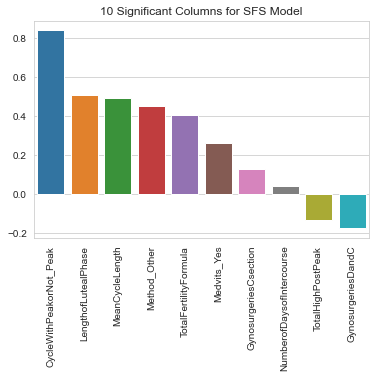

In [273]:
#10 Significant Columns for sequential feature selection Model
sns.barplot(x=sfs_model.params.sort_values(ascending=False)[1:11].index, 
            y=sfs_model.params.sort_values(ascending=False)[1:11])
plt.xticks(rotation='vertical')
plt.title('10 Significant Columns for SFS Model')
plt.show()

## Cross Validation

[0.8518698302632994, 0.854722444372344, 0.8518038414567395, 0.8547443094712591, 0.8546512807677636, 0.8529169776347246, 0.8516429816829303, 0.8513031378307475, 0.8480406740529662, 0.8508514309588989, 0.8500640077552647, 0.8502068732957314, 0.8470393318283121, 0.8449834414254626, 0.8477595047977475, 0.851137740526125, 0.846801120251865, 0.8441440439089087, 0.8448862643343809]


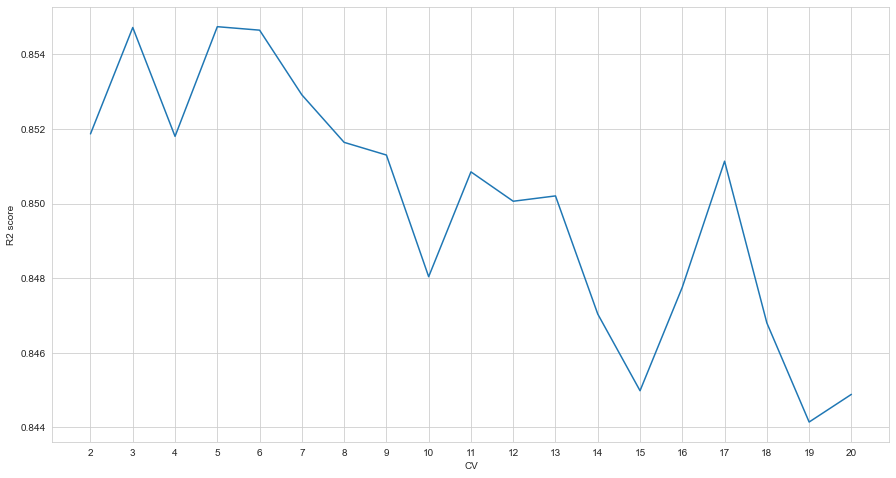

In [274]:
ins=[]
for i in range(2,21):
    cv_results = cross_val_score(LinearRegression(),xtrain_sfs , ytrain , cv=i , scoring = 'r2')
    ins.append(cv_results.mean())
print(ins)

plt.figure(figsize=(15,8))
plt.plot(range(2,21), ins)
plt.xlabel('CV')
plt.ylabel('R2 score')
plt.xticks(range(2,21))
plt.show()

* r2 score is best at cv=5

## Regularization for LengthofCycle

In [275]:
alphas={'alpha':[0.1, 0.001,10, 1,2,3,5,9]}
model_grid=GridSearchCV(estimator=Ridge(normalize=True), param_grid=alphas, cv=5, scoring='r2') # best cv=5 obtained from cross val score
model_grid.fit(xtrain_sfs, ytrain)
model_grid.best_params_

{'alpha': 0.001}

In [276]:
model_ridge=Ridge(alpha=model_grid.best_params_['alpha'], normalize=True)
model_ridge.fit(xtrain_sfs, ytrain)
model_ridge.coef_

array([-0.13210864, -0.17651127,  0.12706076, -0.33007757,  0.03992852,
        0.50983318,  0.49376783,  0.40429149, -3.50348626, -5.61916789,
       -0.64748972,  0.45177885, -0.45982462,  0.83689815, -0.38345677,
       -0.67590443, -0.3326029 ,  0.26069689, -0.99690431])

In [277]:
xtrain_sfs

TotalHighPostPeak  GynosurgeriesDandC  GynosurgeriesCsection  \
535                 0.0                 0.0                    0.0   
451                 0.0                 0.0                    0.0   
1063                0.0                 0.0                    0.0   
428                 0.0                 0.0                    0.0   
869                 0.0                 1.0                    0.0   
...                 ...                 ...                    ...   
1095                0.0                 0.0                    1.0   
1130                0.0                 0.0                    0.0   
1294                0.0                 0.0                    0.0   
860                 0.0                 0.0                    0.0   
1126                0.0                 0.0                    0.0   

      GynosurgeriesLaparoscopy  NumberofDaysofIntercourse  \
535                        0.0                        9.0   
451                        0.0                        2.0   
1063                       0.0                        7.0   
428                        0.0                        3.0   
869                        1.0                        4.0   
...                        ...                        ...   
1095                       0.0                        4.0   
1130                       0.0                        0.0   
1294                       0.0                        4.0   
860                        0.0                        0.0   
1126                       0.0                        7.0   

      LengthofLutealPhase  MeanCycleLength  TotalFertilityFormula  \
535             14.000000          28.2300                   13.0   
451             12.000000          26.6900                   12.0   
1063             4.000000          29.0000                   23.0   
428             11.000000          33.9200                   25.0   
869             13.000000          26.7100                   12.0   
...                   ...              ...                    ...   
1095            11.000000          25.8500                   14.0   
1130            13.000000          29.6200                   18.0   
1294            12.000000          26.5800                    9.0   
860             12.000000          25.4000                   14.0   
1126            12.910554          26.3125                   12.0   

      ReproductiveCategory_Regular (25-35d)  \
535                                       1   
451                                       1   
1063                                      1   
428                                       0   
869                                       1   
...                                     ...   
1095                                      1   
1130                                      1   
1294                                      1   
860                                       1   
1126                                      1   

      ReproductiveCategory_Short (<25 days)  Method_None  Method_Other  \
535                                       0            0             0   
451                                       0            0             0   
1063                                      0            0             0   
428                                       0            0             0   
869                                       0            0             0   
...                                     ...          ...           ...   
1095                                      0            0             1   
1130                                      0            0             0   
1294                                      0            0             0   
860                                       0            0             0   
1126                                      0            0             0   

      Group_Mucus  CycleWithPeakorNot_Peak  Religion_Other  \
535             1                        1               0   
451             0        

In [278]:
from sklearn.linear_model import LassoCV, Lasso
model_lasso=Lasso(alpha=model_grid.best_params_['alpha'], normalize=True)
model_lasso.fit(xtrain_sfs, ytrain)
model_lasso.coef_

array([-0.07516983, -0.11459683,  0.05949586, -0.21666063,  0.03158512,
        0.4923047 ,  0.49692183,  0.39362962, -3.28929978, -5.33326726,
       -0.5261139 ,  0.17317201, -0.36738488,  0.68716464, -0.18867833,
       -0.39556029, -0.2462551 ,  0.12806734, -0.45603344])

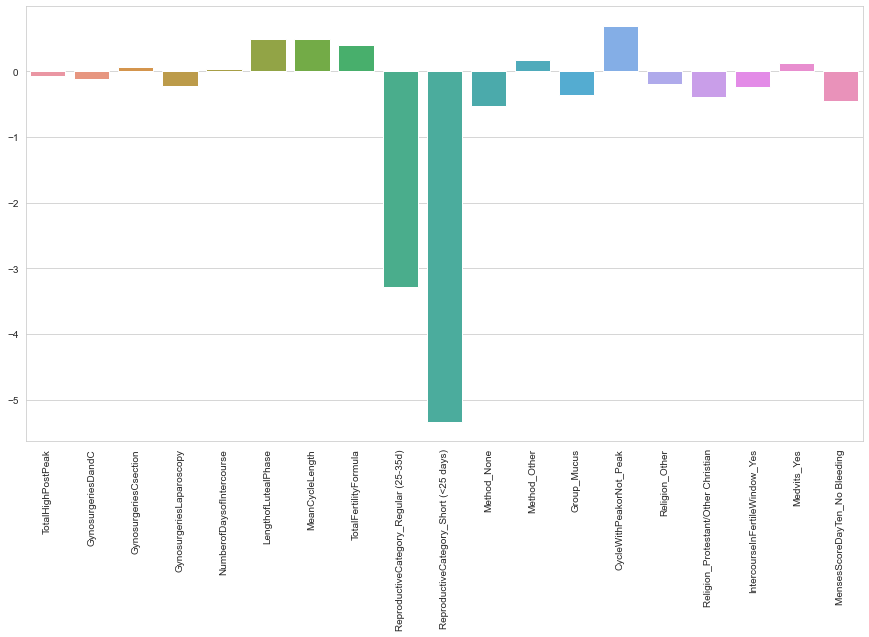

In [279]:
plt.figure(figsize=(15,8))
sns.barplot(x=xtrain_sfs.columns, y=model_lasso.coef_)
plt.xticks(rotation=90)
plt.show()

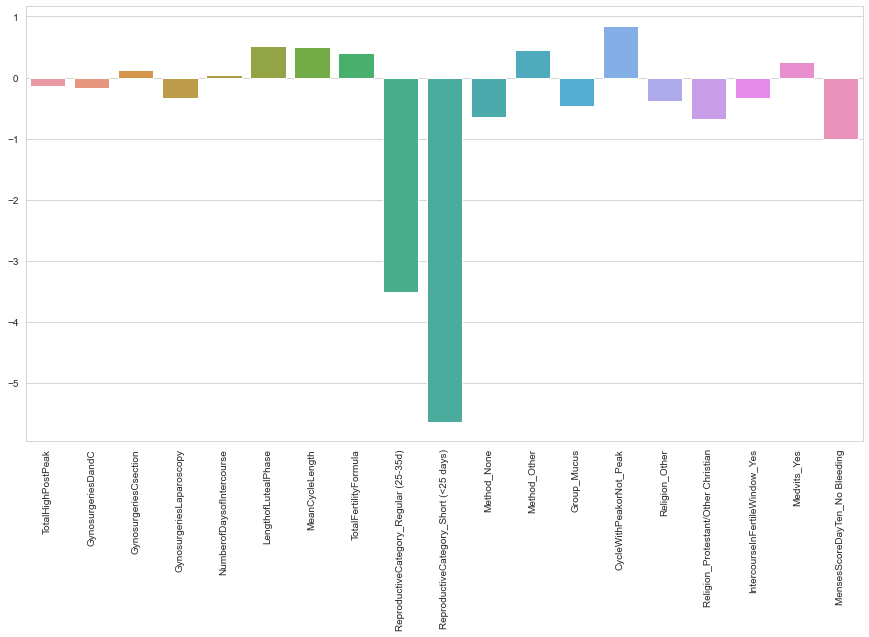

In [280]:
plt.figure(figsize=(15,8))
sns.barplot(x=xtrain_sfs.columns, y=sfs_model.params[1:])
plt.xticks(rotation=90)
plt.show()

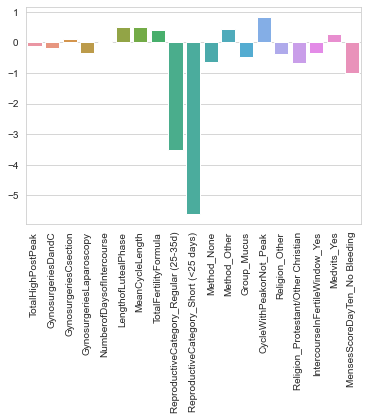

In [281]:
sns.barplot(x=xtrain_sfs.columns, y=sfs_model.params[1:])
plt.xticks(rotation=90), #ticks=range(2,-4,-1))
plt.show()

* Regularisation has no effect, as the model is not overfitted.
* Hence, final model is based upon the selected features using SFS.

### Model Comparison

KNN : 0.874591 (0.018358)
RMSE for Train:  1.4626237700389415
RMSE for Test:  1.6134211979781687
Model is Overfitted

LR_bag : 0.924413 (0.019053)
RMSE for Train:  1.3886087910915281
RMSE for Test:  1.3475869135461862
Model is not Overfitted

Adaboost_lr : 0.914216 (0.010359)
RMSE for Train:  1.4280346471082919
RMSE for Test:  1.3700987048494957
Model is not Overfitted

Adaboost : 0.857443 (0.048632)
RMSE for Train:  1.6200052442305155
RMSE for Test:  1.7507210736394492
Model is Overfitted

Gradient boost : 0.914420 (0.019743)
RMSE for Train:  1.1638251058638909
RMSE for Test:  1.3376593665343248
Model is Overfitted

Random Forest : 0.906118 (0.021951)
RMSE for Train:  0.5707577707654045
RMSE for Test:  1.2803604174487226
Model is Overfitted



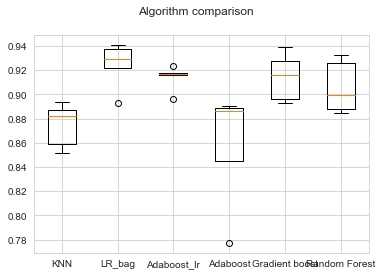

In [282]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor , AdaBoostRegressor , GradientBoostingRegressor , RandomForestRegressor
from sklearn.model_selection import cross_val_score

LR = LinearRegression()
LR_bag = BaggingRegressor(base_estimator = LR , n_estimators = 60 , random_state = 3)
KNN = KNeighborsRegressor()
LR_AB = AdaBoostRegressor(base_estimator = LR , n_estimators = 50 , random_state = 3)
DT_AB = AdaBoostRegressor(n_estimators = 50 , random_state = 3)
LR_GB = GradientBoostingRegressor(n_estimators=50,random_state = 3)
RF = RandomForestRegressor(criterion ='mse' , n_estimators = 40 , random_state = 3)

models = []
models.append(('KNN',KNN))
models.append(('LR_bag',LR_bag))
models.append(('Adaboost_lr',LR_AB))
models.append(('Adaboost',DT_AB))
models.append(('Gradient boost',LR_GB))
models.append(('Random Forest',RF))

results = []
names = []
fitting=[]
for name, model in models : 
    cv_results = cross_val_score(model,xtrain_sfs , ytrain , cv=5 , scoring = 'r2')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print('%s : %f (%f)'% (name , np.mean(np.sqrt(np.abs(cv_results))) , np.std(np.sqrt(np.abs(cv_results)),ddof=1)))
    
    train_rmse=np.sqrt(metrics.mean_squared_error(ytrain, model.fit(xtrain_sfs, ytrain).predict(xtrain_sfs)))
    test_rmse=np.sqrt(metrics.mean_squared_error(ytest, model.predict(xtest_sfs)))
    print("RMSE for Train: ",train_rmse)
    print("RMSE for Test: ",test_rmse)
    if test_rmse > train_rmse:
        print('Model is Overfitted\n')
    else :
        print('Model is not Overfitted\n')

fig = plt.figure()
fig.suptitle('Algorithm comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Conclusion:**
* Variability of the menstrual cycle is normal.
* There are, however, norms that if exceeded might indicate health problems.
* At a minimum, monitoring menstrual cycle length with a simple calendar is recommended.
* The addition of a biological marker for estimating the day of ovulation and the beginning of the fertile phase is essential for those seeking to avoid and achieve pregnancy and for assessing menstrual cycle health.

* Score for objective I:- To predict next menstrual cycle
    * RMSE:  1.34
    * R2Score:  0.862
    * Adj Rsquared: 0.859
* Score for objective II:- To predict estimated day of ovulation
    * RMSE:  1.66
    * R2Score:  0.88
    * Adj Rsquared: 0.879